## Name: Lu'lu Aliesha Binte Samion   <a id="top"></a>
<br>

## Table of Contents
>#### [1 Load and Explore the Data](#part1)
>>- [1.1 Load Datasets](#part1.1)
>>- [1.2 Explore Datasets](#part1.2)
>#### [2 Data Wrangling on Multiple Tables](#part2)
>>- [2.1 Merge Tables](#part2.1)
>>- [2.2 Check Values](#part2.2)
>>- [2.3 Feature Creation](#part2.3)
>>- [2.4 Data Overview](#part2.4)
>>- [2.5 Exploratory Data Analysis](#part2.5)
>#### [3 Data Cleansing and Transformation](#part3)
>>- [3.1 Quantifying Missing Data](#part3.1)
>>- [3.2 Determining Cardinality](#part3.2)
>>- [3.3 Identifying Rare Categories](#part3.3)
>>- [3.4 Check Variable Distribution](#part3.4)
>>- [3.5 Check for Outliers](#part3.5)
>>- [3.6 Train Test Split](#part3.6)
>>- [3.7 Handling Outliers](#part3.7)
>>- [3.8 Encoding Categorical Variables](#part3.8)
>>- [3.9 Transforming Numerical Variables](#part3.9)
>>- [3.10 Variable Discretization](#part3.10)
>>- [3.11 Feature Scaling](#part3.11)
>>- [3.12 Feature Adding](#part3.12)
>#### [4 Machine Learning Modelling](#part4)
>>- [4.1 Naive Baseline Model](#part4.1)
>>- [4.2 Linear Regression Model](#part4.2)
>
>#### [5 Report](#part5)

## 1 Load and Explore the Data <a id="part1"></a>
[Go to Report](#part5)
>### 1.1 Load Datasets <a id="part1.1"></a>

In [1]:
# import the packages
!pip install requests
!pip install beautifulsoup4
import pandas as pd
import numpy as np
import sklearn
import feature_engine
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import feature_engine.imputation as mdi
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from feature_engine.imputation import RandomSampleImputer
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import RareLabelEncoder
from feature_engine.outliers import Winsorizer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.discretisation import EqualFrequencyDiscretiser
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Load datasets that will be used
results_df = pd.read_csv('./datasets/f1db_csv_mod/results_mod.csv') # main dataframe
constructor_results_df = pd.read_csv('./datasets/f1db_csv_mod/constructor_results_mod.csv')
constructors_df = pd.read_csv('./datasets/f1db_csv_mod/constructors_mod.csv')
drivers_df = pd.read_csv('./datasets/f1db_csv_mod/drivers_mod.csv')
races_df = pd.read_csv('./datasets/f1db_csv_mod/races_mod.csv')
circuits_df = pd.read_csv('./datasets/f1db_csv_mod/circuits_mod.csv')
status_df = pd.read_csv('./datasets/f1db_csv_mod/status_mod.csv')
lap_times_df = pd.read_csv('./datasets/f1db_csv_mod/lap_times_mod.csv')

[Go to Report](#part5)
>### 1.2 Explore Datasets <a id="part1.2"></a>

In [3]:
# Observe columns and cardinality of columns in each dataset
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

In [4]:
results_df.nunique()

resultId           25399
raceId              1057
driverId             853
constructorId        210
number               130
grid                  35
position              35
positionText          40
positionOrder         40
points                40
laps                 172
time                6527
milliseconds        6772
fastestLap            80
rank                  26
fastestLapTime       590
fastestLapSpeed     6557
statusId             135
dtype: int64

In [5]:
for column in results_df.columns:
    unique_values = results_df[column].unique()
    print(f"\nUnique values in column '{column}': {unique_values}")


Unique values in column 'resultId': [    1     2     3 ... 25402 25403 25404]

Unique values in column 'raceId': [  18   19   20 ... 1051 1072 1073]

Unique values in column 'driverId': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  56
  63  62  59  66  54  55  57  58  60  61  64  65  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 110
 109 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 135 136 137 138 139 133 140 141 142 143 144 145 146
 147 148 151 149 150 152  67 153 154 155 156 157 158 159 163 160 161 162
 164 134 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 2

In [6]:
constructor_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11950 entries, 0 to 11949
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  11950 non-null  int64  
 1   raceId                11950 non-null  int64  
 2   constructorId         11950 non-null  int64  
 3   points                11950 non-null  float64
 4   status                11950 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 466.9+ KB


In [7]:
constructor_results_df.nunique()

constructorResultsId    11950
raceId                    994
constructorId             175
points                     53
status                      2
dtype: int64

In [8]:
for column in constructor_results_df.columns:
    unique_values = constructor_results_df[column].unique()
    print(f"\nUnique values in column '{column}': {unique_values}")


Unique values in column 'constructorResultsId': [    1     2     3 ... 16447 16448 16449]

Unique values in column 'raceId': [  18   19   20   21   22   23   24   25   26   27   28   29   30   31
   32   33   34   35   36   37   38   39   40   41   42   43   44   45
   46   47   48   49   50   51   52   53   54   55   56   57   58   59
   60   61   62   63   64   65   66   67   68   69   70   71   72   73
   74   75   76   77   78   79   80   81   82   83   84   85   86   87
   88   89   90   91   92   93   94   95   96   97   98   99  100  101
  102  103  104  105  106  107  108  109  110  111  112  113  114  115
  116  117  118  119  120  121  122  123  124  125  126  127  128  129
  130  131  132  133  134  135  136  137  138  139  140  141  142  143
  144  145  146  147  148  149  150  151  152  153  154  155  156  157
  158  159  160  161  162  163  164  165  166  167  168  169  170  171
  172  173  174  175  176  177  178  179  180  181  182  183  184  185
  186  187  188  189  

In [9]:
constructors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [10]:
constructors_df.nunique()

constructorId     211
constructorRef    211
name              211
nationality        24
url               174
dtype: int64

In [11]:
for column in constructors_df.columns:
    unique_values = constructors_df[column].unique()
    print(f"\nUnique values in column '{column}': {unique_values}")


Unique values in column 'constructorId': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 167 166 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 213 214]

Unique values in column 'constructorRef': ['mclaren' 'bmw_sauber' 'williams' 'renault' 'toro_rosso' 

In [12]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


In [13]:
drivers_df.nunique()

driverId       854
driverRef      854
number          43
code            92
forename       474
surname        795
dob            836
nationality     42
url            854
dtype: int64

In [14]:
for column in drivers_df.columns:
    unique_values = drivers_df[column].unique()
    print(f"\nUnique values in column '{column}': {unique_values}")


Unique values in column 'driverId': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 2

In [15]:
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1080 non-null   int64 
 1   round      1080 non-null   int64 
 2   circuitId  1080 non-null   int64 
 3   name       1080 non-null   object
 4   date       1070 non-null   object
 5   time       1080 non-null   object
 6   url        1080 non-null   object
dtypes: int64(3), object(4)
memory usage: 59.2+ KB


In [16]:
races_df.nunique()

raceId       1080
round          23
circuitId      77
name           53
date         1070
time           33
url          1080
dtype: int64

In [17]:
for column in races_df.columns:
    unique_values = races_df[column].unique()
    print(f"\nUnique values in column '{column}': {unique_values}")


Unique values in column 'raceId': [   1    2    3 ... 1094 1095 1096]

Unique values in column 'round': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

Unique values in column 'circuitId': [ 1  2 17  3  4  6  5  9 20 11 12 13 14 15 22 18 24  7  8 10 16 19 21 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 73
 76 75 78 77 79]

Unique values in column 'name': ['Australian Grand Prix' 'Malaysian Grand Prix' 'Chinese Grand Prix'
 'Bahrain Grand Prix' 'Spanish Grand Prix' 'Monaco Grand Prix'
 'Turkish Grand Prix' 'British Grand Prix' 'German Grand Prix'
 'Hungarian Grand Prix' 'European Grand Prix' 'Belgian Grand Prix'
 'Italian Grand Prix' 'Singapore Grand Prix' 'Japanese Grand Prix'
 'Brazilian Grand Prix' 'Abu Dhabi Grand Prix' 'Canadian Grand Prix'
 'French Grand Prix' 'United States Grand Prix' 'San Marino Grand Prix'
 'Austrian Grand Prix' 'Argentine Grand Prix' '

In [18]:
circuits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   79 non-null     int64  
 1   circuitRef  79 non-null     object 
 2   name        79 non-null     object 
 3   location    79 non-null     object 
 4   country     79 non-null     object 
 5   lat         79 non-null     float64
 6   lng         79 non-null     float64
 7   alt         79 non-null     object 
 8   url         79 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.7+ KB


In [19]:
circuits_df.nunique()

circuitId     79
circuitRef    79
name          79
location      76
country       36
lat           78
lng           78
alt           67
url           79
dtype: int64

In [20]:
for column in circuits_df.columns:
    unique_values = circuits_df[column].unique()
    print(f"\nUnique values in column '{column}': {unique_values}")


Unique values in column 'circuitId': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79]

Unique values in column 'circuitRef': ['albert_park' 'sepang' 'bahrain' 'catalunya' 'istanbul' 'monaco'
 'villeneuve' 'magny_cours' 'silverstone' 'hockenheimring' 'hungaroring'
 'valencia' 'spa' 'monza' 'marina_bay' 'fuji' 'shanghai' 'interlagos'
 'indianapolis' 'nurburgring' 'imola' 'suzuka' 'osterreichring'
 'yas_marina' 'galvez' 'jerez' 'estoril' 'okayama' 'adelaide' 'kyalami'
 'donington' 'rodriguez' 'phoenix' 'ricard' 'yeongam' 'jacarepagua'
 'detroit' 'brands_hatch' 'zandvoort' 'zolder' 'dijon' 'dallas'
 'long_beach' 'las_vegas' 'jarama' 'watkins_glen' 'anderstorp' 'mosport'
 'montjuic' 'nivelles' 'charade' 'tremblant' 'essarts' 'lemans' 'reims'
 'george' 'zeltweg' 'aintree' 'boavista' 'riverside' 'avus'

In [21]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  137 non-null    int64 
 1   status    137 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [22]:
status_df.nunique()

statusId    137
status      137
dtype: int64

In [23]:
for column in status_df.columns:
    unique_values = status_df[column].unique()
    print(f"\nUnique values in column '{column}': {unique_values}")


Unique values in column 'statusId': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51 128  53  54
  55  56 129  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 130 131 132 133 134 135 136 137 138 139]

Unique values in column 'status': ['Finished' 'Disqualified' 'Accident' 'Collision' 'Engine' 'Gearbox'
 'Transmission' 'Clutch' 'Hydraulics' 'Electrical' '+1 Lap' '+2 Laps'
 '+3 Laps' '+4 Laps' '+5 Laps' '+6 Laps' '+7 Laps' '+8 Laps' '+9 Laps'
 'Spun off' 'Radiator' 'Suspension' 'Brakes' 'Differential' 'Overheating'
 'Mechanical' 'Tyre' 'Driver Seat' 'Puncture' 'Driveshaft' 'Retired'
 'Fuel pressure' '

In [24]:
lap_times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514592 entries, 0 to 514591
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        514592 non-null  int64 
 1   driverId      514592 non-null  int64 
 2   lap           514592 non-null  int64 
 3   position      514592 non-null  int64 
 4   time          514592 non-null  object
 5   milliseconds  514592 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ MB


In [25]:
lap_times_df.nunique()

raceId            476
driverId          135
lap                87
position           24
time            73313
milliseconds    73313
dtype: int64

In [26]:
for column in lap_times_df.columns:
    unique_values = lap_times_df[column].unique()
    print(f"\nUnique values in column '{column}': {unique_values}")


Unique values in column 'raceId': [ 841  842  843  844  845  846  847  848  849  850  851  852  853  854
  855  856  857  858  859  860  861  862  863  864  865  866  867  868
  869  870  871  872  873  874  875  876  877  878  879  881  880  882
  883  884  885  886  887  888  890  891  892  893  894  895  896  897
  898  899  900  901  902  903  904  905  906  907  908  909  910  911
  912  913  914  915  916  926  918  927  928  929  930  931  932  933
  934  936  937  938  939  940  941  942  943  944  945  948  949  224
  225  226  227  228  229  230  231  232  233  234  235  236  237  238
  239  207  208  209  210  211  212  213  214  215  216  217  218  219
  220  221  222  223  191  192  193  194  195  196  197  198  199  200
  201  202  203  204  205  206  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  158  159  160  161  162  163
  164  165  166  167  168  169  170  171  172  173  174  141  142  143
  144  145  146  147  148  149  150  151  

## 2 Data Wrangling on Multiple Tables <a id="part2"></a>
[Go to Report](#part5)
>### 2.1 Merge Tables <a id="part2.1"></a>

In [27]:
# Select columns from constructor_results_df to merge
constructor_results_df = constructor_results_df[['raceId', 'constructorId', 'points']]
constructor_results_df.rename(columns={'points' : 'constructorPoints'},inplace = True)
constructor_results_df.head()

raceId  constructorId  constructorPoints
0      18              1               14.0
1      18              2                8.0
2      18              3                9.0
3      18              4                5.0
4      18              5                2.0

In [28]:
# Merge constructor_results_df with results_df
df1 = pd.merge(results_df, constructor_results_df, on = ['raceId','constructorId'], how = 'left')
df1.head()

resultId  raceId  driverId  constructorId number  grid position positionText  positionOrder  points  laps     time milliseconds fastestLap rank fastestLapTime fastestLapSpeed  statusId  constructorPoints
0         1      18         1              1     22     1        1            1              1    10.0    58  34:50.6      5690616         39    2        01:27.5           218.3         1               14.0
1         2      18         2              2      3     5        2            2              2     8.0    58    5.478      5696094         41    3        01:27.7         217.586         1                8.0
2         3      18         3              3      7     7        3            3              3     6.0    58    8.163      5698779         41    5        01:28.1         216.719         1                9.0
3         4      18         4              4      5    11        4            4              4     5.0    58   17.181      5707797         58    7        01:28.6         215.464         1                5.0
4         5      18         5              1     23     3        5            5              5     4.0    58   18.014      5708630         43    1        01:27.4         218.385         1               14.0

In [29]:
# Select columns from constructors_df to merge
constructors_df = constructors_df[['constructorId','name']]
constructors_df.head()

constructorId        name
0              1     McLaren
1              2  BMW Sauber
2              3    Williams
3              4     Renault
4              5  Toro Rosso

In [30]:
# Merge constructor_df with df1
df2 = pd.merge(df1, constructors_df, on = 'constructorId', how = 'left')
df2.head()

resultId  raceId  driverId  constructorId number  grid position positionText  positionOrder  points  laps     time milliseconds fastestLap rank fastestLapTime fastestLapSpeed  statusId  constructorPoints        name
0         1      18         1              1     22     1        1            1              1    10.0    58  34:50.6      5690616         39    2        01:27.5           218.3         1               14.0     McLaren
1         2      18         2              2      3     5        2            2              2     8.0    58    5.478      5696094         41    3        01:27.7         217.586         1                8.0  BMW Sauber
2         3      18         3              3      7     7        3            3              3     6.0    58    8.163      5698779         41    5        01:28.1         216.719         1                9.0    Williams
3         4      18         4              4      5    11        4            4              4     5.0    58   17.181      5707797         58    7        01:28.6         215.464         1                5.0     Renault
4         5      18         5              1     23     3        5            5              5     4.0    58   18.014      5708630         43    1        01:27.4         218.385         1               14.0     McLaren

In [31]:
# Select columns from drivers_df to merge
drivers_df = drivers_df[['driverId', 'driverRef', 'dob']]
drivers_df.head()

driverId   driverRef         dob
0         1    hamilton  1985-01-07
1         2    heidfeld  1977-05-10
2         3     rosberg  1985-06-27
3         4      alonso  1981-07-29
4         5  kovalainen  1981-10-19

In [32]:
# Merge drivers_df with df2
df3 = pd.merge(df2, drivers_df, on = 'driverId', how = 'left')
df3.head()

resultId  raceId  driverId  constructorId number  grid position positionText  positionOrder  points  laps     time milliseconds fastestLap rank fastestLapTime fastestLapSpeed  statusId  constructorPoints        name   driverRef         dob
0         1      18         1              1     22     1        1            1              1    10.0    58  34:50.6      5690616         39    2        01:27.5           218.3         1               14.0     McLaren    hamilton  1985-01-07
1         2      18         2              2      3     5        2            2              2     8.0    58    5.478      5696094         41    3        01:27.7         217.586         1                8.0  BMW Sauber    heidfeld  1977-05-10
2         3      18         3              3      7     7        3            3              3     6.0    58    8.163      5698779         41    5        01:28.1         216.719         1                9.0    Williams     rosberg  1985-06-27
3         4      18         4              4      5    11        4            4              4     5.0    58   17.181      5707797         58    7        01:28.6         215.464         1                5.0     Renault      alonso  1981-07-29
4         5      18         5              1     23     3        5            5              5     4.0    58   18.014      5708630         43    1        01:27.4         218.385         1               14.0     McLaren  kovalainen  1981-10-19

In [33]:
# Select columns from races_df to merge
races_df = races_df[['raceId', 'circuitId', 'date', 'url','name']]
races_df.rename(columns = {'name' : 'rName'}, inplace = True)
races_df.head()

raceId  circuitId       date                                                url                  rName
0       1          1  3/29/2009  http://en.wikipedia.org/wiki/2009_Australian_G...  Australian Grand Prix
1       2          2  4/5/12009  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...   Malaysian Grand Prix
2       3         17  4/19/2009  http://en.wikipedia.org/wiki/2009_Chinese_Gran...     Chinese Grand Prix
3       4          3  4/26/2009  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...     Bahrain Grand Prix
4       5          4  5/10/2009  http://en.wikipedia.org/wiki/2009_Spanish_Gran...     Spanish Grand Prix

In [34]:
# Merge races_df with df3
df4 = pd.merge(df3, races_df, on = 'raceId', how = 'left')
df4.head()

resultId  raceId  driverId  constructorId number  grid position positionText  positionOrder  points  laps     time milliseconds fastestLap rank fastestLapTime fastestLapSpeed  statusId  constructorPoints        name   driverRef         dob  circuitId       date                                                url                  rName
0         1      18         1              1     22     1        1            1              1    10.0    58  34:50.6      5690616         39    2        01:27.5           218.3         1               14.0     McLaren    hamilton  1985-01-07          1  3/16/2008  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix
1         2      18         2              2      3     5        2            2              2     8.0    58    5.478      5696094         41    3        01:27.7         217.586         1                8.0  BMW Sauber    heidfeld  1977-05-10          1  3/16/2008  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix
2         3      18         3              3      7     7        3            3              3     6.0    58    8.163      5698779         41    5        01:28.1         216.719         1                9.0    Williams     rosberg  1985-06-27          1  3/16/2008  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix
3         4      18         4              4      5    11        4            4              4     5.0    58   17.181      5707797         58    7        01:28.6         215.464         1                5.0     Renault      alonso  1981-07-29          1  3/16/2008  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix
4         5      18         5              1     23     3        5            5              5     4.0    58   18.014      5708630         43    1        01:27.4         218.385         1               14.0     McLaren  kovalainen  1981-10-19          1  3/16/2008  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix

In [35]:
# Select columns from circuits_df to merge
circuits_df = circuits_df[['circuitId','lat','lng','alt', 'name']]
circuits_df.rename(columns = {'name' : 'cName'}, inplace = True)
circuits_df.head()

circuitId       lat        lng  alt                           cName
0          1 -37.84970  144.96800   10  Albert Park Grand Prix Circuit
1          2   2.76083  101.73800   18    Sepang International Circuit
2          3  26.03250   50.51060    7   Bahrain International Circuit
3          4  41.57000    2.26111  109  Circuit de Barcelona-Catalunya
4          5  40.95170   29.40500  130                   Istanbul Park

In [36]:
# Merge circuits_df with df4
df5 = pd.merge(df4, circuits_df, on = 'circuitId', how = 'left')
df5.head()

resultId  raceId  driverId  constructorId number  grid position positionText  positionOrder  points  laps     time milliseconds fastestLap rank fastestLapTime fastestLapSpeed  statusId  constructorPoints        name   driverRef         dob  circuitId       date                                                url                  rName      lat      lng alt                           cName
0         1      18         1              1     22     1        1            1              1    10.0    58  34:50.6      5690616         39    2        01:27.5           218.3         1               14.0     McLaren    hamilton  1985-01-07          1  3/16/2008  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit
1         2      18         2              2      3     5        2            2              2     8.0    58    5.478      5696094         41    3        01:27.7         217.586         1                8.0  BMW Sauber    heidfeld  1977-05-10          1  3/16/2008  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit
2         3      18         3              3      7     7        3            3              3     6.0    58    8.163      5698779         41    5        01:28.1         216.719         1                9.0    Williams     rosberg  1985-06-27          1  3/16/2008  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit
3         4      18         4              4      5    11        4            4              4     5.0    58   17.181      5707797         58    7        01:28.6         215.464         1                5.0     Renault      alonso  1981-07-29          1  3/16/2008  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit
4         5      18         5              1     23     3        5            5              5     4.0    58   18.014      5708630         43    1        01:27.4         218.385         1               14.0     McLaren  kovalainen  1981-10-19          1  3/16/2008  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit

In [37]:
# Merge status_df with df5
df6 = pd.merge(df5, status_df, on= 'statusId', how = 'left')
df6.head()

resultId  raceId  driverId  constructorId number  grid position positionText  positionOrder  points  laps     time milliseconds fastestLap rank fastestLapTime fastestLapSpeed  statusId  constructorPoints        name   driverRef         dob  circuitId       date                                                url                  rName      lat      lng alt                           cName    status
0         1      18         1              1     22     1        1            1              1    10.0    58  34:50.6      5690616         39    2        01:27.5           218.3         1               14.0     McLaren    hamilton  1985-01-07          1  3/16/2008  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit  Finished
1         2      18         2              2      3     5        2            2              2     8.0    58    5.478      5696094         41    3        01:27.7         217.586         1                8.0  BMW Sauber    heidfeld  1977-05-10          1  3/16/2008  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit  Finished
2         3      18         3              3      7     7        3            3              3     6.0    58    8.163      5698779         41    5        01:28.1         216.719         1                9.0    Williams     rosberg  1985-06-27          1  3/16/2008  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit  Finished
3         4      18         4              4      5    11        4            4              4     5.0    58   17.181      5707797         58    7        01:28.6         215.464         1                5.0     Renault      alonso  1981-07-29          1  3/16/2008  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit  Finished
4         5      18         5              1     23     3        5            5              5     4.0    58   18.014      5708630         43    1        01:27.4         218.385         1               14.0     McLaren  kovalainen  1981-10-19          1  3/16/2008  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit  Finished

In [38]:
# Data Overview
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25399 entries, 0 to 25398
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   resultId           25399 non-null  int64  
 1   raceId             25399 non-null  int64  
 2   driverId           25399 non-null  int64  
 3   constructorId      25399 non-null  int64  
 4   number             25399 non-null  object 
 5   grid               25399 non-null  int64  
 6   position           25399 non-null  object 
 7   positionText       25399 non-null  object 
 8   positionOrder      25399 non-null  int64  
 9   points             25399 non-null  float64
 10  laps               25399 non-null  int64  
 11  time               25399 non-null  object 
 12  milliseconds       25399 non-null  object 
 13  fastestLap         25399 non-null  object 
 14  rank               25399 non-null  object 
 15  fastestLapTime     25399 non-null  object 
 16  fastestLapSpeed    253


[Go to Report](#part5)
>### 2.2 Check Values <a id="part2.2"></a>

In [39]:
df6.nunique()

resultId             25399
raceId                1057
driverId               853
constructorId          210
number                 130
grid                    35
position                35
positionText            40
positionOrder           40
points                  40
laps                   172
time                  6527
milliseconds          6772
fastestLap              80
rank                    26
fastestLapTime         590
fastestLapSpeed       6557
statusId               135
constructorPoints       53
name                   210
driverRef              853
dob                    835
circuitId               76
date                  1047
url                   1057
rName                   52
lat                     75
lng                     75
alt                     66
cName                   76
status                 135
dtype: int64

In [40]:
# Replace '\N' with na
df = df6.replace('\\N', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25399 entries, 0 to 25398
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   resultId           25399 non-null  int64  
 1   raceId             25399 non-null  int64  
 2   driverId           25399 non-null  int64  
 3   constructorId      25399 non-null  int64  
 4   number             25393 non-null  object 
 5   grid               25399 non-null  int64  
 6   position           14613 non-null  object 
 7   positionText       25399 non-null  object 
 8   positionOrder      25399 non-null  int64  
 9   points             25399 non-null  float64
 10  laps               25399 non-null  int64  
 11  time               6809 non-null   object 
 12  milliseconds       6808 non-null   object 
 13  fastestLap         6953 non-null   object 
 14  rank               7150 non-null   object 
 15  fastestLapTime     6953 non-null   object 
 16  fastestLapSpeed    695

In [41]:
# Since target is 'fastestLapSpeed', drop rows where target is null
df = df.dropna(subset = ['fastestLapSpeed'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 0 to 25398
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   resultId           6953 non-null   int64  
 1   raceId             6953 non-null   int64  
 2   driverId           6953 non-null   int64  
 3   constructorId      6953 non-null   int64  
 4   number             6953 non-null   object 
 5   grid               6953 non-null   int64  
 6   position           5844 non-null   object 
 7   positionText       6953 non-null   object 
 8   positionOrder      6953 non-null   int64  
 9   points             6953 non-null   float64
 10  laps               6953 non-null   int64  
 11  time               3404 non-null   object 
 12  milliseconds       3404 non-null   object 
 13  fastestLap         6953 non-null   object 
 14  rank               6953 non-null   object 
 15  fastestLapTime     6953 non-null   object 
 16  fastestLapSpeed    6953

In [42]:
# Split date into three columns
df[['month', 'day', 'year']] = df['date'].str.split('/', expand = True)
df[['month', 'day', 'year']]

month day  year
0         3  16  2008
1         3  16  2008
2         3  16  2008
3         3  16  2008
4         3  16  2008
...     ...  ..   ...
25394    12  12  2021
25395    12  12  2021
25396    12  12  2021
25397    12  12  2021
25398    12  12  2021

[6953 rows x 3 columns]

In [43]:
# Spot for irregular values (e.g. 12011)
df['year'].unique()

array(['2008', nan, '2007', '2006', '2005', '12005', '2004', '2009',
       '12009', '2010', '2011', '12011', '2012', '2013', '2014', '2015',
       '12015', '2016', '2017', '12017', '2018', '12018', '2019', '2020',
       '12020', '2021', '12021'], dtype=object)

In [44]:
# Replace values
years = {'12009' : '2009', '12011' : '2011', '12020' : '2020', '12005' : '2005', '12018' : '2018', 
         '12015' : '2015', '12017' : '2017', '12021' : '2021'}

df['year'].replace(years.keys(), years.values(), inplace=True)
df['year'].unique()

array(['2008', nan, '2007', '2006', '2005', '2004', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'], dtype=object)

In [45]:
df['date'] = df['year'] + '-' + df['month'] + '-' + df['day']
df.head()

resultId  raceId  driverId  constructorId number  grid position positionText  positionOrder  points  laps     time milliseconds fastestLap rank fastestLapTime fastestLapSpeed  statusId  constructorPoints        name   driverRef         dob  circuitId       date                                                url                  rName      lat      lng alt                           cName    status month day  year
0         1      18         1              1     22     1        1            1              1    10.0    58  34:50.6      5690616         39    2        01:27.5           218.3         1               14.0     McLaren    hamilton  1985-01-07          1  2008-3-16  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit  Finished     3  16  2008
1         2      18         2              2      3     5        2            2              2     8.0    58    5.478      5696094         41    3        01:27.7         217.586         1                8.0  BMW Sauber    heidfeld  1977-05-10          1  2008-3-16  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit  Finished     3  16  2008
2         3      18         3              3      7     7        3            3              3     6.0    58    8.163      5698779         41    5        01:28.1         216.719         1                9.0    Williams     rosberg  1985-06-27          1  2008-3-16  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit  Finished     3  16  2008
3         4      18         4              4      5    11        4            4              4     5.0    58   17.181      5707797         58    7        01:28.6         215.464         1                5.0     Renault      alonso  1981-07-29          1  2008-3-16  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit  Finished     3  16  2008
4         5      18         5              1     23     3        5            5              5     4.0    58   18.014      5708630         43    1        01:27.4         218.385         1               14.0     McLaren  kovalainen  1981-10-19          1  2008-3-16  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit  Finished     3  16  2008

In [46]:
# Locate rows where date is null
indexList = df.loc[df['date'].isnull()].index.tolist()
indexList

[188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 1094,
 1095,
 1096,
 1097,
 1098,
 1099,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1113,
 1114,
 1115,
 1814,
 1815,
 1816,
 1817,
 1818,
 1819,
 1820,
 1821,
 1822,
 1823,
 1824,
 1825,
 1826,
 1827,
 1828,
 1829,
 1830,
 1831,
 1832,
 1833,
 22127,
 22128,
 22129,
 22130,
 22131,
 22132,
 22133,
 22134,
 22135,
 22136,
 22137,
 22138,
 22139,
 22140,
 22141,
 22142,
 22143,
 22144,
 22145,
 22146,
 22496,
 22497,
 22498,
 22499,
 22500,
 22501,
 22502,
 22503,
 22504,
 22505,
 22506,
 22507,
 22508,
 22509,
 22510,
 22511,
 22512,
 22513,
 22912,
 22913,
 22914,
 22915,
 22916,
 22917,
 22918,
 22919,
 22920,
 22921,
 22922,
 22923,
 22924,
 22925,
 22926,
 22927,
 22928,
 22929,
 22930,
 22931,
 22932,
 23198,
 23199,
 23200,
 23201,
 23202,
 23203,
 23204,
 23205,
 23206,
 23207,
 23208,
 23209,
 23210,
 23211,
 2

In [47]:
# Use beautifulsoup to extract date of race from url
for i in indexList:
    url = df.loc[i, 'url']
    
    # fetch content from url
    response = requests.get(url)
    html_content = response.content
    
    # locate date and replace null value
    soup = BeautifulSoup(html_content, 'html.parser')

    date_element = soup.find('span', {'class': 'mw-formatted-date'})
    if date_element:
        extracted_date = date_element['title']  # The date is stored in the 'title' attribute
        df.loc[i,'date'] = extracted_date
    else:
        date_element = soup.find('span', {'class': 'bday'})
        if date_element:
            extracted_date = date_element.get_text()
            df.loc[i,'date'] = extracted_date
        else:
            date_element = soup.find('td', {'colspan': '3', 'class': 'infobox-data'})
            if date_element:
                extracted_date = date_element.get_text().strip()
                df.loc[i,'date'] = extracted_date

In [48]:
# Check values
for i in indexList:
    print(df.loc[i,'date'])

2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09

In [49]:
# Change format of 'November 3, 2019'
condition = df['date'] == 'November 3, 2019'
df.loc[condition, 'date'] = '2019-11-03'

In [50]:
# Check all values again
for i in indexList:
    print(df.loc[i,'date'])

2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2008-07-20
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2006-10-08
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2004-09-26
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-03-16
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09
2014-11-09

In [51]:
# Split into 3 columns again
df[['year', 'month', 'day']] = df['date'].str.split('-', expand = True)
df[['year', 'month', 'day']]

year month day
0      2008     3  16
1      2008     3  16
2      2008     3  16
3      2008     3  16
4      2008     3  16
...     ...   ...  ..
25394  2021    12  12
25395  2021    12  12
25396  2021    12  12
25397  2021    12  12
25398  2021    12  12

[6953 rows x 3 columns]

In [52]:
# Check values of the three columns
print(df['year'].value_counts())
print('\n')
print(df['month'].value_counts())
print('\n')
print(df['day'].value_counts())

2012    458
2011    445
2016    444
2010    429
2019    416
2013    410
2021    403
2018    399
2014    391
2017    376
2006    368
2007    360
2005    354
2015    353
2008    350
2004    347
2020    328
2009    322
Name: year, dtype: int64


7     1001
10     926
9      870
5      837
6      722
4      716
11     649
3      503
8      496
12      97
09      41
03      41
07      20
04      20
08      14
Name: month, dtype: int64


27    353
25    330
12    324
24    313
30    282
29    278
9     270
10    270
26    266
22    256
7     251
28    248
13    245
8     243
16    222
1     219
6     219
11    218
14    209
23    202
21    180
2     165
4     164
17    164
18    161
20    160
15    156
3     141
5     137
19    128
31     84
08     22
04     21
03     20
09     18
01     14
Name: day, dtype: int64


In [53]:
# Replace values
months = { '09' : '9', '03' : '3', '07' : '7', '04' : '4', '08' : '8'}

df['month'].replace(months.keys(), months.values(), inplace=True)
df['month'].unique()

array(['3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype=object)

In [54]:
# Check values of fastestLapTime
df['fastestLapTime'].value_counts()

01:17.2    31
01:17.5    30
01:37.4    30
01:28.7    29
01:28.5    29
           ..
01:58.0     1
01:57.8     1
02:20.2     1
02:14.5     1
192.074     1
Name: fastestLapTime, Length: 589, dtype: int64

In [55]:
# Locate row with value '192.074'
df.loc[df['fastestLapTime'] == '192.074']

resultId  raceId  driverId  constructorId number  grid position positionText  positionOrder  points  laps       time milliseconds fastestLap rank fastestLapTime fastestLapSpeed  statusId  constructorPoints      name       driverRef         dob  circuitId        date                                                url                 rName      lat      lng  alt        cName    status month day  year
25168     25174    1062       830              9     33     3        9            9              9     2.0    70  +1:20.244      7563443         43    4        192.074         194.843         1                2.0  Red Bull  max_verstappen  1997-09-30         11  2021-08-01  http://en.wikipedia.org/wiki/2021_Hungarian_Gr...  Hungarian Grand Prix  47.5789  19.2486  264  Hungaroring  Finished     8  01  2021

In [56]:
# Convert '192.074' to minutes:seconds.tenthofseconds format
# 192.704 / 60 = 3.201233 minutes
# 3.201233 minutes = 03:12.7
df.loc[25168, 'fastestLapTime'] = '03:12.7'
df.loc[25168, 'fastestLapTime']

'03:12.7'

In [57]:
# Split fastestLapTime into 3 columns
df[['time', 'time3']] = df['fastestLapTime'].str.split('.',expand = True)
df[['time1', 'time2']] = df['time'].str.split(':',expand = True)
df[['time1', 'time2', 'time3']] = df[['time1', 'time2', 'time3']].astype('float')
df[['time1', 'time2', 'time3']]

time1  time2  time3
0        1.0   27.0    5.0
1        1.0   27.0    7.0
2        1.0   28.0    1.0
3        1.0   28.0    6.0
4        1.0   27.0    4.0
...      ...    ...    ...
25394    1.0   26.0    4.0
25395    1.0   29.0    3.0
25396    1.0   29.0    4.0
25397    1.0   30.0    6.0
25398    1.0   29.0    7.0

[6953 rows x 3 columns]

In [58]:
# Calculate fastestLapTime in milliseconds
df['fastestLapTime'] = (df['time1'] * 60000) + (df['time2'] * 1000) + (df['time3'] * 100)
df['fastestLapTime']

0        87500.0
1        87700.0
2        88100.0
3        88600.0
4        87400.0
          ...   
25394    86400.0
25395    89300.0
25396    89400.0
25397    90600.0
25398    89700.0
Name: fastestLapTime, Length: 6953, dtype: float64

In [59]:
# Group by raceId and driverId, add lap times together to get duration of race
lap_times_df = lap_times_df.groupby(['raceId', 'driverId'])['milliseconds'].sum().reset_index()
lap_times_df

raceId  driverId  milliseconds
0          1         1       5658698
1          1         2       5662869
2          1         3       5661506
3          1         4       5660663
4          1         6       1560978
...      ...       ...           ...
9712    1073       846       5476545
9713    1073       847       2470855
9714    1073       849       4615491
9715    1073       852       5423037
9716    1073       854       5425947

[9717 rows x 3 columns]

In [60]:
# Merge lap_times_df with df
df = pd.merge(df, lap_times_df, on= ['raceId', 'driverId'], how = 'left')
df.head()

resultId  raceId  driverId  constructorId number  grid position positionText  positionOrder  points  laps   time milliseconds_x fastestLap rank  fastestLapTime fastestLapSpeed  statusId  constructorPoints        name   driverRef         dob  circuitId       date                                                url                  rName      lat      lng alt                           cName    status month day  year  time3  time1  time2  milliseconds_y
0         1      18         1              1     22     1        1            1              1    10.0    58  01:27        5690616         39    2         87500.0           218.3         1               14.0     McLaren    hamilton  1985-01-07          1  2008-3-16  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit  Finished     3  16  2008    5.0    1.0   27.0       5690616.0
1         2      18         2              2      3     5        2            2              2     8.0    58  01:27        5696094         41    3         87700.0         217.586         1                8.0  BMW Sauber    heidfeld  1977-05-10          1  2008-3-16  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit  Finished     3  16  2008    7.0    1.0   27.0       5696094.0
2         3      18         3              3      7     7        3            3              3     6.0    58  01:28        5698779         41    5         88100.0         216.719         1                9.0    Williams     rosberg  1985-06-27          1  2008-3-16  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit  Finished     3  16  2008    1.0    1.0   28.0       5698779.0
3         4      18         4              4      5    11        4            4              4     5.0    58  01:28        5707797         58    7         88600.0         215.464         1                5.0     Renault      alonso  1981-07-29          1  2008-3-16  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit  Finished     3  16  2008    6.0    1.0   28.0       5707797.0
4         5      18         5              1     23     3        5            5              5     4.0    58  01:27        5708630         43    1         87400.0         218.385         1               14.0     McLaren  kovalainen  1981-10-19          1  2008-3-16  http://en.wikipedia.org/wiki/2008_Australian_G...  Australian Grand Prix -37.8497  144.968  10  Albert Park Grand Prix Circuit  Finished     3  16  2008    4.0    1.0   27.0       5708630.0

In [61]:
# Replace null values in milliseconds_x
df['milliseconds_x'] = df['milliseconds_x'].fillna(df['milliseconds_y'])
df['milliseconds_x'].unique()

array(['5690616', '5696094', '5698779', ..., 3020298.0, 2470855.0,
       2363611.0], dtype=object)

In [62]:
# Check values of points
df['points'].value_counts()

0.0     3739
4.0      342
2.0      341
1.0      341
8.0      340
6.0      337
10.0     336
12.0     230
18.0     225
15.0     225
25.0     216
3.0      109
5.0      108
26.0      17
19.0      11
16.0       9
13.0       6
7.0        4
11.0       4
27.0       2
9.0        2
20.0       2
1.5        1
0.5        1
30.0       1
36.0       1
50.0       1
2.5        1
24.0       1
Name: points, dtype: int64

In [63]:
# Identify race and research
df.loc[df['points'] == 50]

resultId  raceId  driverId  constructorId number  grid position positionText  positionOrder  points  laps   time milliseconds_x fastestLap rank  fastestLapTime fastestLapSpeed  statusId  constructorPoints      name driverRef         dob  circuitId        date                                                url                 rName      lat      lng alt               cName    status month day  year  time3  time1  time2  milliseconds_y
4214     22518     918         1            131     44     2       99           99             99    50.0    55  01:45        5942619         49    4        105600.0         189.342         1               50.0  Mercedes  hamilton  1985-01-07         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672  54.6031   3  Yas Marina Circuit  Finished    11  23  2014    6.0    1.0   45.0       5942619.0

In [64]:
# Replace values
old_points = { 50.0 : 25.0, 36.0 : 18.0, 30.0 : 15.0, 24.0 : 12.0, 20.0 : 10.0,
              16.0 : 8.0, 12.0 : 6.0, 8.0 : 4.0, 4.0 : 2.0, 2.0 : 1.0, 0.0 : 0.0}

df.loc[df["raceId"] == 918, "points"] = df.loc[df["raceId"] == 918, "points"].map(old_points)

In [65]:
df['points'].value_counts()

0.0     3739
4.0      342
1.0      342
2.0      341
8.0      340
6.0      338
10.0     337
12.0     230
15.0     226
18.0     226
25.0     217
3.0      109
5.0      108
26.0      17
19.0      11
16.0       8
13.0       6
11.0       4
7.0        4
9.0        2
27.0       2
0.5        1
1.5        1
2.5        1
20.0       1
Name: points, dtype: int64

In [66]:
# Check values of constructorPoints
df['constructorPoints'].value_counts()

0.0     2710
1.0      387
6.0      334
2.0      328
10.0     307
4.0      288
8.0      281
18.0     199
12.0     171
3.0      165
5.0      164
43.0     138
14.0     128
25.0     121
15.0     118
22.0      90
7.0       86
33.0      80
27.0      78
16.0      72
40.0      72
9.0       70
11.0      60
37.0      54
26.0      50
30.0      50
13.0      42
23.0      42
20.0      40
28.0      36
35.0      32
19.0      28
21.0      18
31.0      18
41.0      16
44.0      14
34.0      12
29.0      12
17.0      10
24.0       8
38.0       6
32.0       4
45.0       2
1.5        2
66.0       2
50.0       2
0.5        2
5.5        2
36.0       2
Name: constructorPoints, dtype: int64

In [67]:
# Check constructorPoints for race where points were doubled
df.loc[df['raceId'] == 918]

resultId  raceId  driverId  constructorId number  grid position positionText  positionOrder  points  laps   time milliseconds_x fastestLap rank  fastestLapTime fastestLapSpeed  statusId  constructorPoints         name        driverRef         dob  circuitId        date                                                url                 rName      lat      lng alt               cName      status month day  year  time3  time1  time2  milliseconds_y
4214     22518     918         1            131     44     2       99           99             99    25.0    55  01:45        5942619         49    4        105600.0         189.342         1               50.0     Mercedes         hamilton  1985-01-07         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672  54.6031   3  Yas Marina Circuit    Finished    11  23  2014    6.0    1.0   45.0       5942619.0
4215     22519     918        13              3     19     4        2            2              2    18.0    55  01:44        5945195         47    2        104800.0         190.738         1               66.0     Williams            massa  1981-04-25         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672  54.6031   3  Yas Marina Circuit    Finished    11  23  2014    8.0    1.0   44.0       5945195.0
4216     22520     918       822              3     77     3        3            3              3    15.0    55  01:45        5971499         54    6        105700.0         189.113         1               66.0     Williams           bottas  1989-08-28         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672  54.6031   3  Yas Marina Circuit    Finished    11  23  2014    7.0    1.0   45.0       5971499.0
4217     22521     918       817              9      3    20        4            4              4    12.0    55  01:44        5979856         50    1        104500.0         191.341         1               32.0     Red Bull        ricciardo  1989-07-01         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672  54.6031   3  Yas Marina Circuit    Finished    11  23  2014    5.0    1.0   44.0       5979856.0
4218     22522     918        18              1     22     6        5            5              5    10.0    55  01:46        6002953         47    9        106700.0          187.32         1               20.0      McLaren           button  1980-01-19         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672  54.6031   3  Yas Marina Circuit    Finished    11  23  2014    7.0    1.0   46.0       6002953.0
4219     22523     918       807             10     27    12        6            6              6     8.0    55  01:45        6004767         47    7        105800.0         189.024         1               28.0  Force India       hulkenberg  1987-08-19         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672  54.6031   3  Yas Marina Circuit    Finished    11  23  2014    8.0    1.0   45.0       6004767.0
4220     22524     918       815             10     11    11        7            7              7     6.0    55  01:45        6013679         49    8        105800.0         188.968         1               28.0  Force India            perez  1990-01-26         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672  54.6031   3  Yas Marina Circuit    Finished    11  23  2014    8.0    1.0   45.0       6013679.0
4221     22525     918        20              9      1    19        8            8              8     4.0    55  01:45        6014664         51    3        105600.0         189.427         1               32.0     Red Bull           vettel  1987-07-03         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672 

In [68]:
# Replace values
cp_index = df.loc[df['raceId'] == 918].index.tolist()
for i in cp_index:
    df.loc[i, 'constructorPoints'] = (df.loc[i, 'constructorPoints']) / 2

In [69]:
# Check constructorPoints
df.loc[df['raceId'] == 918]

resultId  raceId  driverId  constructorId number  grid position positionText  positionOrder  points  laps   time milliseconds_x fastestLap rank  fastestLapTime fastestLapSpeed  statusId  constructorPoints         name        driverRef         dob  circuitId        date                                                url                 rName      lat      lng alt               cName      status month day  year  time3  time1  time2  milliseconds_y
4214     22518     918         1            131     44     2       99           99             99    25.0    55  01:45        5942619         49    4        105600.0         189.342         1               25.0     Mercedes         hamilton  1985-01-07         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672  54.6031   3  Yas Marina Circuit    Finished    11  23  2014    6.0    1.0   45.0       5942619.0
4215     22519     918        13              3     19     4        2            2              2    18.0    55  01:44        5945195         47    2        104800.0         190.738         1               33.0     Williams            massa  1981-04-25         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672  54.6031   3  Yas Marina Circuit    Finished    11  23  2014    8.0    1.0   44.0       5945195.0
4216     22520     918       822              3     77     3        3            3              3    15.0    55  01:45        5971499         54    6        105700.0         189.113         1               33.0     Williams           bottas  1989-08-28         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672  54.6031   3  Yas Marina Circuit    Finished    11  23  2014    7.0    1.0   45.0       5971499.0
4217     22521     918       817              9      3    20        4            4              4    12.0    55  01:44        5979856         50    1        104500.0         191.341         1               16.0     Red Bull        ricciardo  1989-07-01         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672  54.6031   3  Yas Marina Circuit    Finished    11  23  2014    5.0    1.0   44.0       5979856.0
4218     22522     918        18              1     22     6        5            5              5    10.0    55  01:46        6002953         47    9        106700.0          187.32         1               10.0      McLaren           button  1980-01-19         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672  54.6031   3  Yas Marina Circuit    Finished    11  23  2014    7.0    1.0   46.0       6002953.0
4219     22523     918       807             10     27    12        6            6              6     8.0    55  01:45        6004767         47    7        105800.0         189.024         1               14.0  Force India       hulkenberg  1987-08-19         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672  54.6031   3  Yas Marina Circuit    Finished    11  23  2014    8.0    1.0   45.0       6004767.0
4220     22524     918       815             10     11    11        7            7              7     6.0    55  01:45        6013679         49    8        105800.0         188.968         1               14.0  Force India            perez  1990-01-26         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672  54.6031   3  Yas Marina Circuit    Finished    11  23  2014    8.0    1.0   45.0       6013679.0
4221     22525     918        20              9      1    19        8            8              8     4.0    55  01:45        6014664         51    3        105600.0         189.427         1               16.0     Red Bull           vettel  1987-07-03         24  2014-11-23  http://en.wikipedia.org/wiki/2014_Abu_Dhabi_Gr...  Abu Dhabi Grand Prix  24.4672 

In [70]:
# Check values of positionOrder
df['positionOrder'].value_counts()

3     343
4     343
2     343
6     343
13    342
9     342
12    342
11    342
10    342
8     342
7     342
5     342
14    340
15    340
16    338
17    332
18    325
19    290
1     274
20    248
21    123
22     95
99     69
23     43
24     28
Name: positionOrder, dtype: int64

In [71]:
# Identify and research about position 99
df.loc[df['positionOrder'] == 99]

resultId  raceId  driverId  constructorId number  grid position positionText  positionOrder  points  laps   time milliseconds_x fastestLap rank  fastestLapTime fastestLapSpeed  statusId  constructorPoints        name       driverRef         dob  circuitId        date                                                url                     rName      lat        lng   alt                           cName    status month day  year  time3  time1  time2  milliseconds_y
253        269      31        20              5     15     1       99           99             99    10.0    53  01:30        5207494         53   14         90500.0         230.414         1               10.0  Toro Rosso          vettel  1987-07-03         14   2008-9-14  http://en.wikipedia.org/wiki/2008_Italian_Gran...        Italian Grand Prix  45.6156    9.28111   162    Autodromo Nazionale di Monza  Finished     9  14  2008    5.0    1.0   30.0       5207494.0
273        289      32         4              4      5    15       99           99             99    10.0    61  01:45        7036304         55    3        105800.0         172.464         1               10.0     Renault          alonso  1981-07-29         15   2008-9-28  http://en.wikipedia.org/wiki/2008_Singapore_Gr...      Singapore Grand Prix   1.2914  103.86400    18       Marina Bay Street Circuit  Finished     9  28  2008    8.0    1.0   45.0       7036304.0
293        309      33         4              4      5     4       99           99             99    10.0    67  01:19        5421892         41    3         79100.0         207.668         1               15.0     Renault          alonso  1981-07-29         16  2008-10-12  http://en.wikipedia.org/wiki/2008_Japanese_Gra...       Japanese Grand Prix  35.3717  138.92700   583                   Fuji Speedway  Finished    10  12  2008    1.0    1.0   19.0       5421892.0
312        329      34         1              1     22     1       99           99             99    10.0    56  01:36        5517403         13    1         96300.0         203.722         1               10.0     McLaren        hamilton  1985-01-07         17  2008-10-19  http://en.wikipedia.org/wiki/2008_Chinese_Gran...        Chinese Grand Prix  31.3389  121.22000     5  Shanghai International Circuit  Finished    10  19  2008    3.0    1.0   36.0       5517403.0
350        369      36         8              6      6     1       99           99             99    10.0    58  01:25        5128770         41    1         85200.0         223.978         1               13.0     Ferrari       raikkonen  1979-10-17          1   2007-3-18  http://en.wikipedia.org/wiki/2007_Australian_G...     Australian Grand Prix -37.8497  144.96800    10  Albert Park Grand Prix Circuit  Finished     3  18  2007    2.0    1.0   25.0       5128770.0
...        ...     ...       ...            ...    ...   ...      ...          ...            ...     ...   ...    ...            ...        ...  ...             ...             ...       ...                ...         ...             ...         ...        ...         ...                                                ...                       ...      ...        ...   ...                             ...       ...   ...  ..   ...    ...    ...    ...             ...
6856     25306    1070       830              9     33     3       99           99             99    25.0    71  01:19        5919086         52    2         79000.0         196.134         1               40.0    Red Bull  max_verstappen  1997-09-30         32   2021-11-7  http://en.wikipedia.org/wiki/2021_Mexican_Gran...    Mexico City Grand Prix  19.4042  -99.09070  2227    Autódromo Hermanos Rodríguez  Finished    11   7  2021    0.0    1.0   19.0       5919086.0
6874     25326    1071         1            131     44    10       99           99             99    25.0    71  01:12        5542851         46    2         72000.0         215.503         1               43.0    Mercedes        

In [72]:
# Replace values
df['positionOrder'].replace(99, 1, inplace = True)
df['positionOrder'].value_counts()

1     343
3     343
4     343
2     343
6     343
10    342
12    342
11    342
13    342
9     342
8     342
7     342
5     342
14    340
15    340
16    338
17    332
18    325
19    290
20    248
21    123
22     95
23     43
24     28
Name: positionOrder, dtype: int64

[Go to Report](#part5)
>### 2.3 Feature Creation <a id="part2.3"></a>

In [73]:
# Create 'age' column
df['dob'] = pd.to_datetime(df['dob'])
df['date'] = pd.to_datetime(df['date'])

df['age'] = df['date'].dt.year - df['dob'].dt.year
df['age'].head()

0    23
1    31
2    23
3    27
4    27
Name: age, dtype: int64

In [74]:
# Rename milliseconds_x column
df.rename(columns = {'milliseconds_x' : 'milliseconds', 'name' : 'constructorName'}, inplace = True)

In [75]:
# Drop unwanted columns
df = df.drop(['resultId', 'driverId', 'constructorId', 'number', 'positionText', 'position',
               'circuitId','statusId','time', 'time1', 'time2', 'time3', 'milliseconds_y','url','day', 'date', 'raceId', 'dob'], axis=1)

In [76]:
# Change data types
df[['positionOrder', 'milliseconds', 'fastestLap', 'rank', 
    'fastestLapSpeed', 'alt', 'fastestLapTime']] = df[['positionOrder', 'milliseconds', 'fastestLap', 
                                                       'rank', 'fastestLapSpeed', 'alt', 'fastestLapTime']].astype('float')

df[['month', 'year']] = df[['month', 'year']].astype('int')

[Go to Report](#part5)
>### 2.4 Data Overview <a id="part2.4"></a>

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 0 to 6952
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   grid               6953 non-null   int64  
 1   positionOrder      6953 non-null   float64
 2   points             6953 non-null   float64
 3   laps               6953 non-null   int64  
 4   milliseconds       6950 non-null   float64
 5   fastestLap         6953 non-null   float64
 6   rank               6953 non-null   float64
 7   fastestLapTime     6953 non-null   float64
 8   fastestLapSpeed    6953 non-null   float64
 9   constructorPoints  6953 non-null   float64
 10  constructorName    6953 non-null   object 
 11  driverRef          6953 non-null   object 
 12  rName              6953 non-null   object 
 13  lat                6953 non-null   float64
 14  lng                6953 non-null   float64
 15  alt                6933 non-null   float64
 16  cName              6953 

In [78]:
df.head(10)

grid  positionOrder  points  laps  milliseconds  fastestLap  rank  fastestLapTime  fastestLapSpeed  constructorPoints constructorName   driverRef                  rName      lat      lng   alt                           cName     status  month  year  age
0     1            1.0    10.0    58     5690616.0        39.0   2.0         87500.0          218.300               14.0         McLaren    hamilton  Australian Grand Prix -37.8497  144.968  10.0  Albert Park Grand Prix Circuit   Finished      3  2008   23
1     5            2.0     8.0    58     5696094.0        41.0   3.0         87700.0          217.586                8.0      BMW Sauber    heidfeld  Australian Grand Prix -37.8497  144.968  10.0  Albert Park Grand Prix Circuit   Finished      3  2008   31
2     7            3.0     6.0    58     5698779.0        41.0   5.0         88100.0          216.719                9.0        Williams     rosberg  Australian Grand Prix -37.8497  144.968  10.0  Albert Park Grand Prix Circuit   Finished      3  2008   23
3    11            4.0     5.0    58     5707797.0        58.0   7.0         88600.0          215.464                5.0         Renault      alonso  Australian Grand Prix -37.8497  144.968  10.0  Albert Park Grand Prix Circuit   Finished      3  2008   27
4     3            5.0     4.0    58     5708630.0        43.0   1.0         87400.0          218.385               14.0         McLaren  kovalainen  Australian Grand Prix -37.8497  144.968  10.0  Albert Park Grand Prix Circuit   Finished      3  2008   27
5    13            6.0     3.0    57     5704685.0        50.0  14.0         89600.0          212.974                9.0        Williams    nakajima  Australian Grand Prix -37.8497  144.968  10.0  Albert Park Grand Prix Circuit     +1 Lap      3  2008   23
6    17            7.0     2.0    55     5437541.0        22.0  12.0         89500.0          213.224                2.0      Toro Rosso    bourdais  Australian Grand Prix -37.8497  144.968  10.0  Albert Park Grand Prix Circuit     Engine      3  2008   29
7    15            8.0     1.0    53     5275340.0        20.0   4.0         87900.0          217.180                1.0         Ferrari   raikkonen  Australian Grand Prix -37.8497  144.968  10.0  Albert Park Grand Prix Circuit     Engine      3  2008   29
8     2            9.0     0.0    47     4666665.0        15.0   9.0         88800.0          215.100                8.0      BMW Sauber      kubica  Australian Grand Prix -37.8497  144.968  10.0  Albert Park Grand Prix Circuit  Collision      3  2008   24
9    18           10.0     0.0    43     4166522.0        23.0  13.0         89600.0          213.166                0.0          Toyota       glock  Australian Grand Prix -37.8497  144.968  10.0  Albert Park Grand Prix Circuit   Accident      3  2008   26

[Go to Report](#part5)
>### 2.5 Exploratory Data Analysis <a id="part2.5"></a>

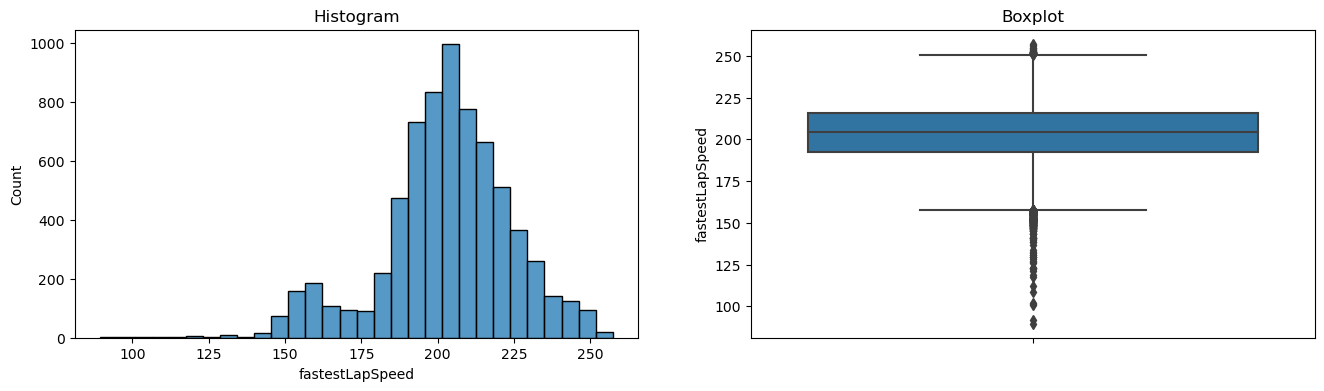

In [79]:
# Univariate Analysis
# Target variable - fastestLapSpeed

# define figure size
plt.figure(figsize=(16, 4))

# histogram
plt.subplot(1, 2, 1)
sns.histplot(df['fastestLapSpeed'], bins=30)
plt.title('Histogram')

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['fastestLapSpeed'])
plt.title('Boxplot')

plt.show()

In [80]:
cat_cols = [c for c in df.columns if df[c].dtypes=='O']
cat_cols

['constructorName', 'driverRef', 'rName', 'cName', 'status']

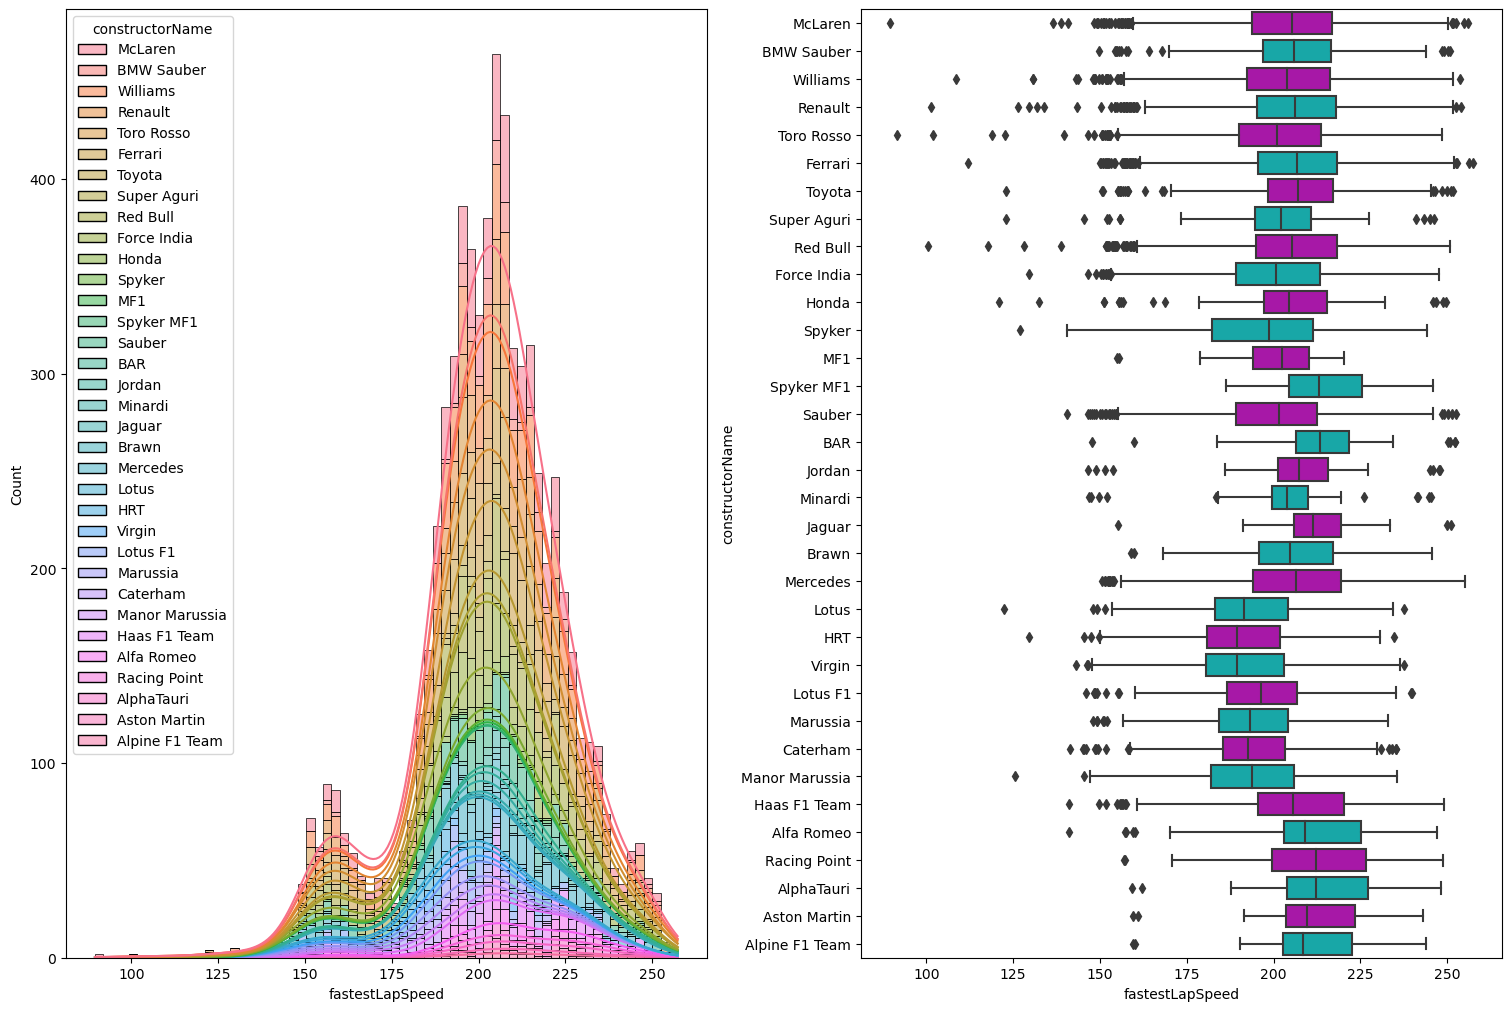

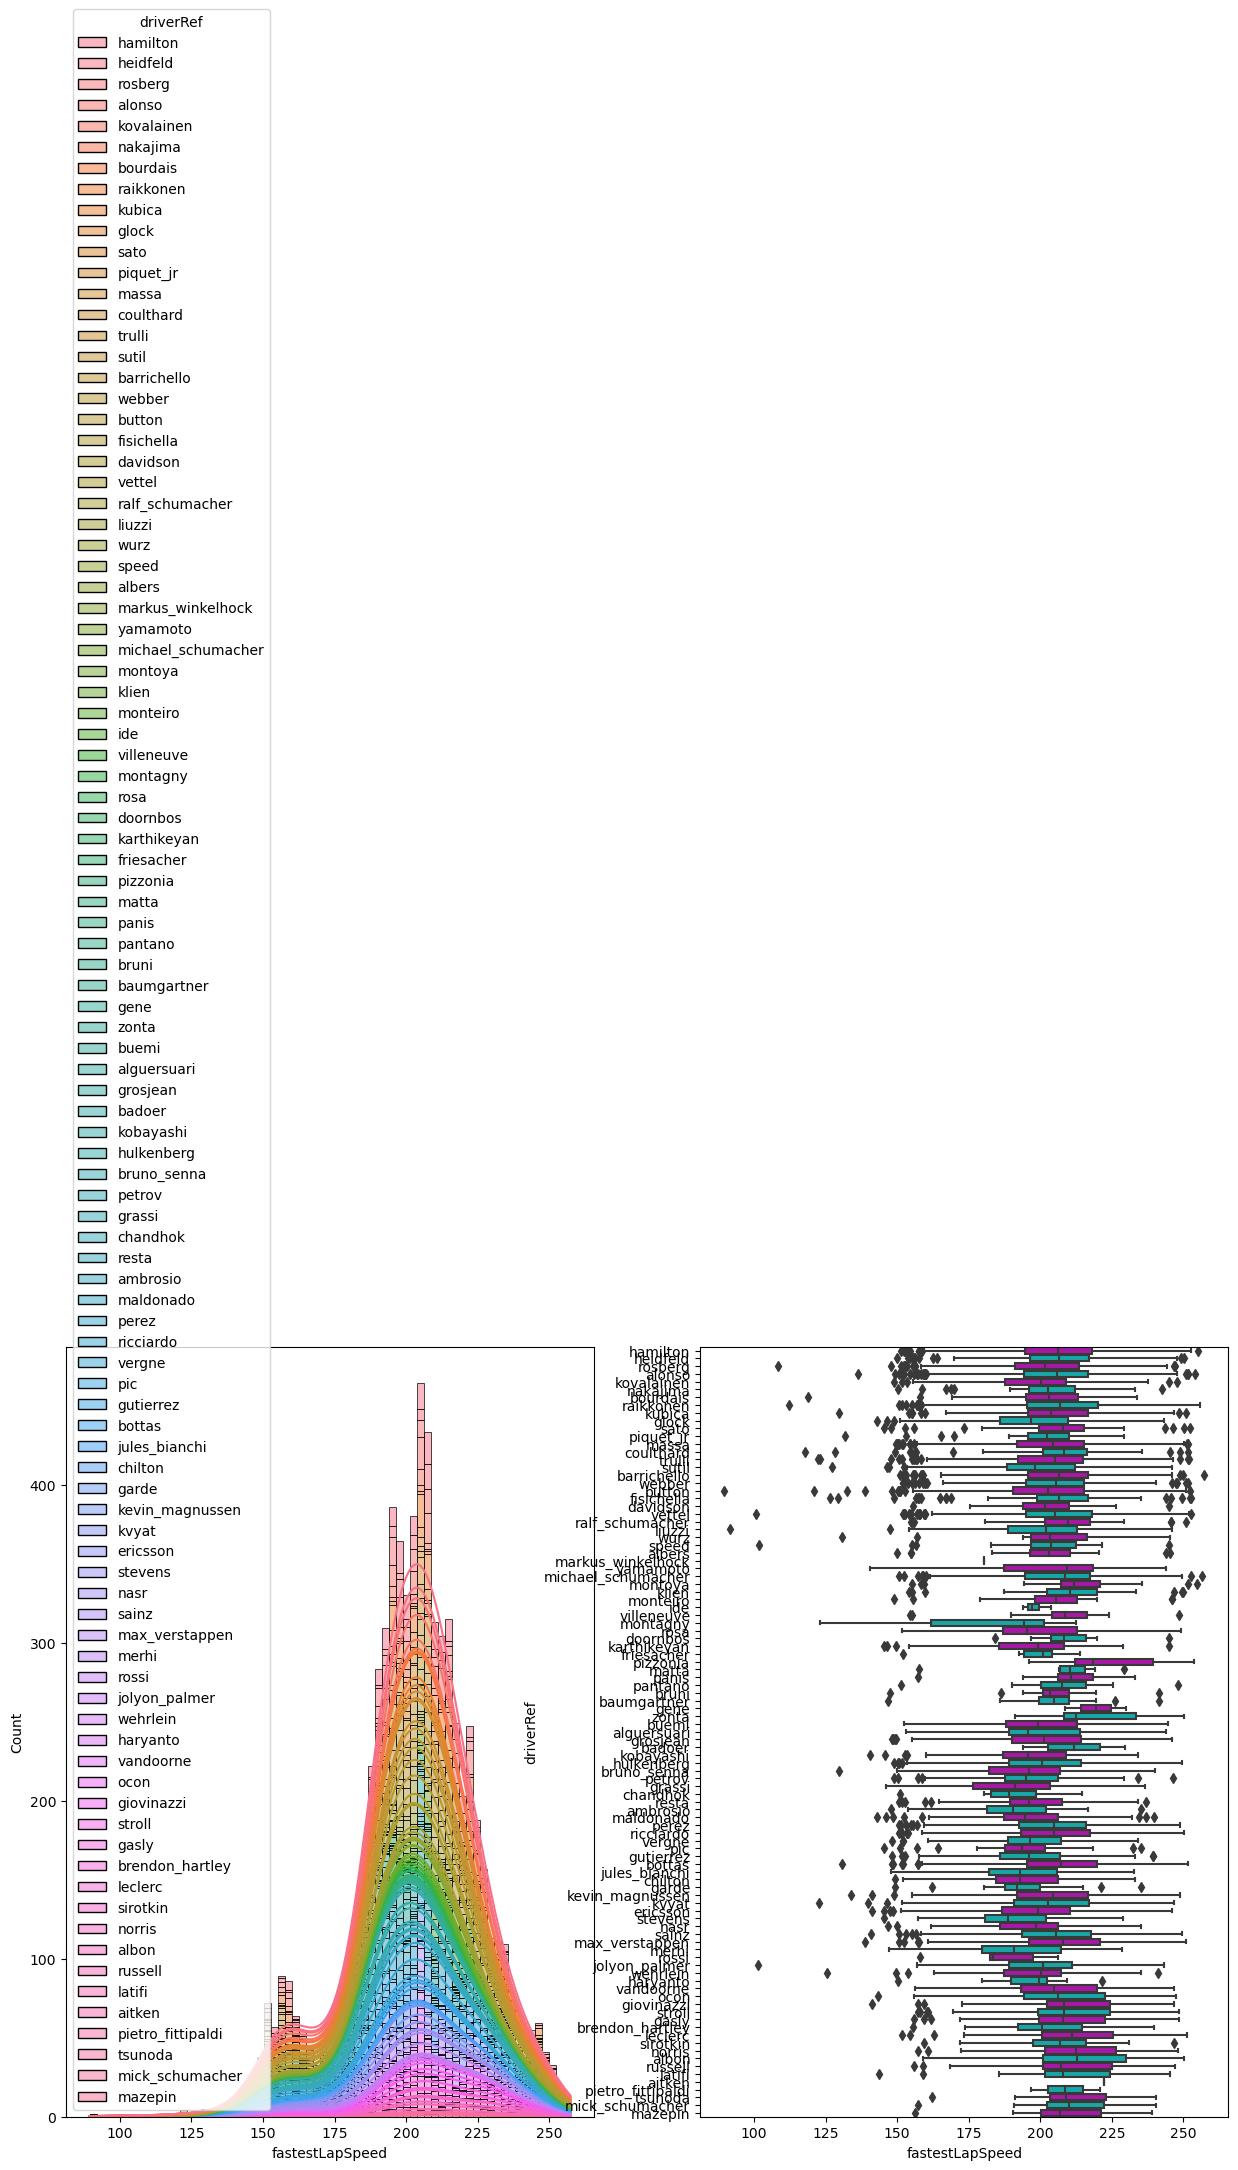

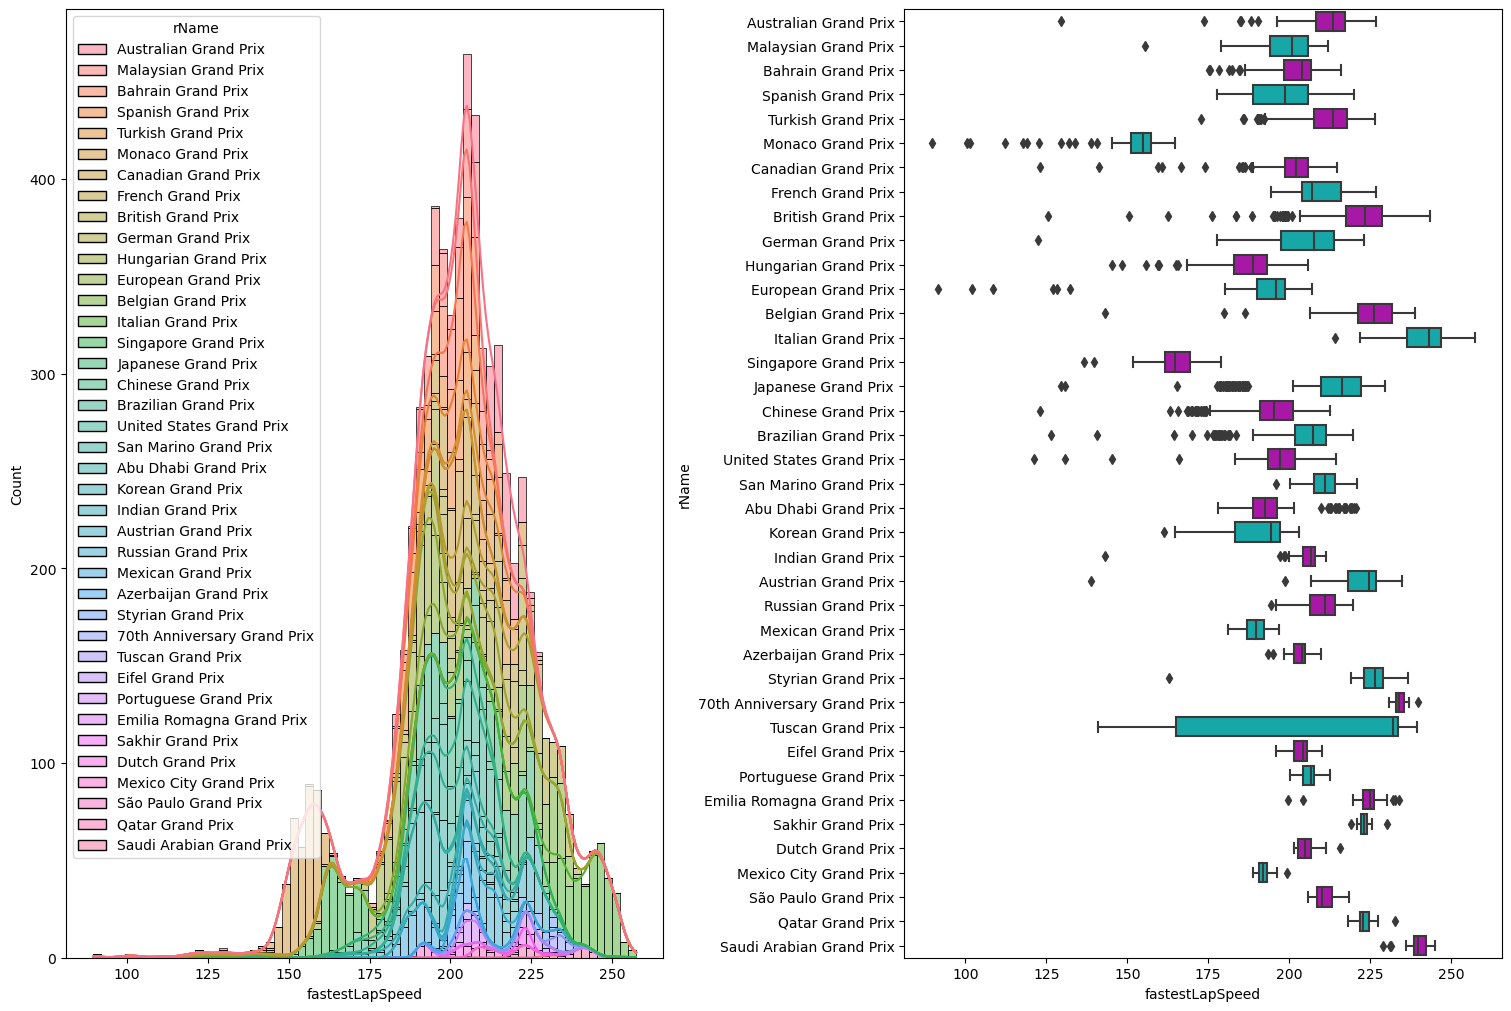

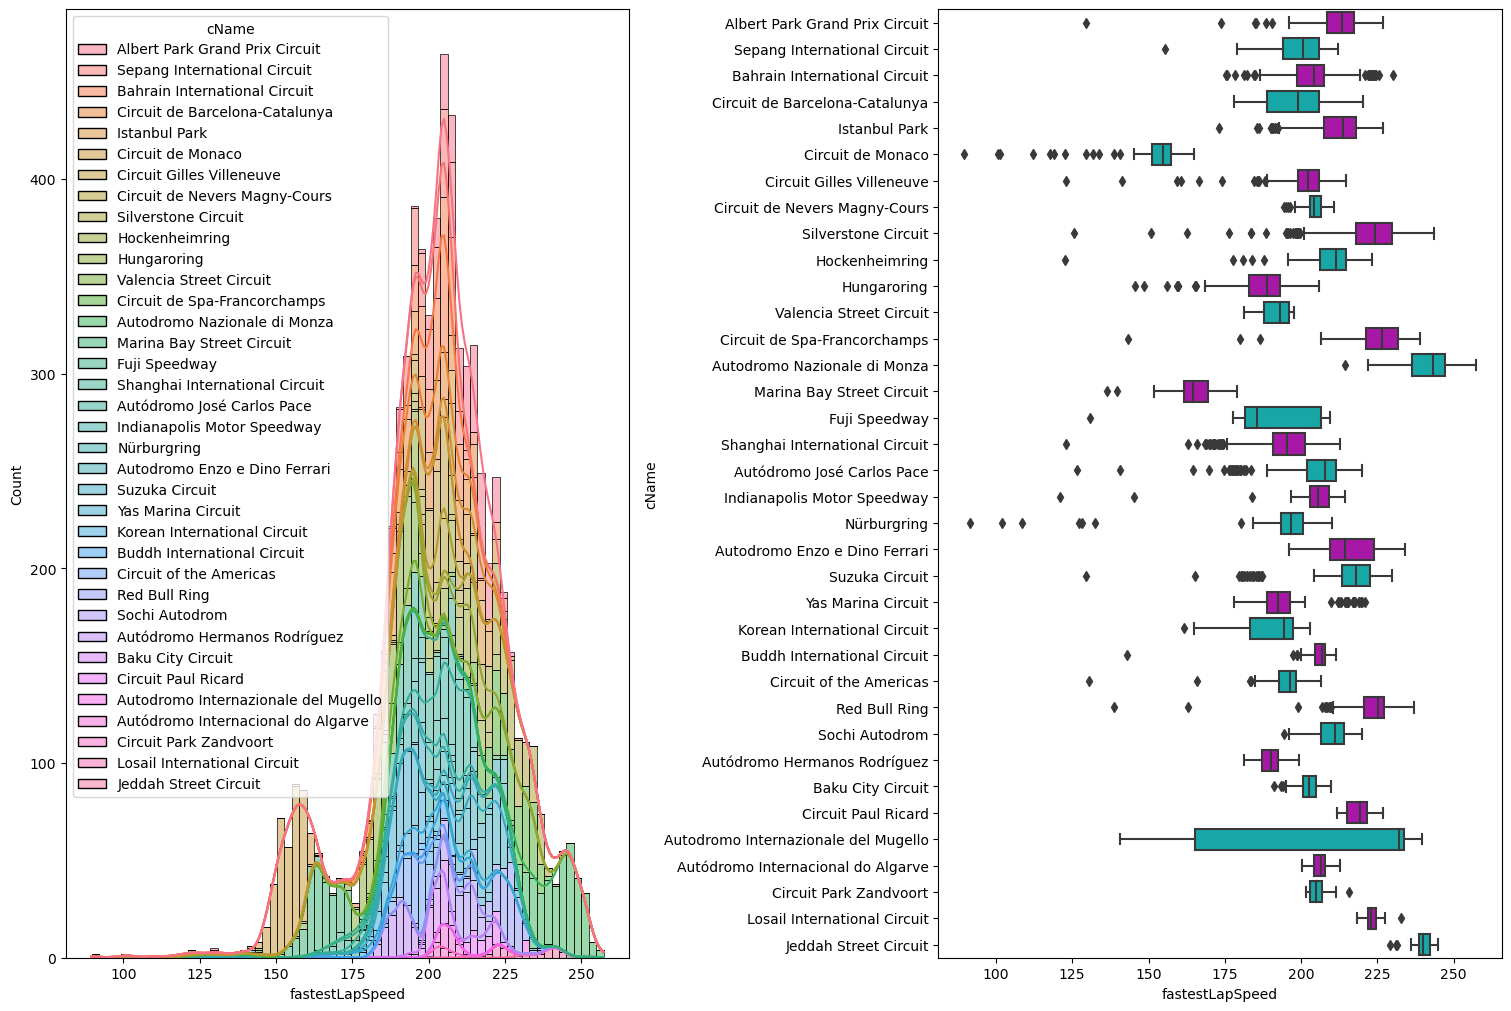

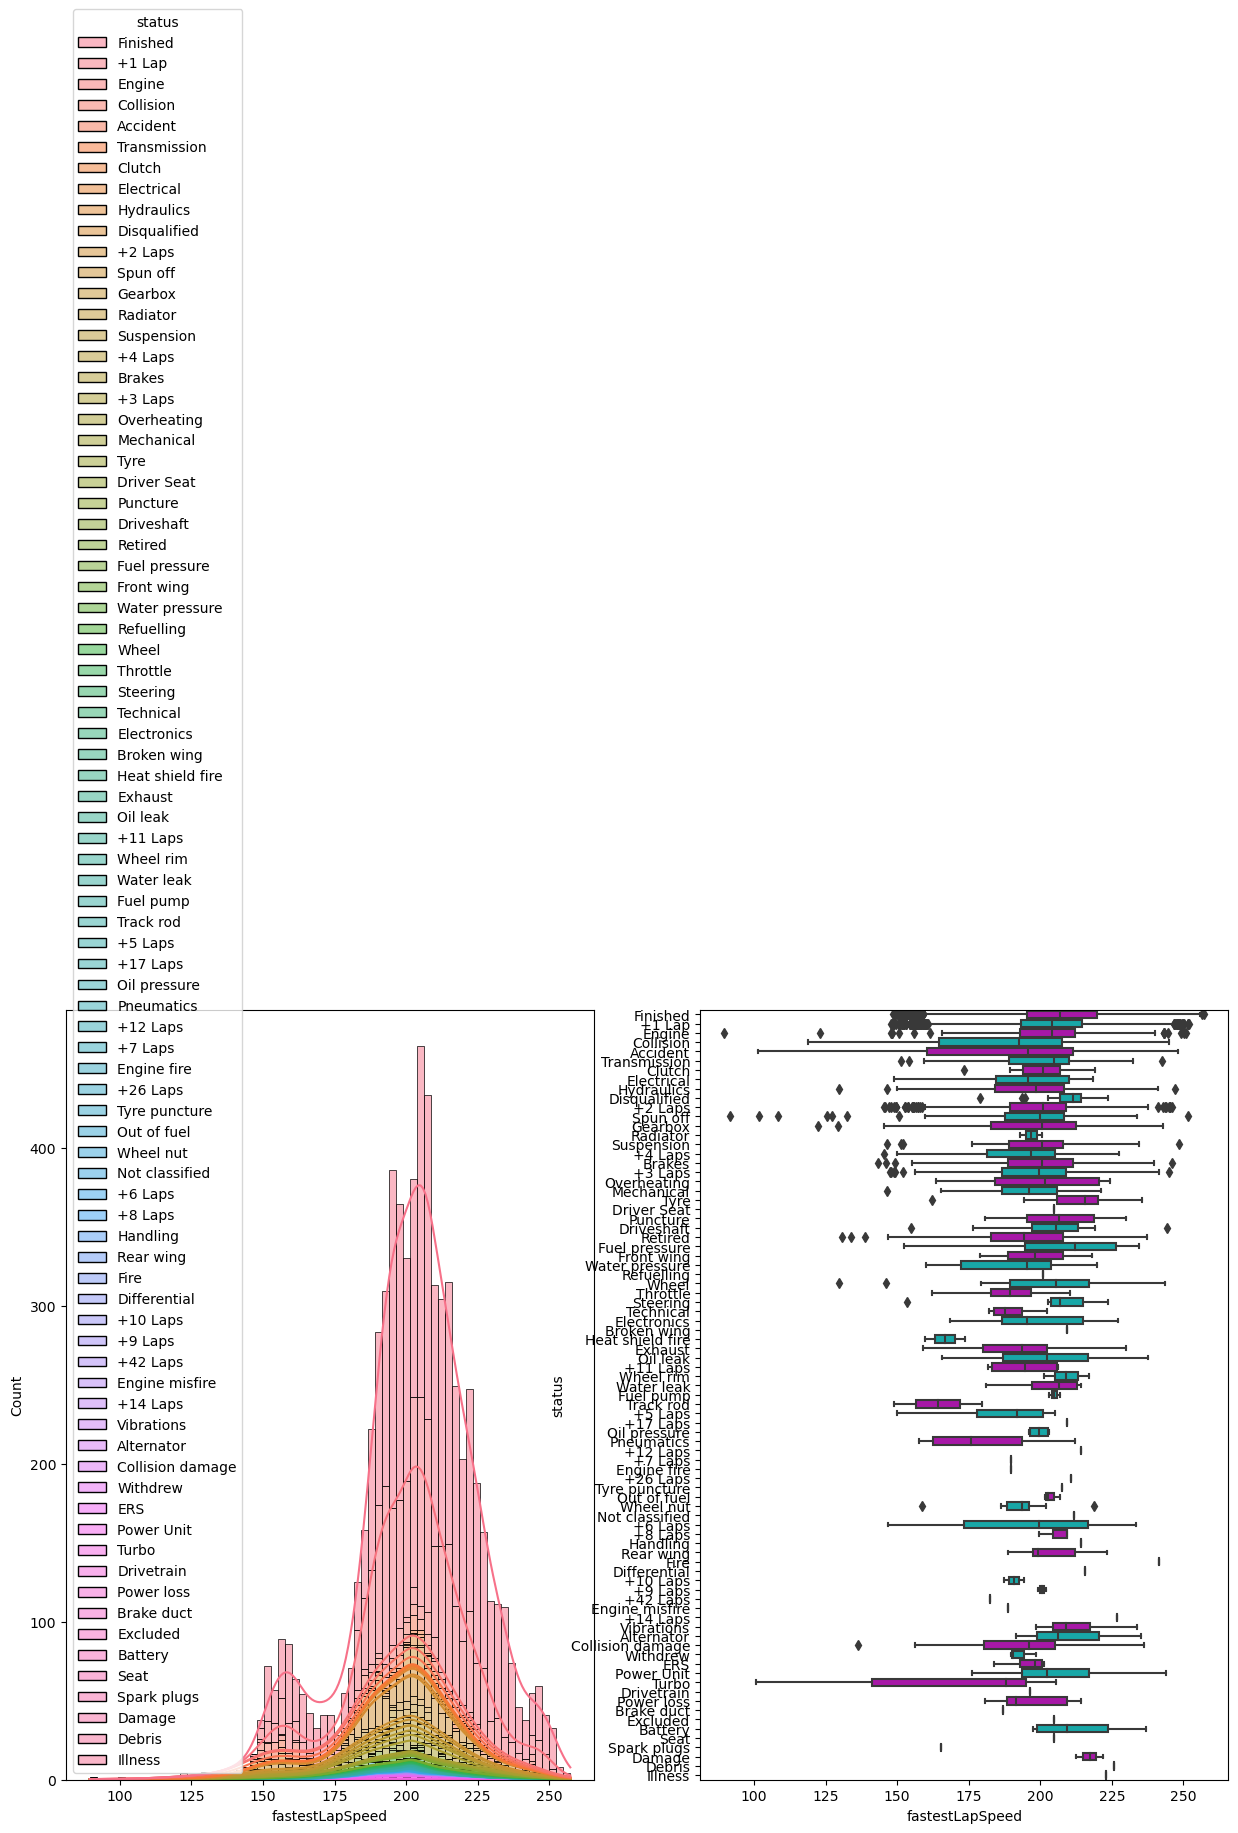

In [81]:
# Bivariate Analysis
# Categorical Variables vs Target

cat_cols = [c for c in df.columns if df[c].dtypes=='O']

for c in cat_cols:
    fig, ax = plt.subplots(1,2, figsize=(15,10), constrained_layout=True)
    ax1= sns.histplot(data=df, x="fastestLapSpeed", hue=c, multiple="stack",kde=True,ax=ax[0])
    ax2= sns.boxplot(x=df['fastestLapSpeed'],y=df[c],palette=['m','c'],ax=ax[1])
    plt.show()

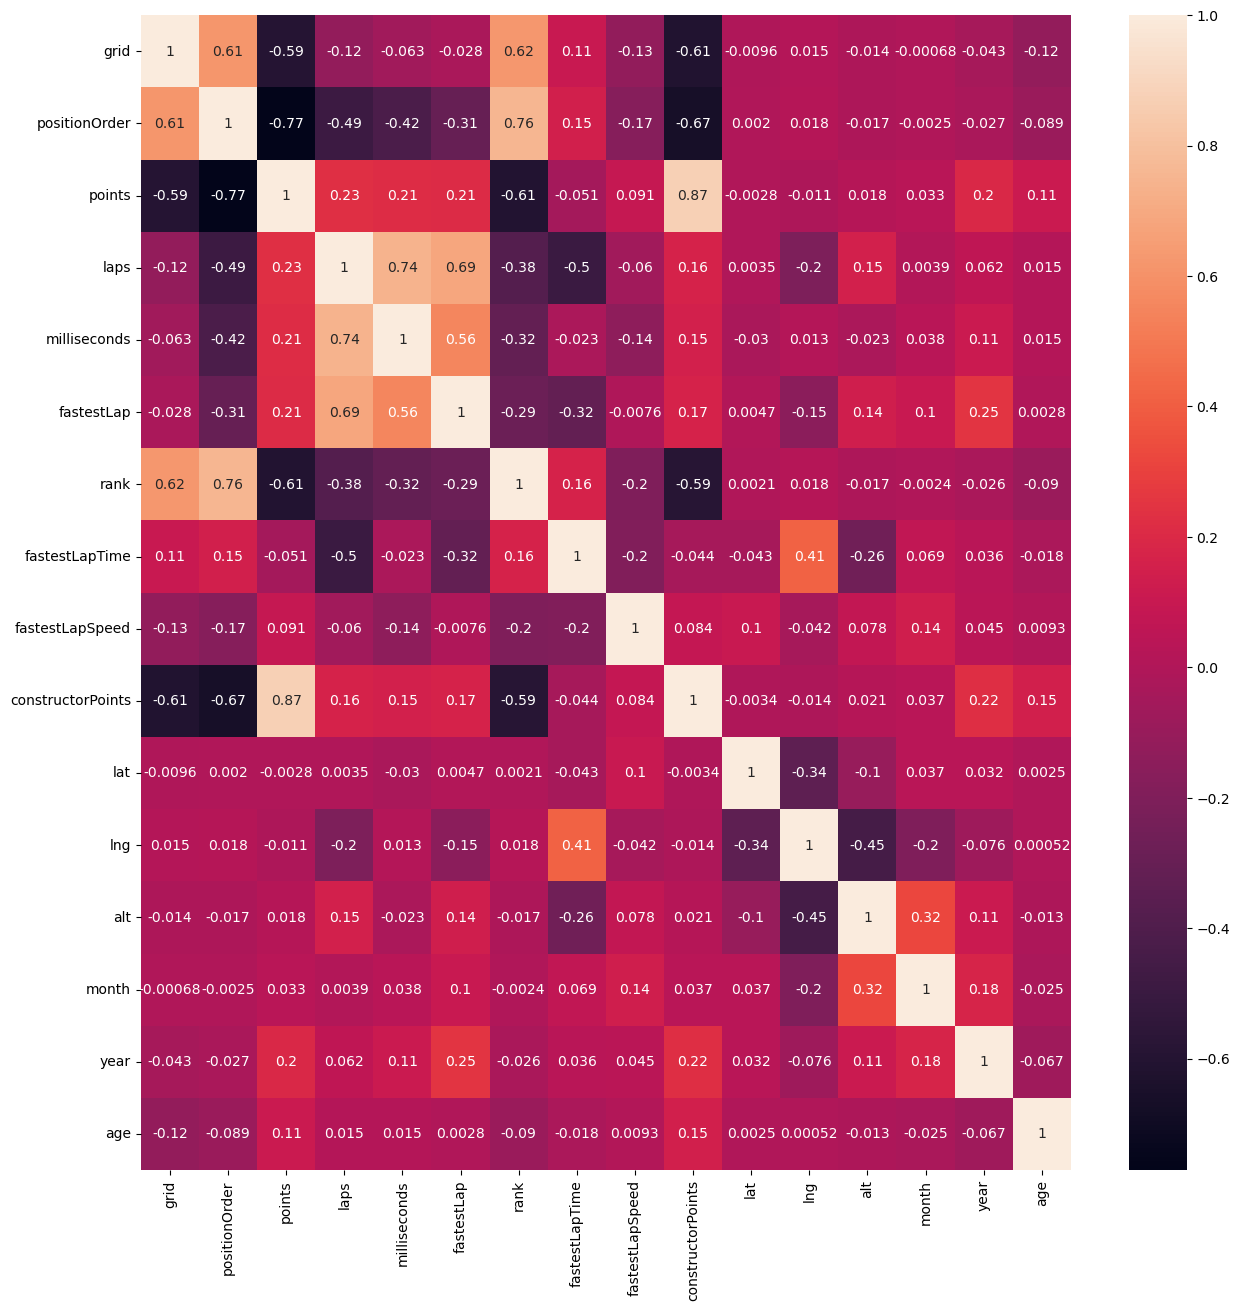

In [82]:
# Bivariate Analysis
# Numerical Variables vs Target

plt.figure(figsize=(15,15))
ax = sns.heatmap(df.corr(), annot =True)
plt.show()

## 3 Data Cleansing and Transformation <a id="part3"></a>
[Go to Report](#part5)
>### 3.1 Quantifying Missing Data <a id="part3.1"></a>

grid                  0
positionOrder         0
points                0
laps                  0
milliseconds          3
fastestLap            0
rank                  0
fastestLapTime        0
fastestLapSpeed       0
constructorPoints     0
constructorName       0
driverRef             0
rName                 0
lat                   0
lng                   0
alt                  20
cName                 0
status                0
month                 0
year                  0
age                   0
dtype: int64


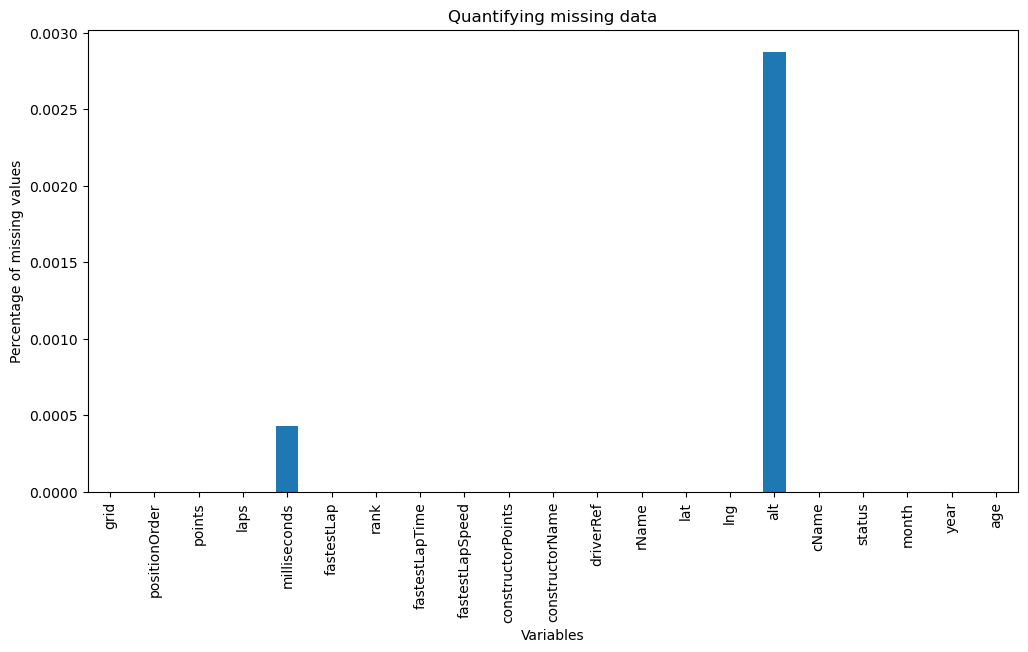

In [83]:
# Quantify missing data
print(df.isnull().sum())
df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')
plt.show()

In [84]:
# Drop null rows
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6930 entries, 0 to 6952
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   grid               6930 non-null   int64  
 1   positionOrder      6930 non-null   float64
 2   points             6930 non-null   float64
 3   laps               6930 non-null   int64  
 4   milliseconds       6930 non-null   float64
 5   fastestLap         6930 non-null   float64
 6   rank               6930 non-null   float64
 7   fastestLapTime     6930 non-null   float64
 8   fastestLapSpeed    6930 non-null   float64
 9   constructorPoints  6930 non-null   float64
 10  constructorName    6930 non-null   object 
 11  driverRef          6930 non-null   object 
 12  rName              6930 non-null   object 
 13  lat                6930 non-null   float64
 14  lng                6930 non-null   float64
 15  alt                6930 non-null   float64
 16  cName              6930 

[Go to Report](#part5)
>### 3.2 Determining Cardinality <a id="part3.2"></a>

In [85]:
# Determine cardinality
df[cat_cols].nunique()

constructorName    34
driverRef          99
rName              38
cName              35
status             83
dtype: int64

[Go to Report](#part5)
>### 3.3 Identifying Rare Categories <a id="part3.3"></a>

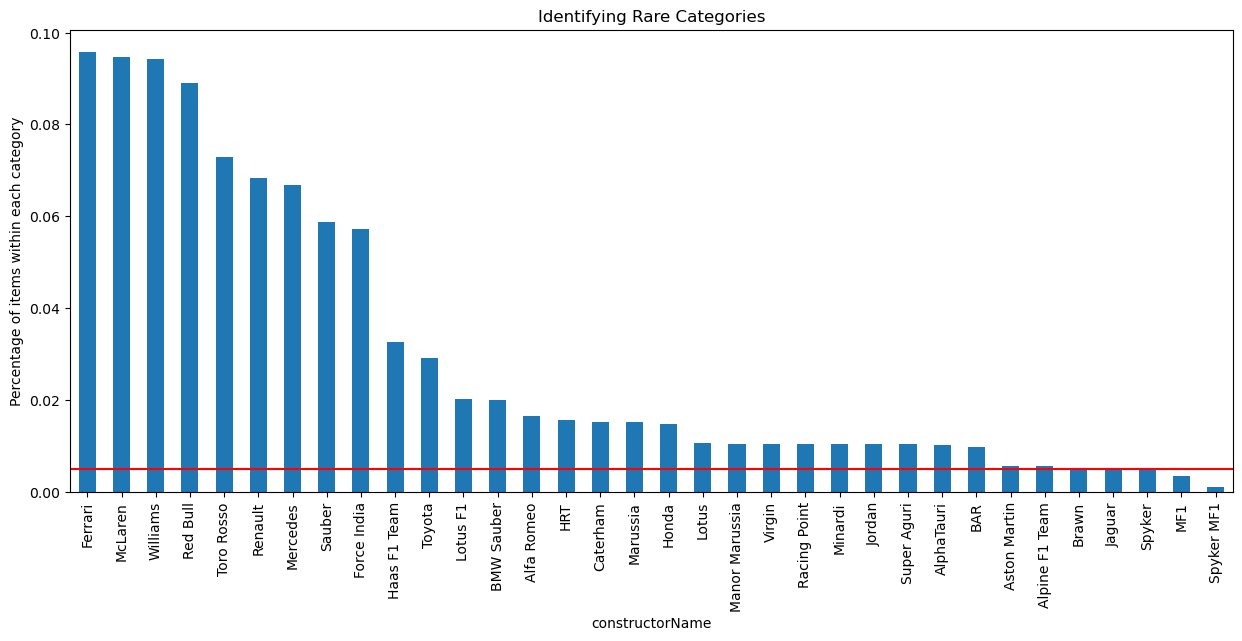

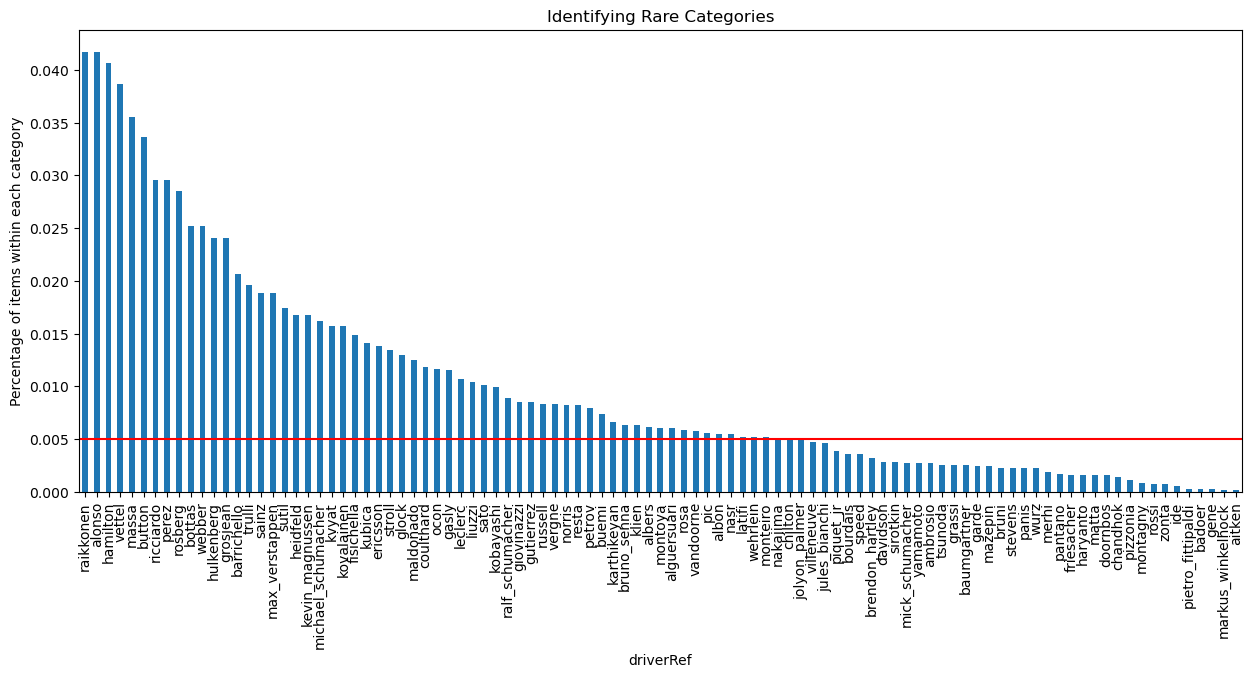

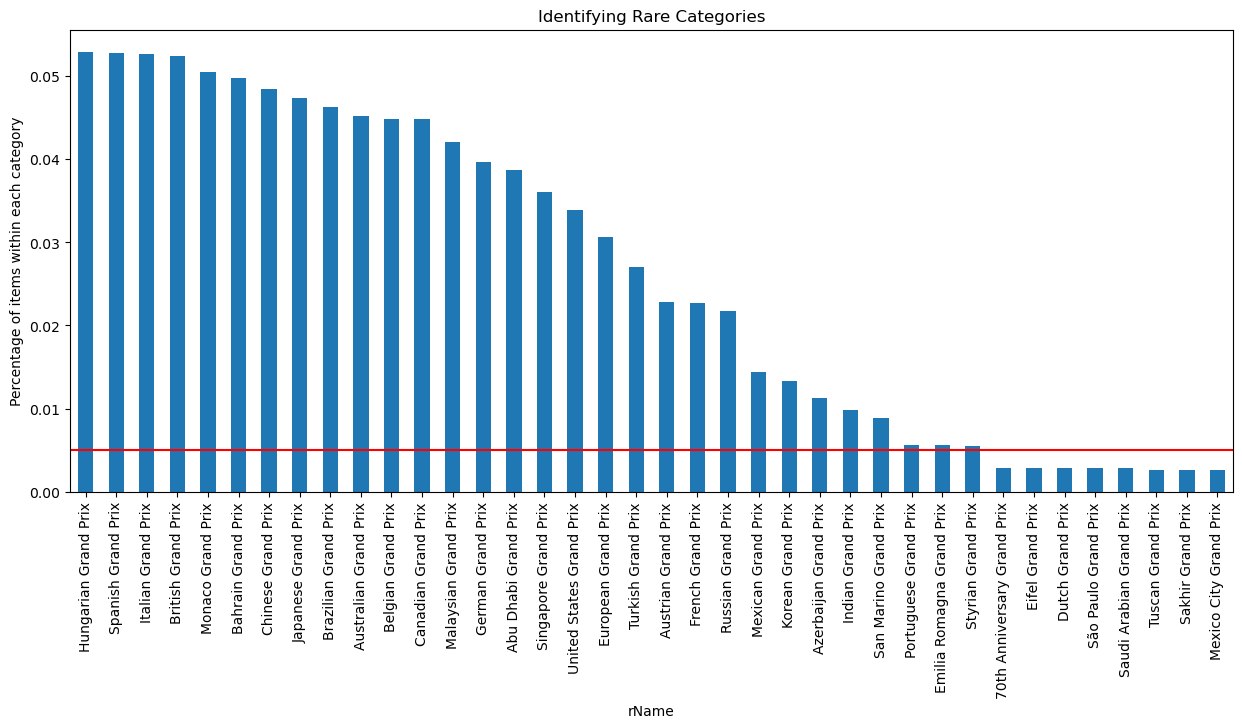

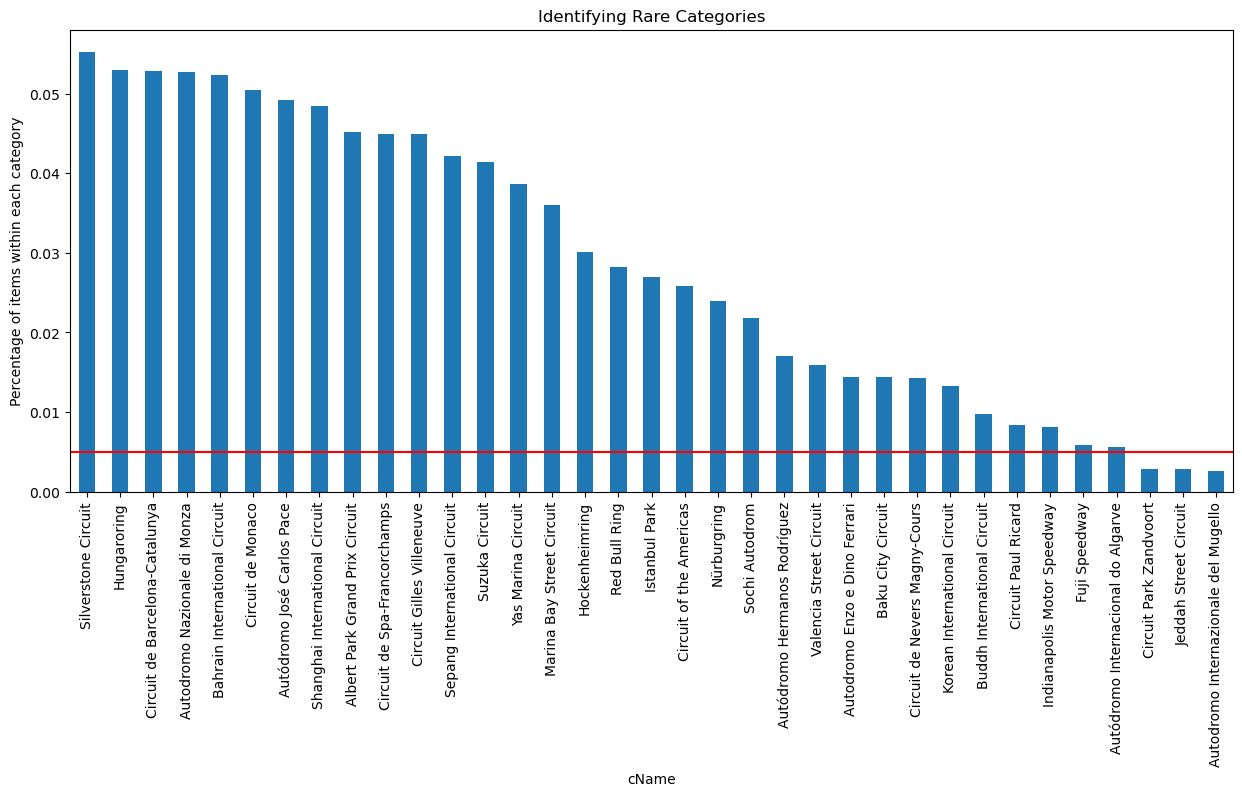

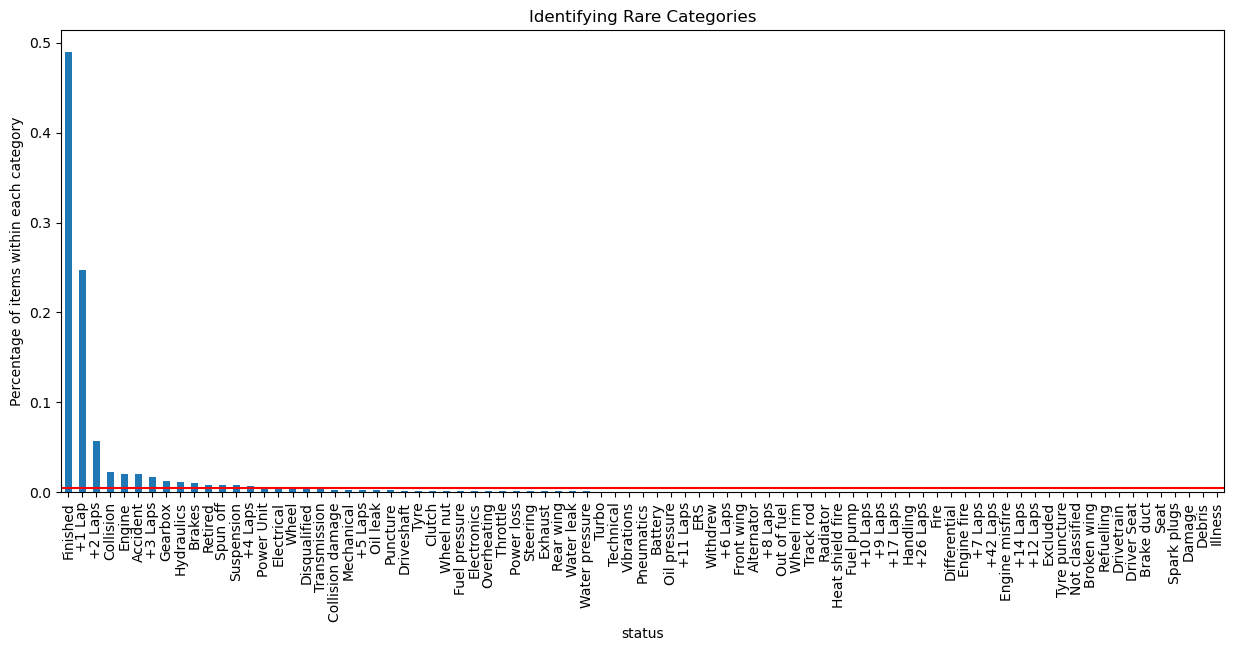

In [86]:
# Identifying rare categories

total_item = len(df)

def rare_cat_plots(df, variable):
    label_freq = df[variable].value_counts() / total_item
    
    plt.figure(figsize=(15,6))
    
    fig = label_freq.sort_values(ascending=False).plot.bar()

    # Add a line to signal 0.5 % frequency limit under which we will consider a category as rare
    fig.axhline(y=0.005, color='red')

    fig.set_ylabel('Percentage of items within each category')
    fig.set_xlabel(f'{variable}')
    fig.set_title('Identifying Rare Categories')
    plt.show()
    
for c in cat_cols:
    rare_cat_plots(df,c)

In [87]:
# Regroup rare categories in status
df['status'].unique()

array(['Finished', '+1 Lap', 'Engine', 'Collision', 'Accident',
       'Transmission', 'Clutch', 'Electrical', 'Hydraulics',
       'Disqualified', '+2 Laps', 'Spun off', 'Gearbox', 'Radiator',
       'Suspension', '+4 Laps', 'Brakes', '+3 Laps', 'Overheating',
       'Mechanical', 'Tyre', 'Driver Seat', 'Puncture', 'Driveshaft',
       'Retired', 'Fuel pressure', 'Front wing', 'Water pressure',
       'Refuelling', 'Wheel', 'Throttle', 'Steering', 'Technical',
       'Electronics', 'Broken wing', 'Heat shield fire', 'Exhaust',
       'Oil leak', '+11 Laps', 'Wheel rim', 'Water leak', 'Fuel pump',
       'Track rod', '+5 Laps', '+17 Laps', 'Oil pressure', 'Pneumatics',
       '+12 Laps', '+7 Laps', 'Engine fire', '+26 Laps', 'Tyre puncture',
       'Out of fuel', 'Wheel nut', 'Not classified', '+6 Laps', '+8 Laps',
       'Handling', 'Rear wing', 'Fire', 'Differential', '+10 Laps',
       '+9 Laps', '+42 Laps', 'Engine misfire', '+14 Laps', 'Vibrations',
       'Alternator', 'Collision

In [88]:
# Create lists and reassign variables in status
status = df['status'].unique().tolist() # for all variables
exclude_keyword = 'Finished' # will not be regrouped
lap_keywords = ['Lap', 'Laps'] # laps will be regrouped as one category

# Lists to store variables
group1 = []
group2 = []
group_laps = []

# Iterate through the original list
for item in status:
    if exclude_keyword in item:
        group1.append(item)
    elif any(keyword in item for keyword in lap_keywords):
        group_laps.append(item)
    else:
        group2.append(item)

In [89]:
# Regroup in dataframe
for i in df.index:
    if any(keyword in df.loc[i, 'status'] for keyword in group_laps):
        df.loc[i, 'status'] = '+ Laps'
    elif any(keyword in df.loc[i, 'status'] for keyword in group2):
        df.loc[i, 'status'] = 'Others'
    else:
        df.loc[i, 'status'] = 'Finished'

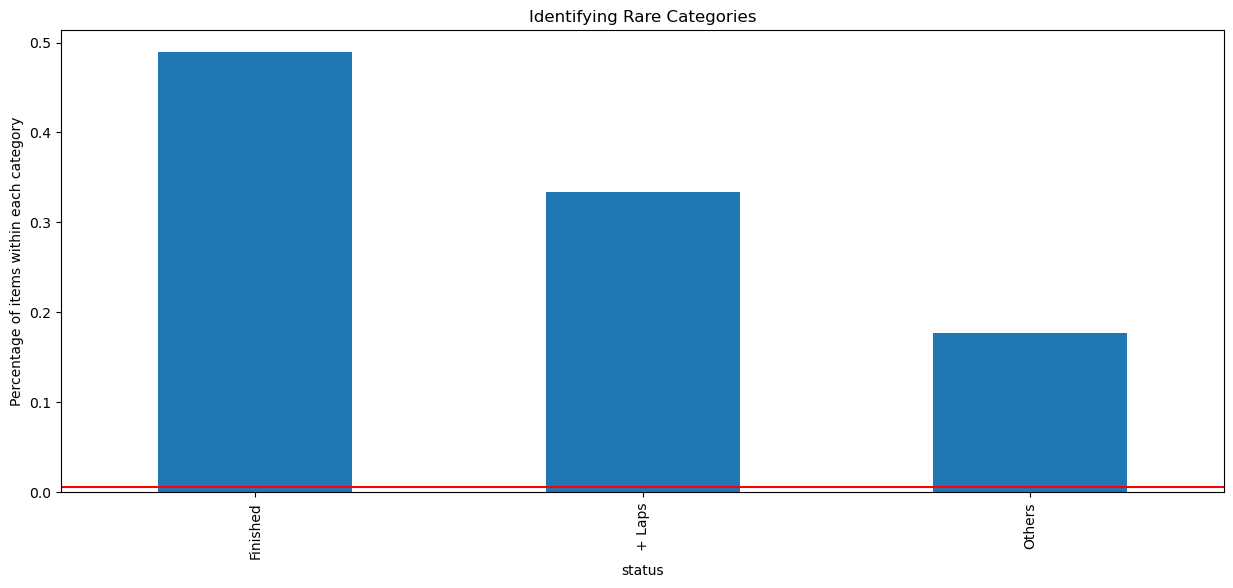

In [90]:
# Check categories in status
rare_cat_plots(df, 'status')

[Go to Report](#part5)
>### 3.4 Check Variable Distribution <a id="part3.4"></a>

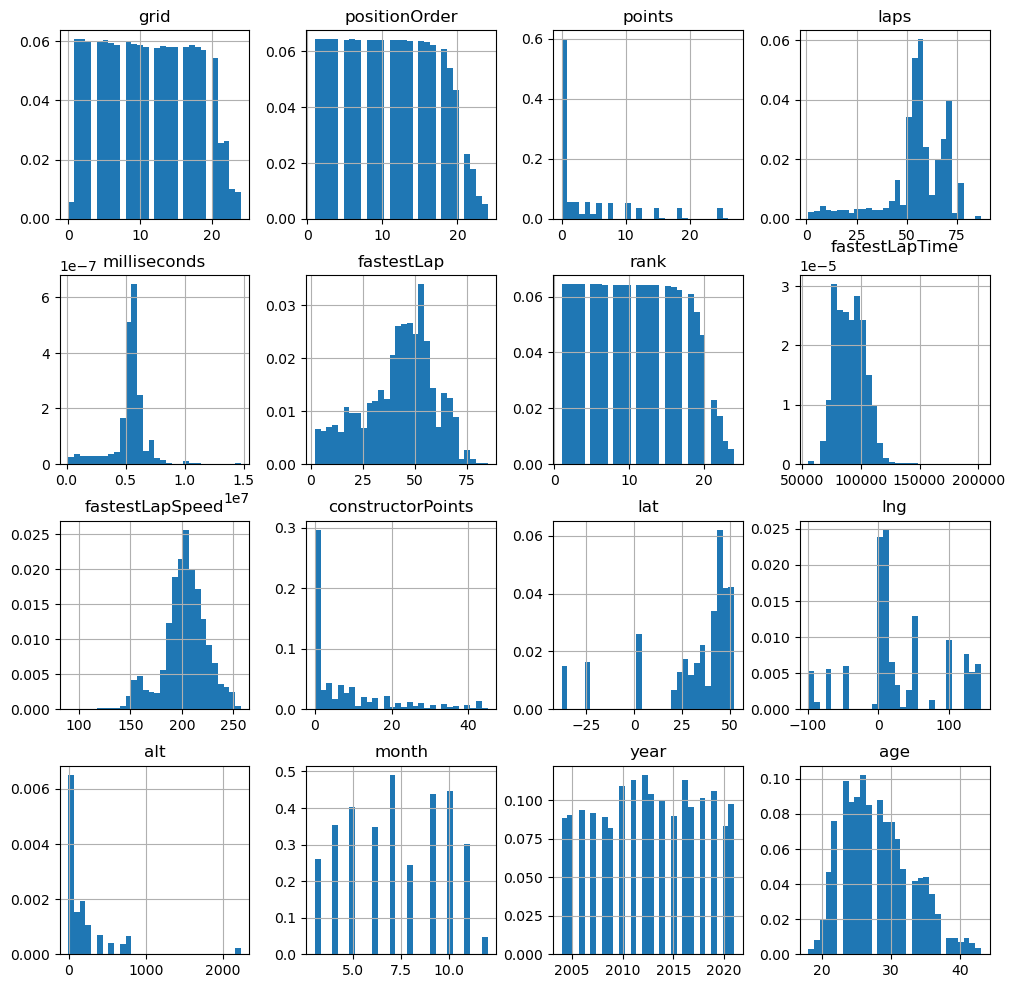

In [91]:
# Check variable distribution
num_cols = [c for c in df.columns if df[c].dtypes!='O']

df[num_cols].hist(bins=30, figsize=(12,12), density=True)
plt.show()

[Go to Report](#part5)
>### 3.5 Check for Outliers <a id="part3.5"></a>

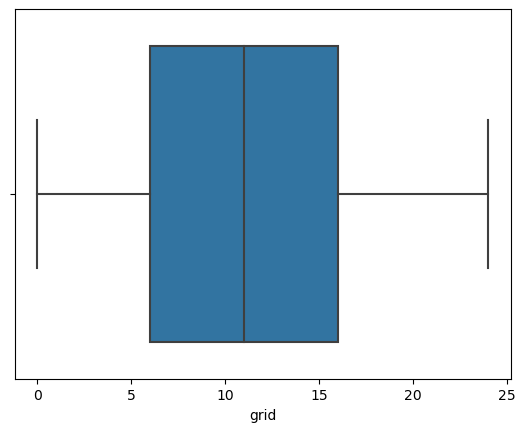

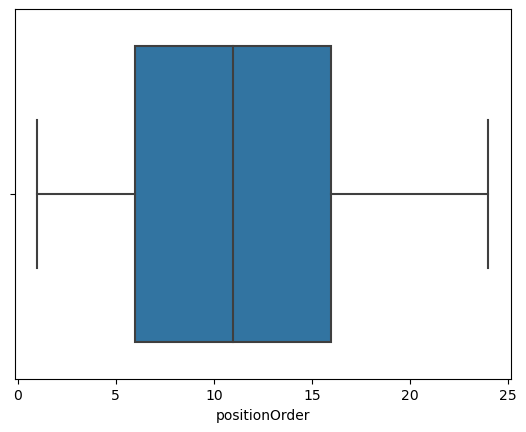

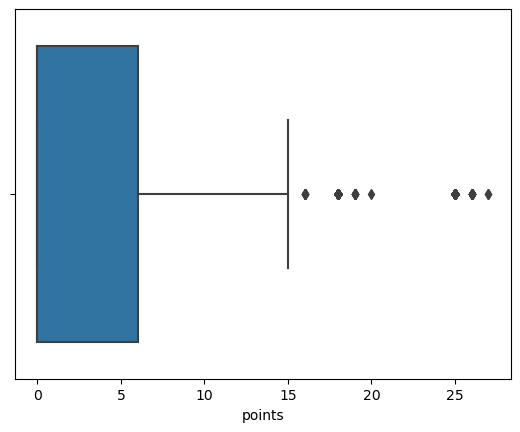

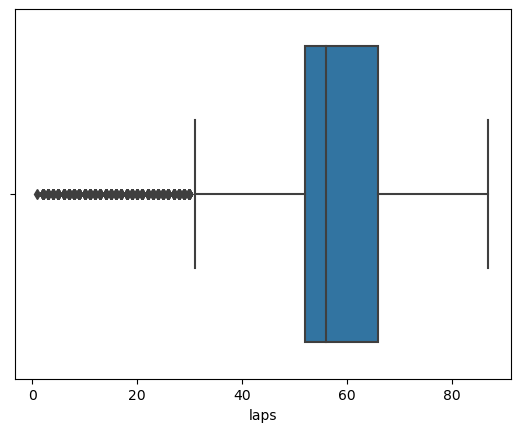

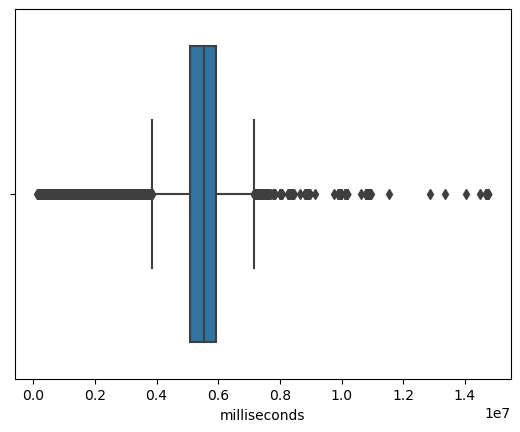

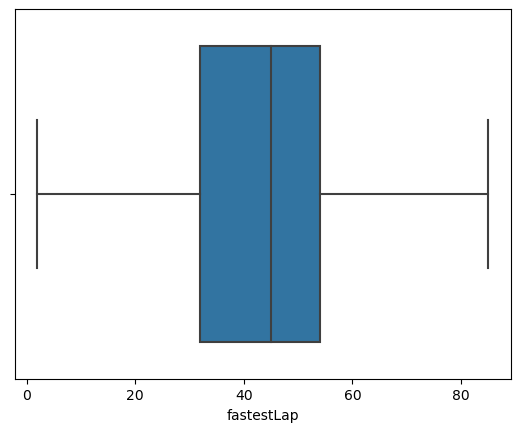

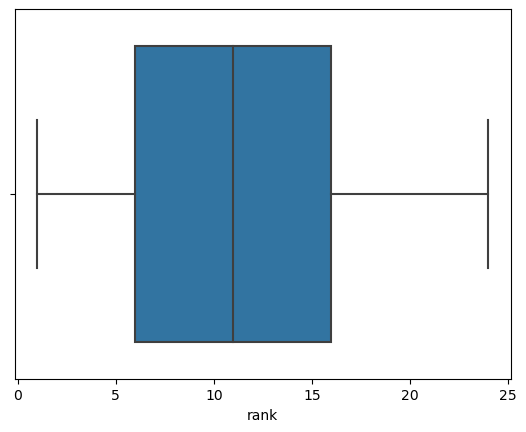

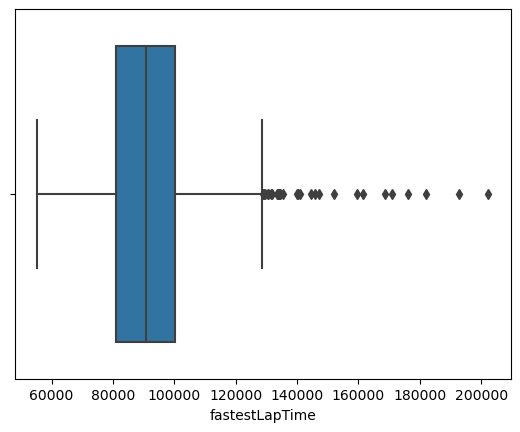

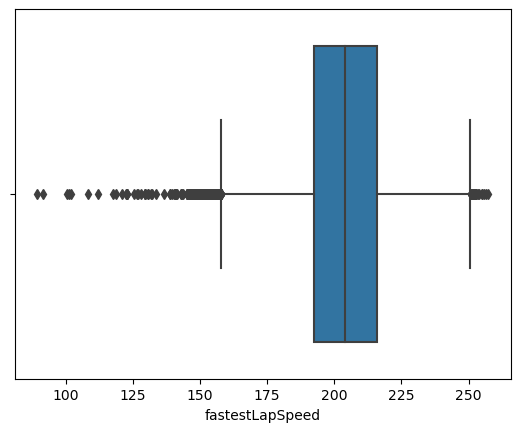

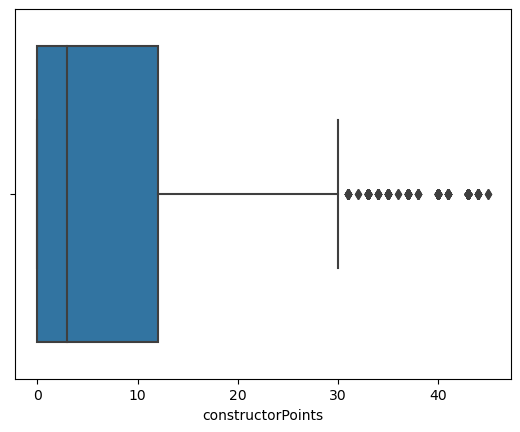

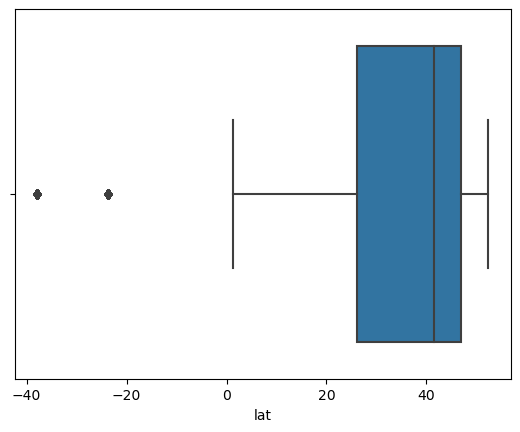

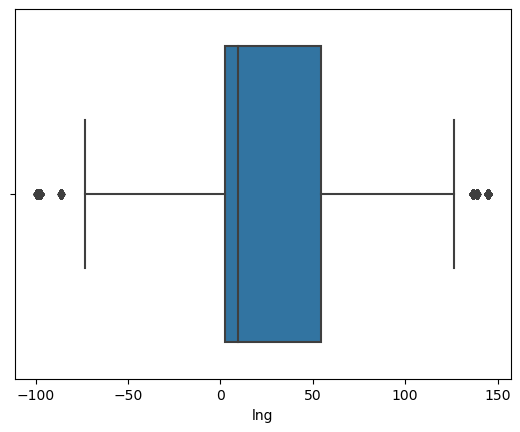

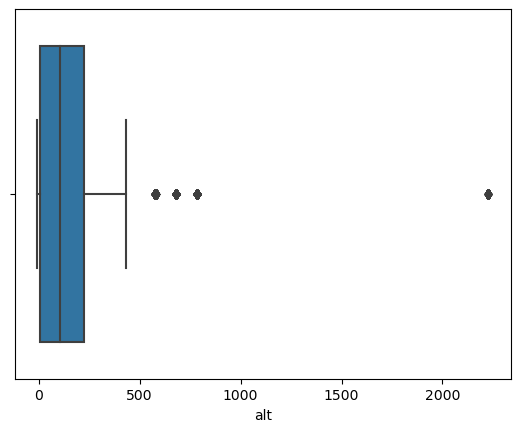

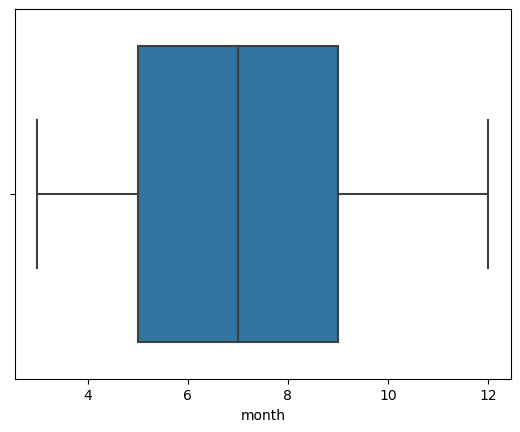

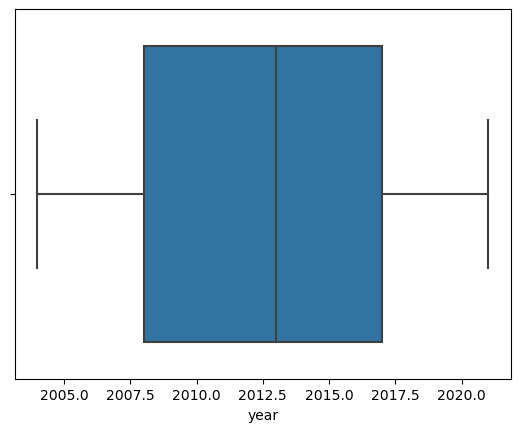

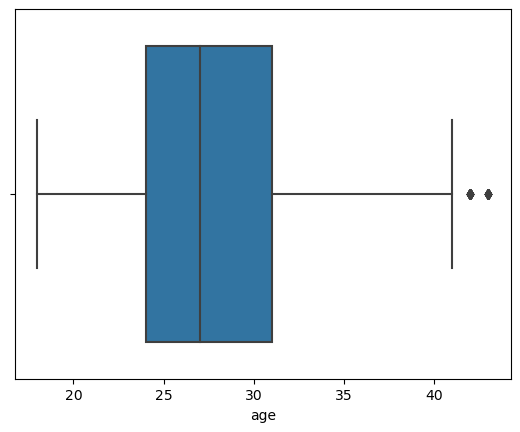

In [92]:
# Check for outliers
for c in num_cols:
    sns.boxplot(x=df[c])
    plt.show()

[Go to Report](#part5)
>### 3.6 Train Test Split <a id="part3.6"></a>

In [93]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['fastestLapSpeed'], axis=1),
    df['fastestLapSpeed'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((4851, 20), (2079, 20))

[Go to Report](#part5)
>### 3.7 Handling Outliers <a id="part3.7"></a>

In [94]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

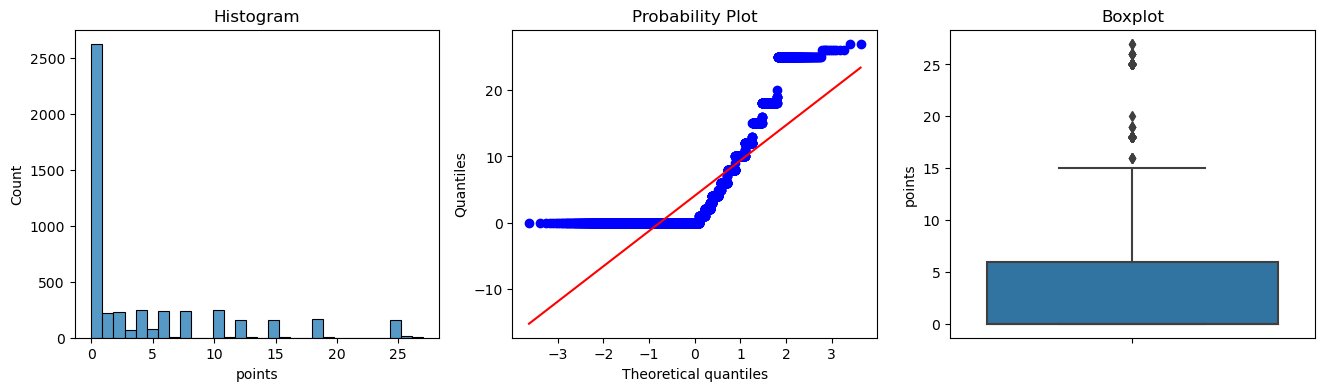

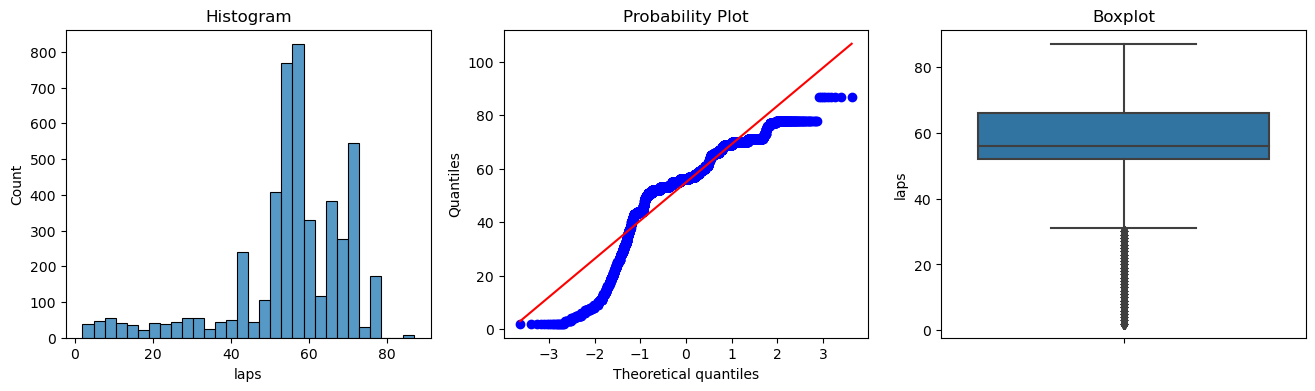

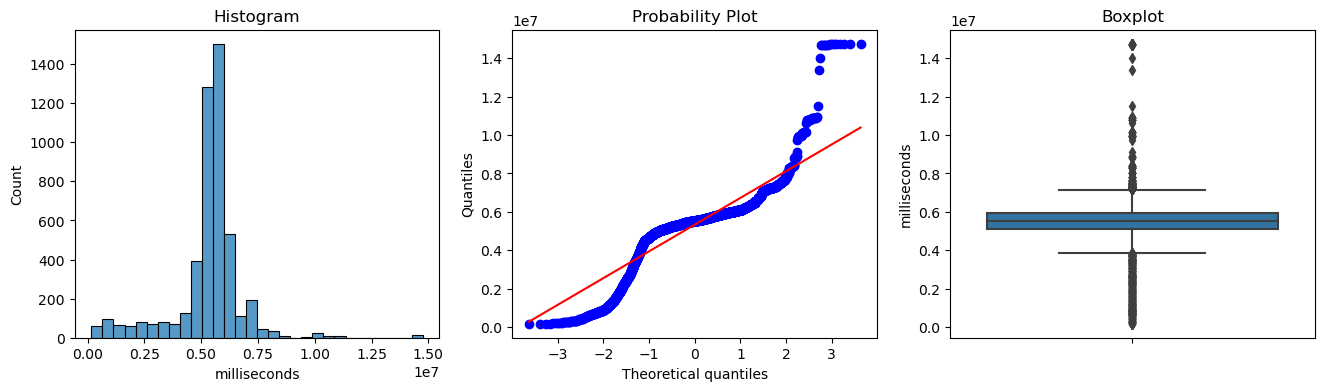

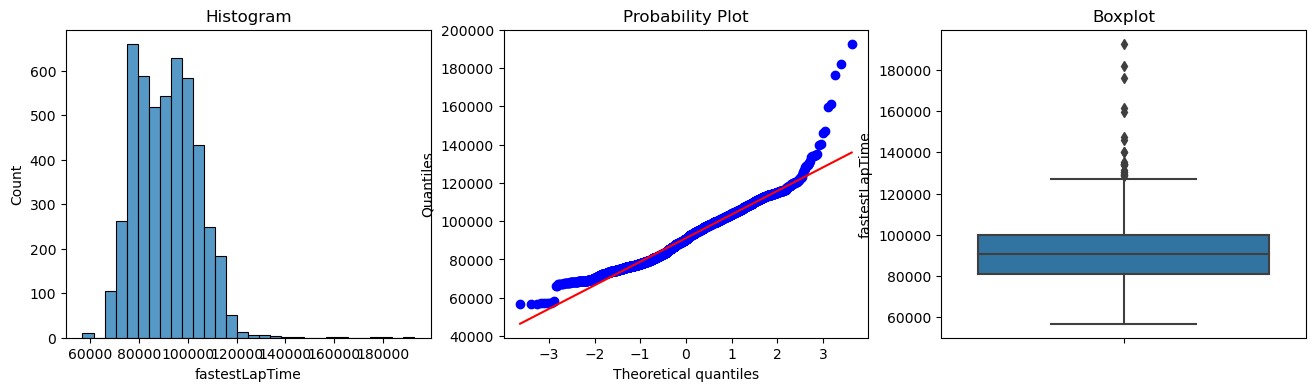

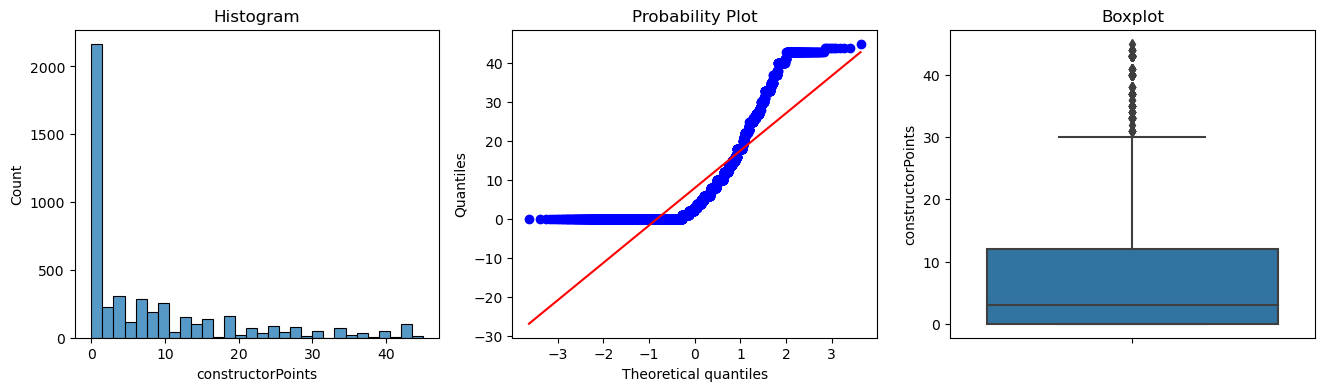

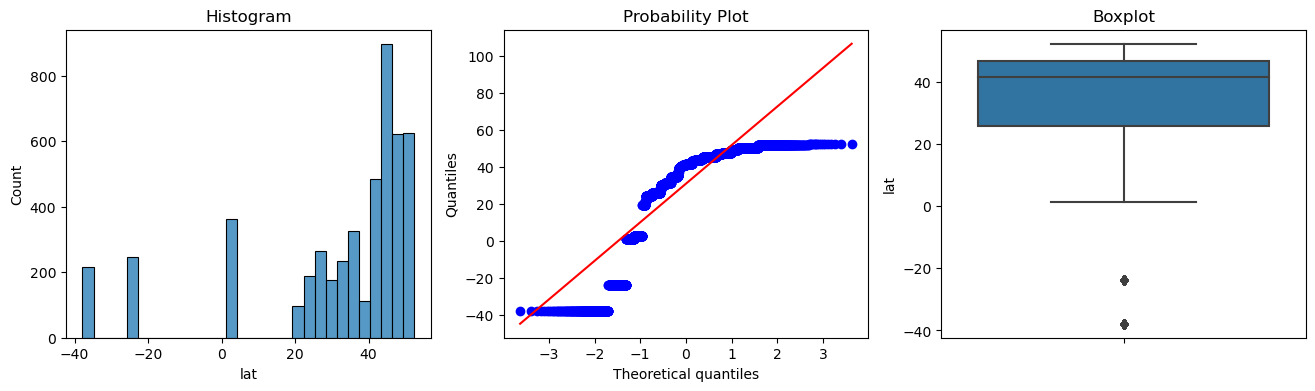

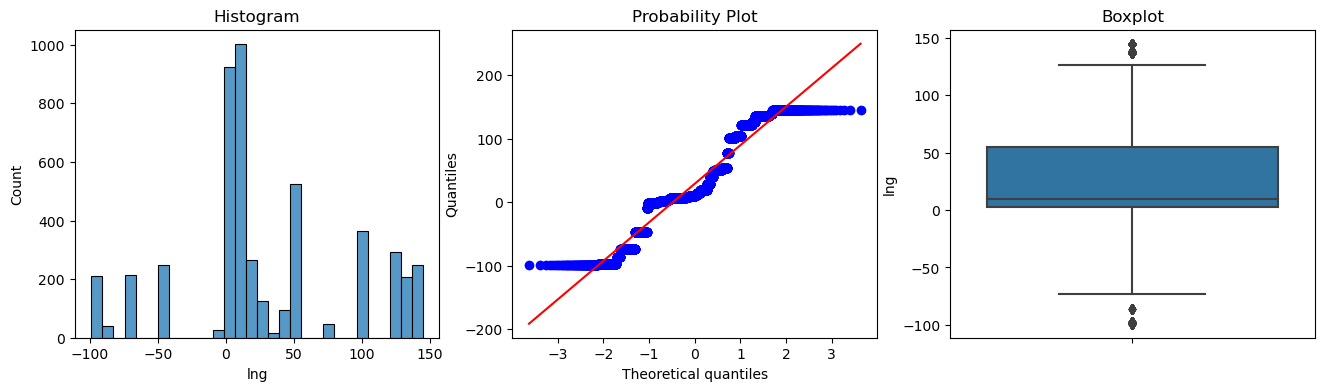

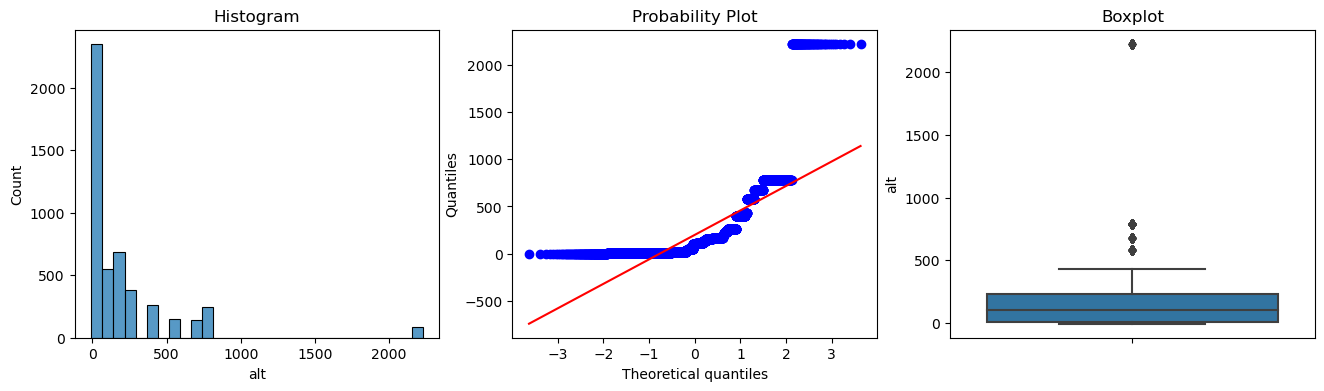

In [95]:
num_cols = ['points', 'laps', 'milliseconds', 'fastestLapTime', 'constructorPoints', 'lat', 'lng', 'alt']
for n in num_cols:
    diagnostic_plots(X_train, n)

In [96]:
# Winsorization - for left-skewed variables
windsorizer = Winsorizer(capping_method ='quantiles', 
                        tail='right', 
                        fold =0.05,
                        variables=['points', 'milliseconds', 'constructorPoints', 'fastestLapTime', 'alt', 'age'])

windsorizer.fit(X_train)
X_train_t = windsorizer.transform(X_train)
X_test_t = windsorizer.transform(X_test)

In [97]:
# Winsorization - for right-skewed variables
windsorizer = Winsorizer(capping_method ='quantiles', 
                        tail='left', 
                        fold =0.05,
                        variables=['laps', 'lat'])

windsorizer.fit(X_train_t)
X_train_t = windsorizer.transform(X_train_t)
X_test_t = windsorizer.transform(X_test_t)

In [98]:
# Winsorization - for lng
windsorizer = Winsorizer(capping_method ='quantiles', 
                        tail='both', 
                        fold =0.05,
                        variables=['lng'])

windsorizer.fit(X_train_t)
X_train_t = windsorizer.transform(X_train_t)
X_test_t = windsorizer.transform(X_test_t)

In [99]:
# Winsorization - for fastestLapSpeed
def winsorise(df, variable, upper_limit, lower_limit):    
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

y_train_df = pd.DataFrame(y_train, columns=['fastestLapSpeed'])
y_train= winsorise(y_train_df, 'fastestLapSpeed', y_train_df['fastestLapSpeed'].quantile(0.95),y_train_df['fastestLapSpeed'].quantile(0.05))

y_test_df = pd.DataFrame(y_test, columns=["fastestLapSpeed"])
y_test= winsorise(y_test_df, 'fastestLapSpeed', y_test_df['fastestLapSpeed'].quantile(0.95),y_test_df['fastestLapSpeed'].quantile(0.05))


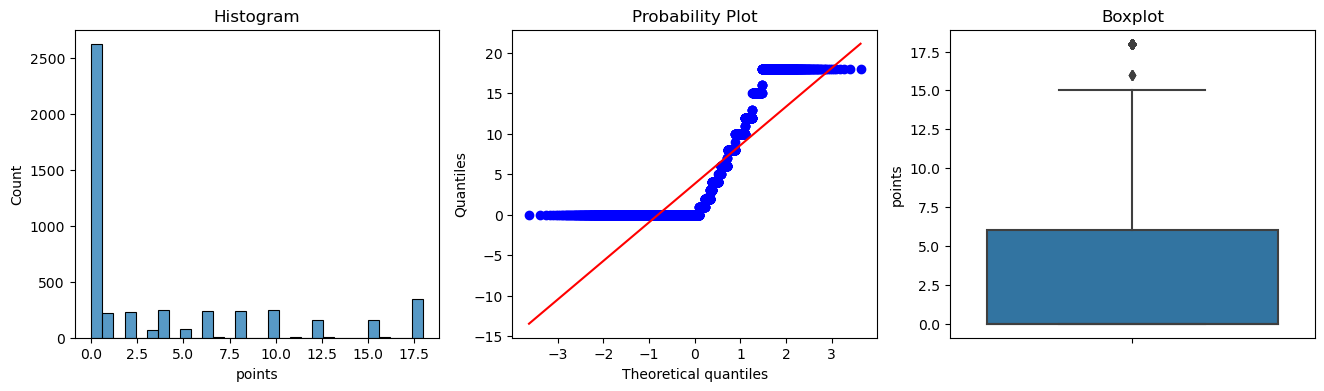

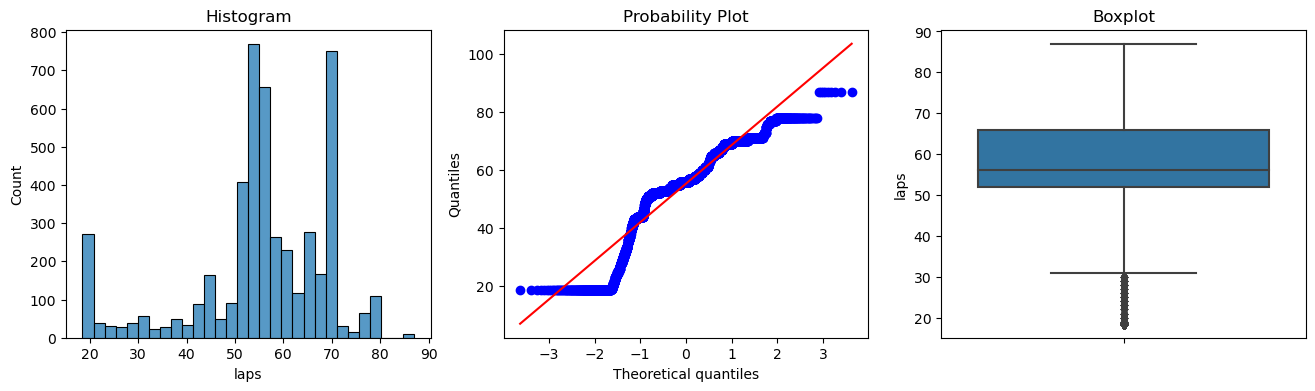

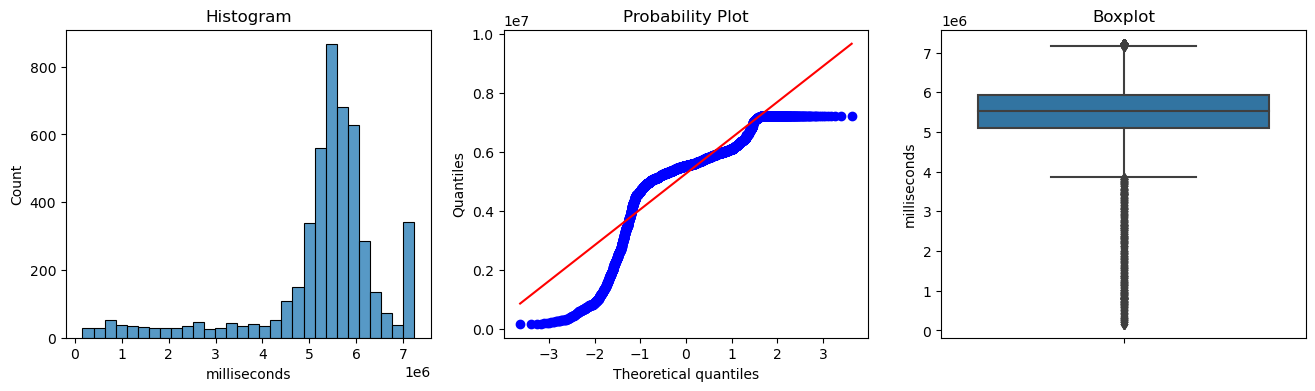

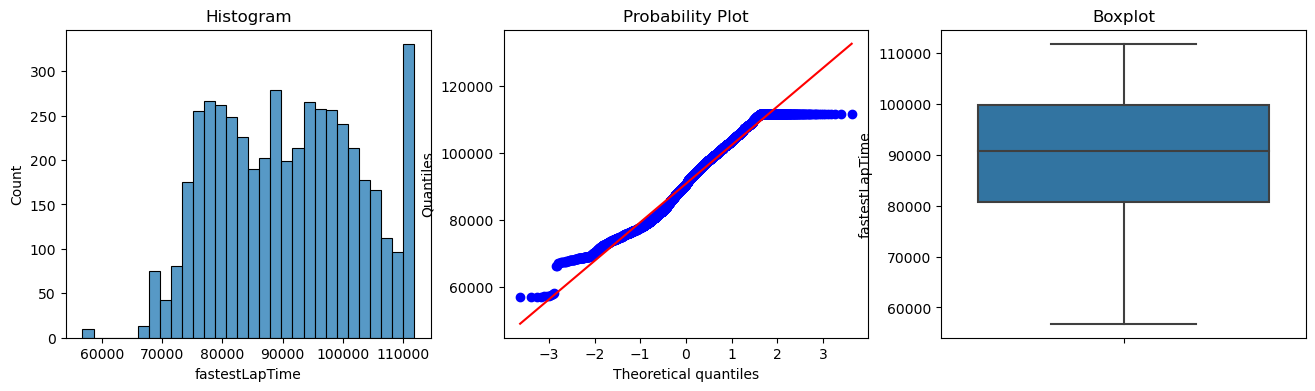

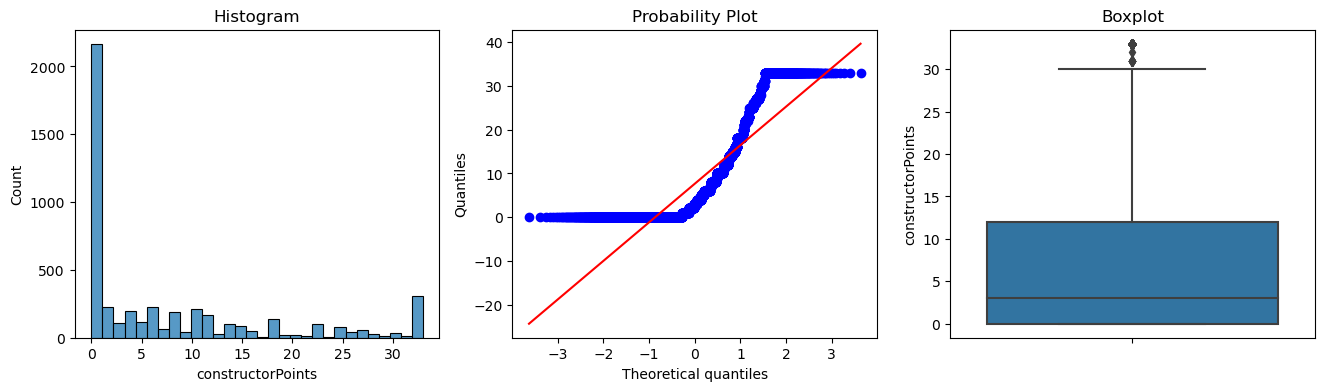

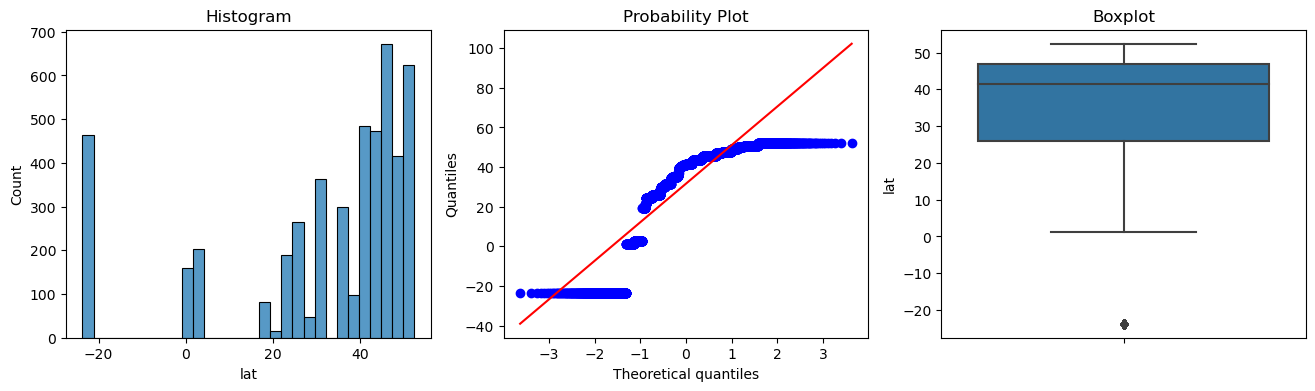

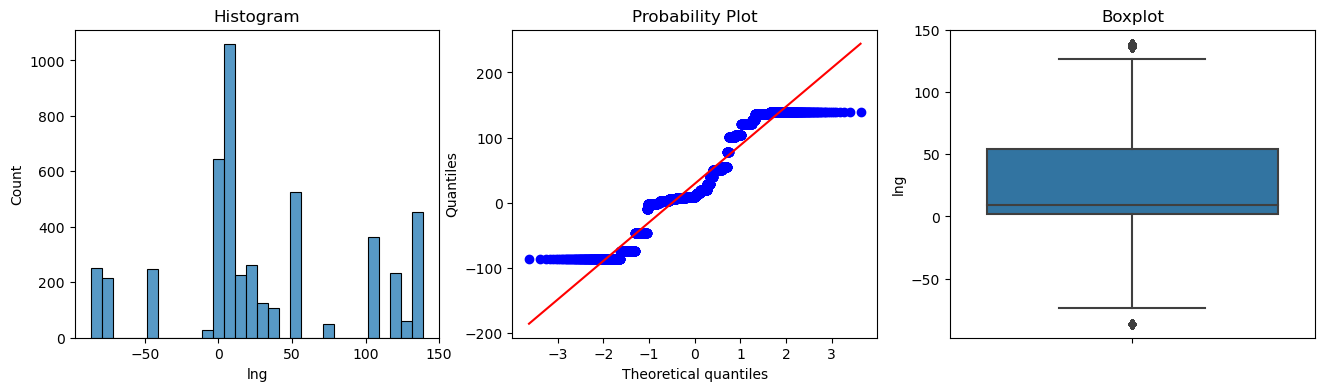

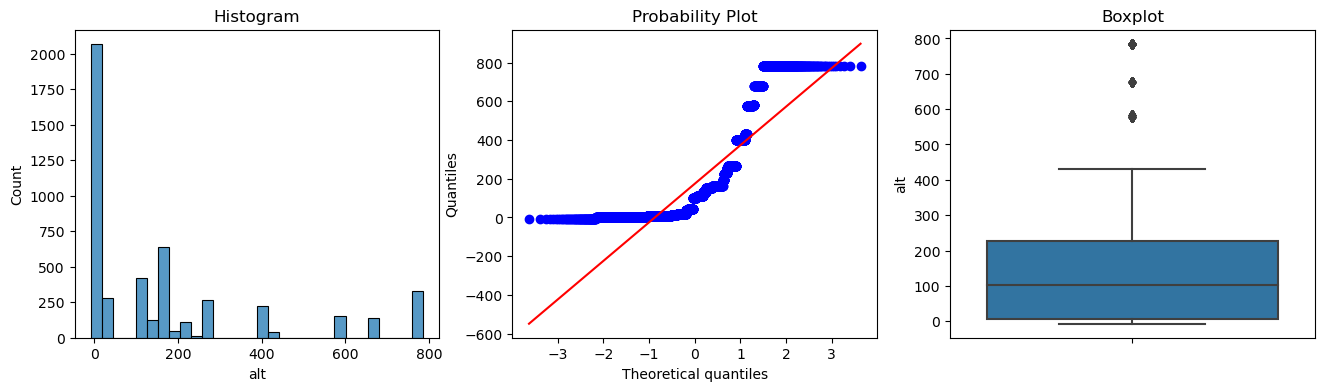

In [100]:
for n in num_cols:
    diagnostic_plots(X_train_t, n)

[Go to Report](#part5)
>### 3.8 Encoding Categorical Variables <a id="part3.8"></a>

In [101]:
# Categorical encoding for status - one hot encoding
ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=True, variables= ['status'])

ohe_enc.fit(X_train_t)

X_train_enc = ohe_enc.transform(X_train_t)
X_test_enc = ohe_enc.transform(X_test_t)

X_train_enc.head()

grid  positionOrder  points  laps  milliseconds  fastestLap  rank  fastestLapTime  constructorPoints constructorName           driverRef                     rName       lat        lng    alt                         cName  month  year  age  status_Finished  status_+ Laps
1197    10            5.0     4.0  59.0     5557093.0        19.0   6.0         91500.0               10.0         Ferrari  michael_schumacher       European Grand Prix  50.33560    6.94750  578.0                   Nürburgring      5  2005   36                1              0
896      1            1.0    10.0  73.0     5675199.0        56.0   1.0         72700.0               18.0         Ferrari  michael_schumacher  United States Grand Prix  39.79500  -86.23470  223.0   Indianapolis Motor Speedway      7  2006   37                1              0
18       4            2.0     8.0  56.0     5498125.0        39.0   6.0         95900.0               11.0      BMW Sauber              kubica      Malaysian Grand Prix   2.76083  101.73800   18.0  Sepang International Circuit      3  2008   24                1              0
4032     1            1.0    18.0  67.0     5622914.0        67.0   6.0         81300.0               33.0        Mercedes             rosberg         German Grand Prix  49.32780    8.56583  103.0                Hockenheimring      7  2014   29                1              0
4260    13           14.0     0.0  55.0     6114692.0        46.0  11.0        104800.0                0.0     Force India          hulkenberg      Malaysian Grand Prix   2.76083  101.73800   18.0  Sepang International Circuit      3  2015   28                0              1

In [102]:
# Categorical encoding for driverRef - grouping rare categories
rare_encoder = RareLabelEncoder(tol=0.005, variables = ['driverRef'])  

rare_encoder.fit(X_train_enc)

X_train_enc = rare_encoder.transform(X_train_enc)
X_test_enc = rare_encoder.transform(X_test_enc)

X_train_enc.head(10)

grid  positionOrder  points  laps  milliseconds  fastestLap  rank  fastestLapTime  constructorPoints constructorName           driverRef                     rName       lat        lng    alt                           cName  month  year  age  status_Finished  status_+ Laps
1197    10            5.0     4.0  59.0     5557093.0        19.0   6.0         91500.0               10.0         Ferrari  michael_schumacher       European Grand Prix  50.33560    6.94750  578.0                     Nürburgring      5  2005   36                1              0
896      1            1.0    10.0  73.0     5675199.0        56.0   1.0         72700.0               18.0         Ferrari  michael_schumacher  United States Grand Prix  39.79500  -86.23470  223.0     Indianapolis Motor Speedway      7  2006   37                1              0
18       4            2.0     8.0  56.0     5498125.0        39.0   6.0         95900.0               11.0      BMW Sauber              kubica      Malaysian Grand Prix   2.76083  101.73800   18.0    Sepang International Circuit      3  2008   24                1              0
4032     1            1.0    18.0  67.0     5622914.0        67.0   6.0         81300.0               33.0        Mercedes             rosberg         German Grand Prix  49.32780    8.56583  103.0                  Hockenheimring      7  2014   29                1              0
4260    13           14.0     0.0  55.0     6114692.0        46.0  11.0        104800.0                0.0     Force India          hulkenberg      Malaysian Grand Prix   2.76083  101.73800   18.0    Sepang International Circuit      3  2015   28                0              1
1994     3            5.0     4.0  44.0     5042271.0        35.0   2.0        107400.0                9.0      BMW Sauber            heidfeld        Belgian Grand Prix  50.43720    5.97139  401.0    Circuit de Spa-Francorchamps      8  2009   32                1              0
3781     3            3.0    15.0  55.0     5919756.0        51.0   6.0        104500.0               21.0        Mercedes             rosberg      Abu Dhabi Grand Prix  24.46720   54.60310    3.0              Yas Marina Circuit     11  2013   28                1              0
1303    16            7.0     2.0  69.0     5853302.0        47.0   9.0         82500.0                5.0        Williams              webber      Hungarian Grand Prix  47.57890   19.24860  264.0                     Hungaroring      7  2005   29                0              1
474      5           21.0     0.0  51.0     4451657.0        22.0   4.0         76800.0                4.0         Ferrari               massa       Canadian Grand Prix  45.50000  -73.52280   13.0       Circuit Gilles Villeneuve      6  2007   26                0              0
1789    15           11.0     0.0  58.0     5663158.0        51.0  12.0         89000.0                0.0     Force India          fisichella     Australian Grand Prix -23.70360  138.92700   10.0  Albert Park Grand Prix Circuit      3  2009   36                1              0

In [103]:
rare_encoder.encoder_dict_

{'driverRef': ['alonso',
  'raikkonen',
  'vettel',
  'hamilton',
  'massa',
  'button',
  'ricciardo',
  'perez',
  'rosberg',
  'webber',
  'bottas',
  'grosjean',
  'hulkenberg',
  'barrichello',
  'max_verstappen',
  'trulli',
  'sainz',
  'sutil',
  'michael_schumacher',
  'kevin_magnussen',
  'heidfeld',
  'kvyat',
  'kovalainen',
  'fisichella',
  'ericsson',
  'coulthard',
  'stroll',
  'maldonado',
  'kubica',
  'ocon',
  'glock',
  'gasly',
  'leclerc',
  'liuzzi',
  'sato',
  'ralf_schumacher',
  'resta',
  'kobayashi',
  'russell',
  'gutierrez',
  'petrov',
  'vergne',
  'giovinazzi',
  'norris',
  'buemi',
  'bruno_senna',
  'albers',
  'karthikeyan',
  'klien',
  'albon',
  'montoya',
  'alguersuari',
  'rosa',
  'nasr',
  'vandoorne',
  'monteiro',
  'latifi',
  'jules_bianchi',
  'chilton',
  'nakajima']}

In [104]:
# Categorical encoding for constructorName and driverRef - ordinal encoding
ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=['constructorName', 'driverRef', 'cName', 'rName'])

ordinal_enc.fit(X_train_enc)

X_train_enc = ordinal_enc.transform(X_train_enc)
X_test_enc = ordinal_enc.transform(X_test_enc)

X_train_enc.head()

grid  positionOrder  points  laps  milliseconds  fastestLap  rank  fastestLapTime  constructorPoints  constructorName  driverRef  rName       lat        lng    alt  cName  month  year  age  status_Finished  status_+ Laps
1197    10            5.0     4.0  59.0     5557093.0        19.0   6.0         91500.0               10.0                0          0      0  50.33560    6.94750  578.0      0      5  2005   36                1              0
896      1            1.0    10.0  73.0     5675199.0        56.0   1.0         72700.0               18.0                0          0      1  39.79500  -86.23470  223.0      1      7  2006   37                1              0
18       4            2.0     8.0  56.0     5498125.0        39.0   6.0         95900.0               11.0                1          1      2   2.76083  101.73800   18.0      2      3  2008   24                1              0
4032     1            1.0    18.0  67.0     5622914.0        67.0   6.0         81300.0               33.0                2          2      3  49.32780    8.56583  103.0      3      7  2014   29                1              0
4260    13           14.0     0.0  55.0     6114692.0        46.0  11.0        104800.0                0.0                3          3      2   2.76083  101.73800   18.0      2      3  2015   28                0              1

[Go to Report](#part5)
>### 3.9 Transforming Numerical Variables <a id="part3.9"></a>

In [105]:
# Logarithm transformation
#from feature_engine.transformation import LogTransformer

# create a copy of X_train_t
#X_train_log = X_train_enc.copy()

# initialize the transformer
#lt = LogTransformer(variables=num_cols)

# fit transformer to data set
#lt.fit(X_train_log)

# transform variables within data set
#X_train_log = lt.transform(X_train_log)

In [106]:
# Reciprocal transformation
#from feature_engine.transformation import ReciprocalTransformer

# create a copy of X_train_t
#X_train_rec = X_train_enc.copy()

# initialize the transformer
#rt = ReciprocalTransformer(variables = num_cols)

# fit transformer to the entire dataframe
#rt.fit(X_train_rec)

# transform variables within data set
#X_train_rec = lt.transform(X_train_rec)

In [107]:
# Transform variables - Yeo-Johnson Transformation

# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = num_cols)

# fit transformer to the dataframe
yjt.fit(X_train_enc)

# transform indicated variables
X_train_tf = yjt.transform(X_train_enc)
X_test_tf = yjt.transform(X_test_enc)

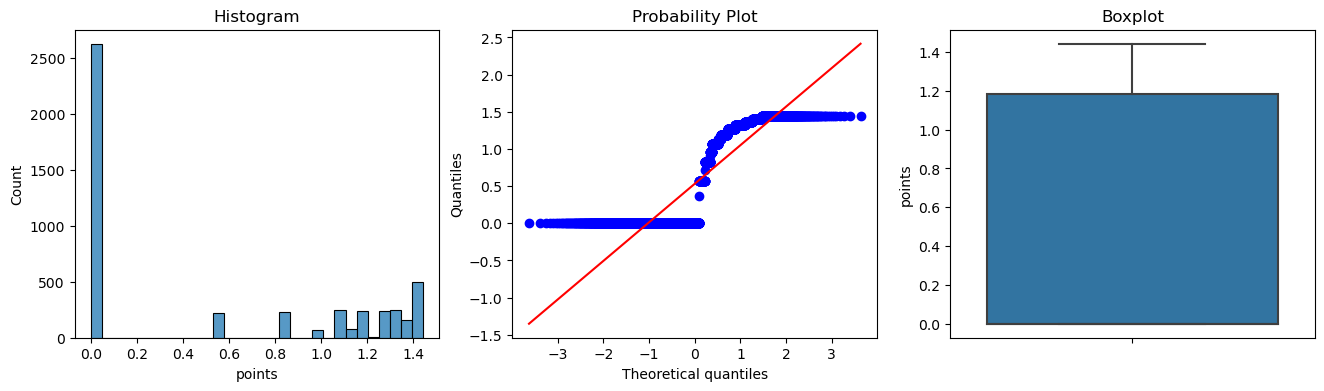

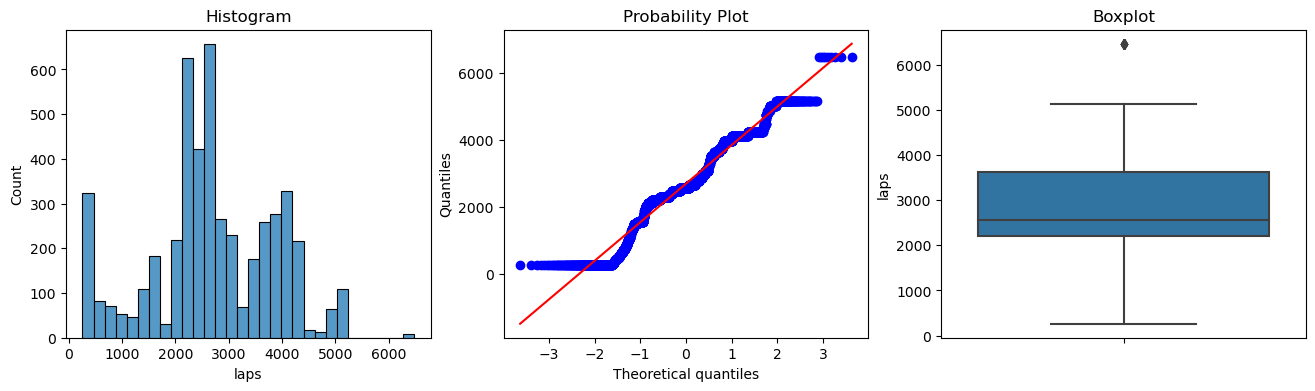

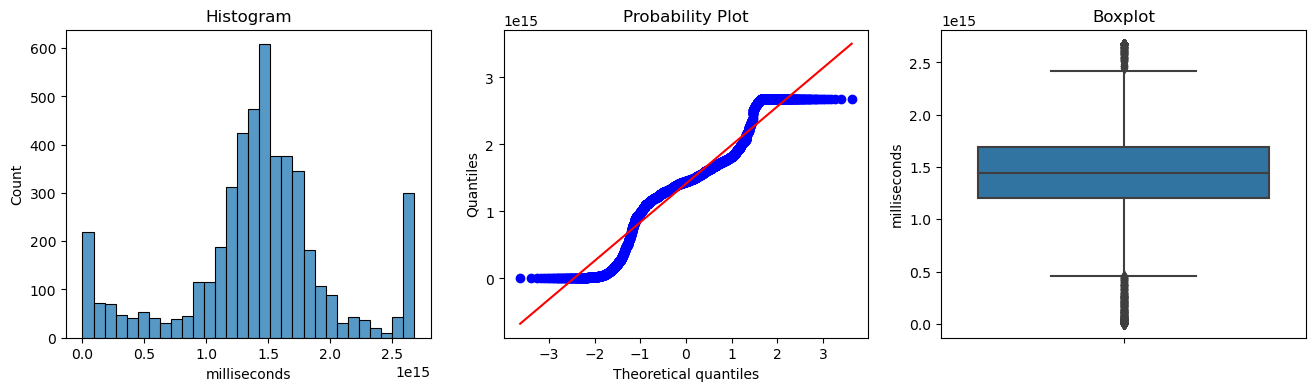

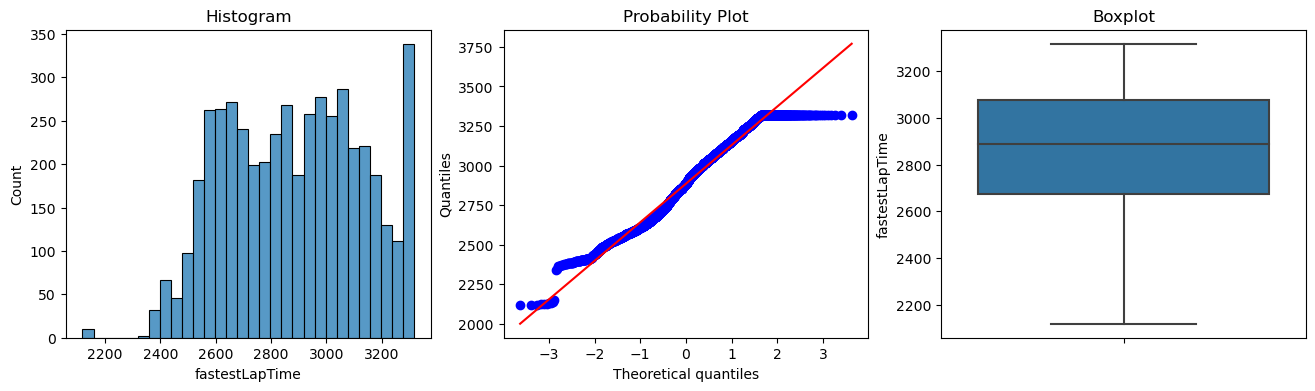

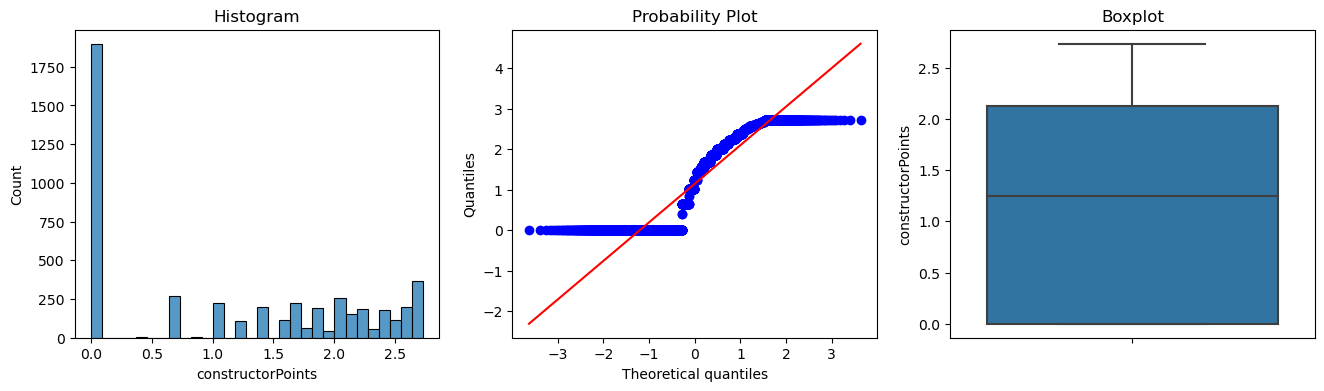

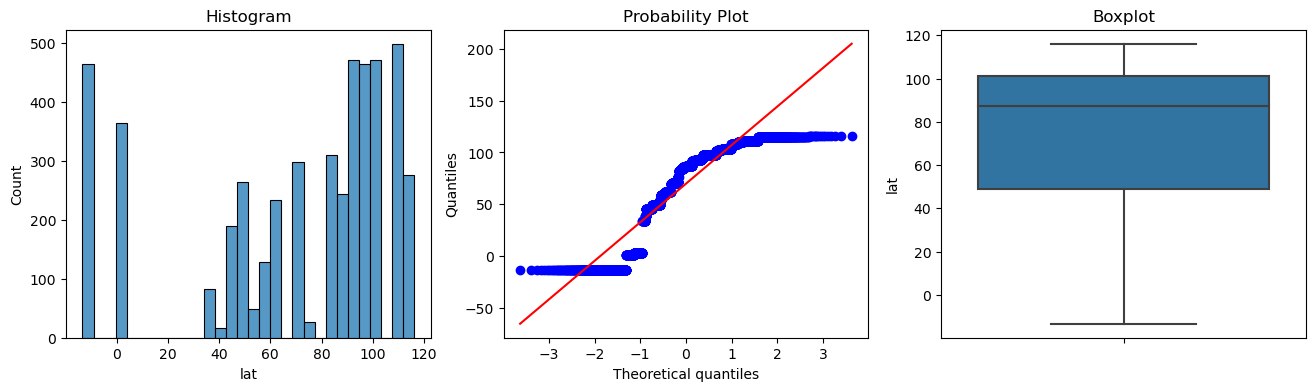

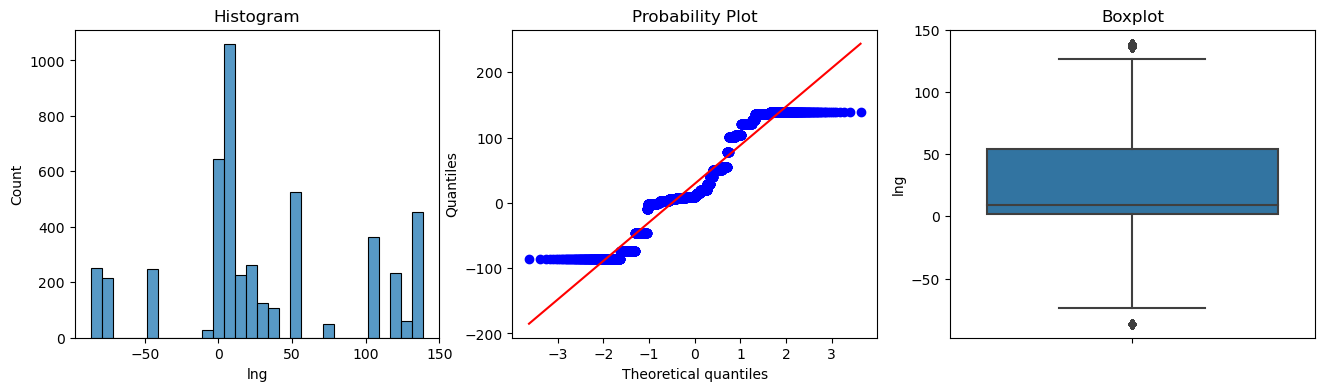

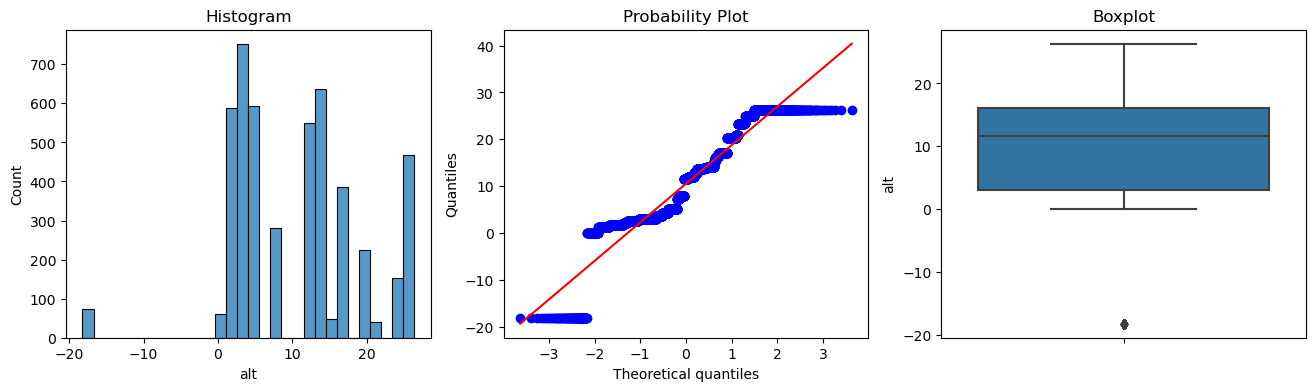

In [108]:
for n in num_cols:
    diagnostic_plots(X_train_tf, n)

[Go to Report](#part5)
>### 3.10 Variable Discretization <a id="part3.10"></a>

In [109]:
num_cols = ['points', 'laps', 'milliseconds', 'constructorPoints', 'lat', 'lng', 'alt']

In [110]:
# Discretization
disc = EqualFrequencyDiscretiser(q=10, variables = num_cols)

disc.fit(X_train_tf)

X_train_d = disc.transform(X_train_tf)
X_test_d = disc.transform(X_test_tf)

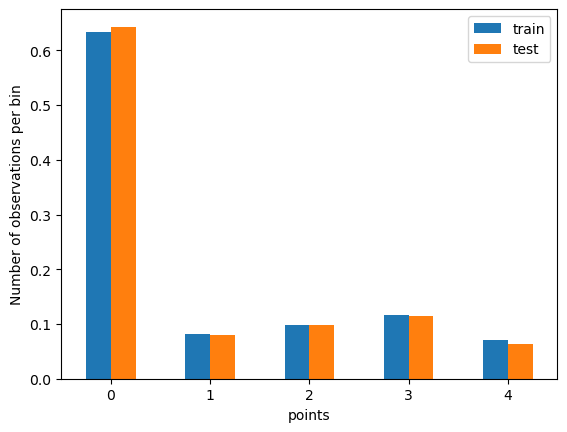

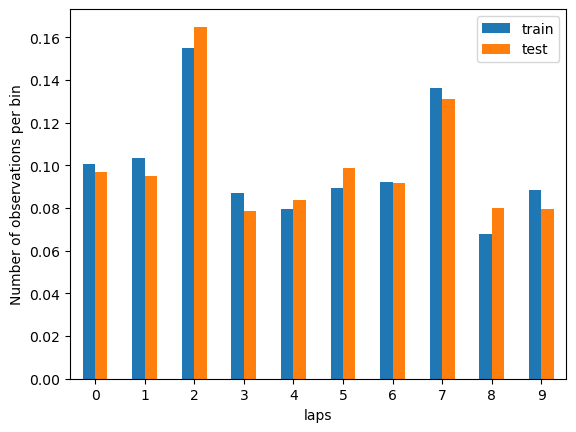

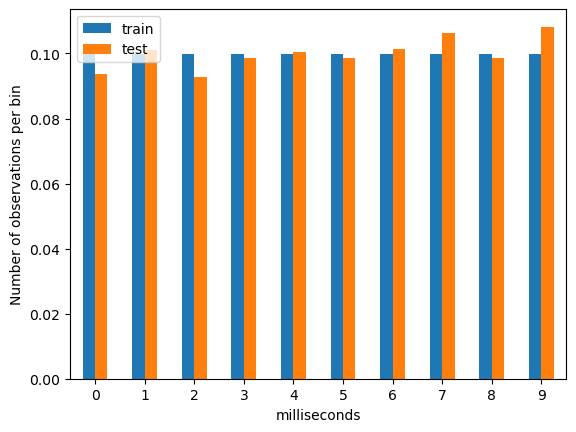

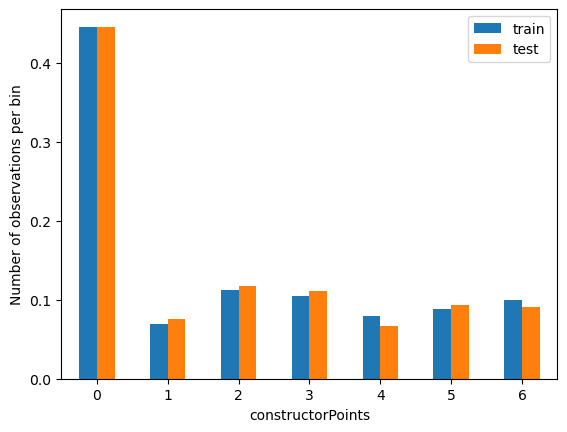

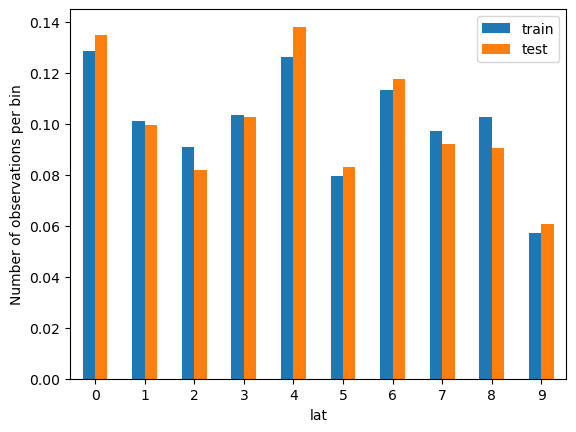

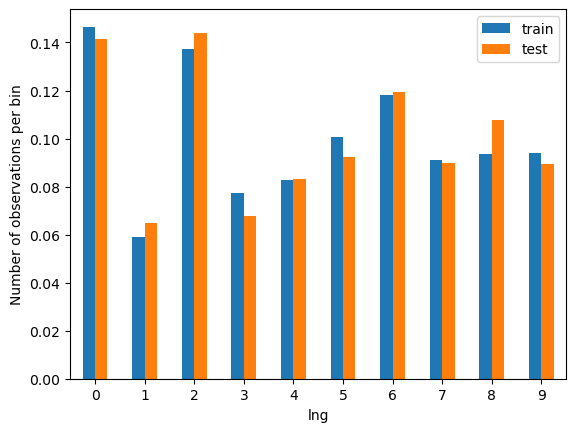

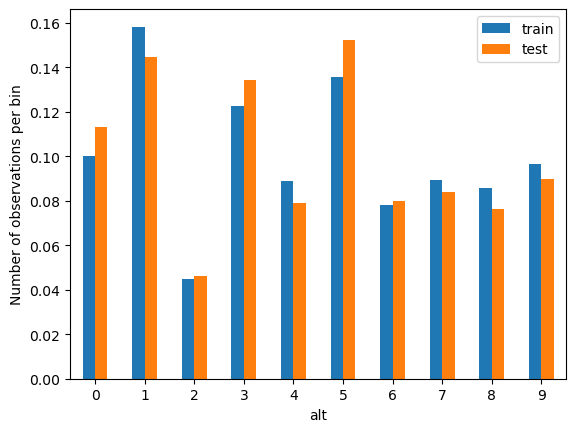

In [111]:
for n in num_cols:
    t1 = X_train_d.groupby([n])[n].count() / len(X_train_d)
    t2 = X_test_d.groupby([n])[n].count() / len(X_test_d)

    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')
    plt.show()

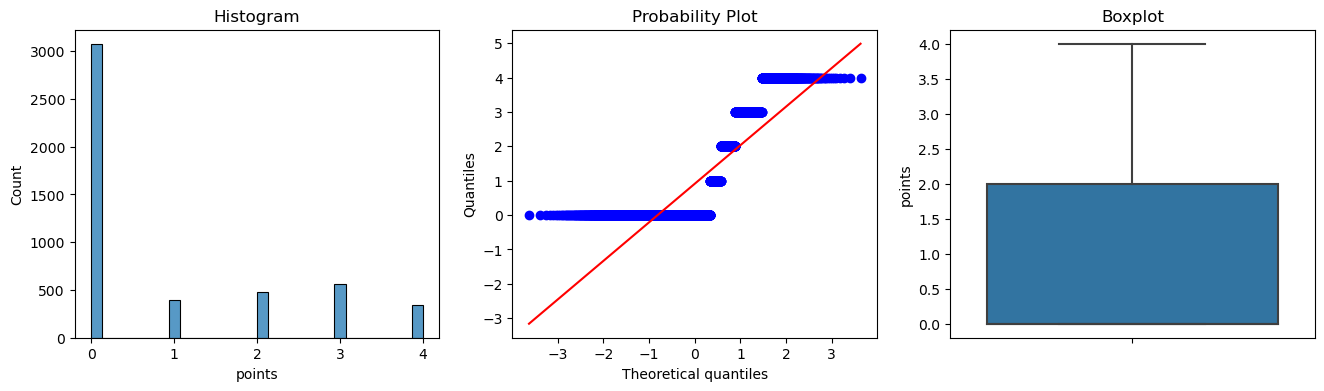

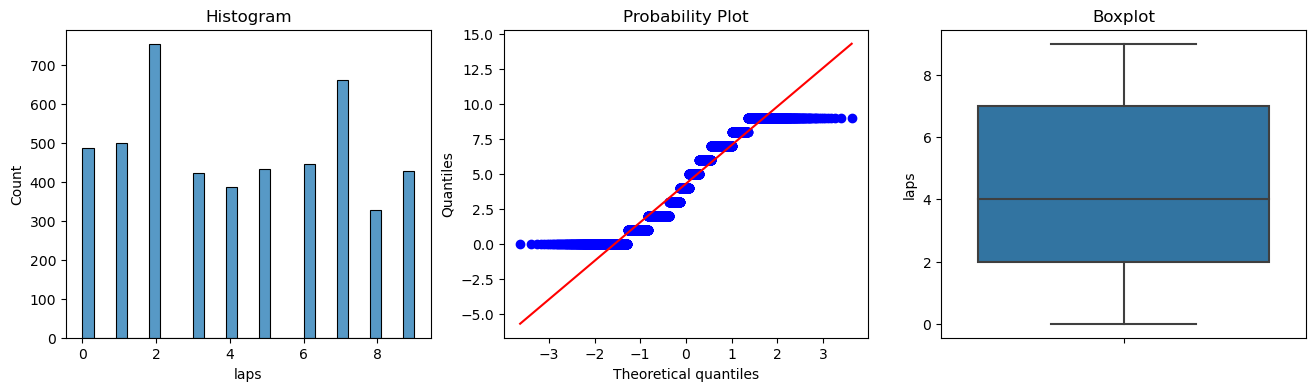

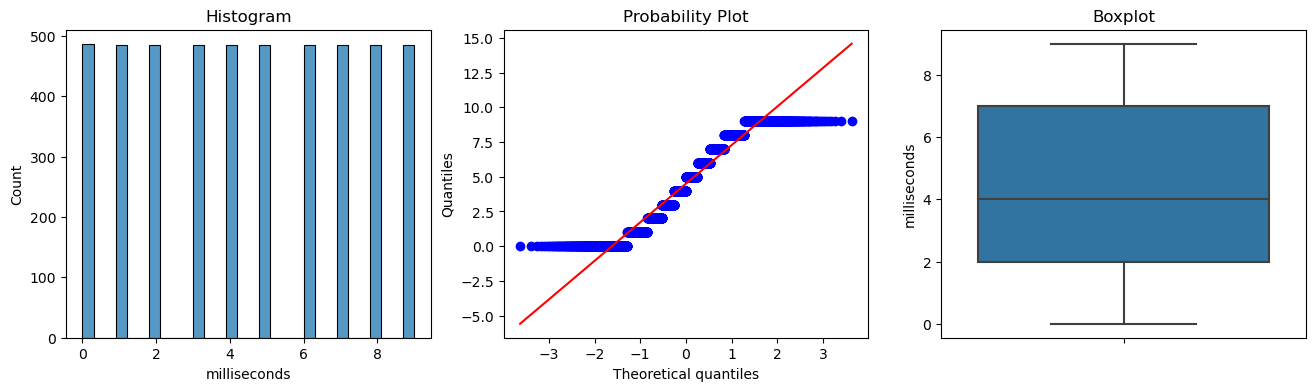

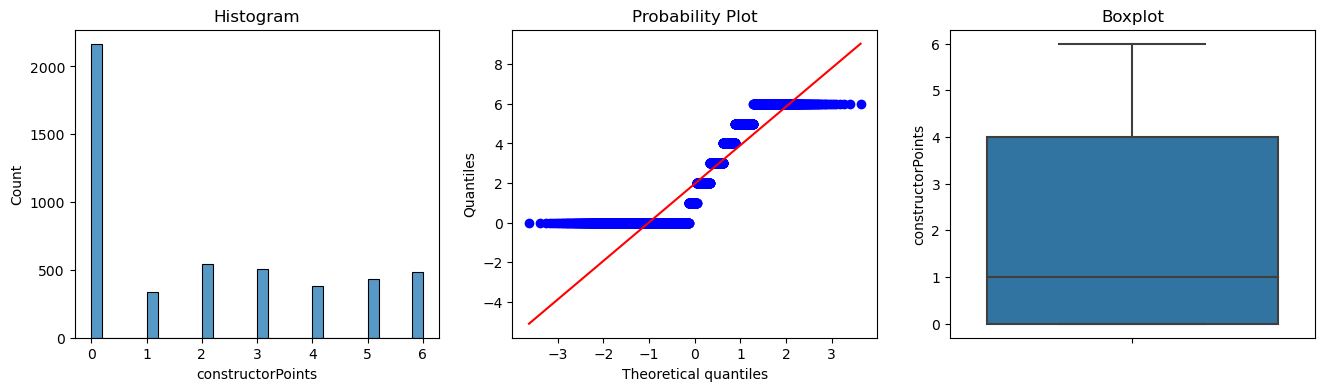

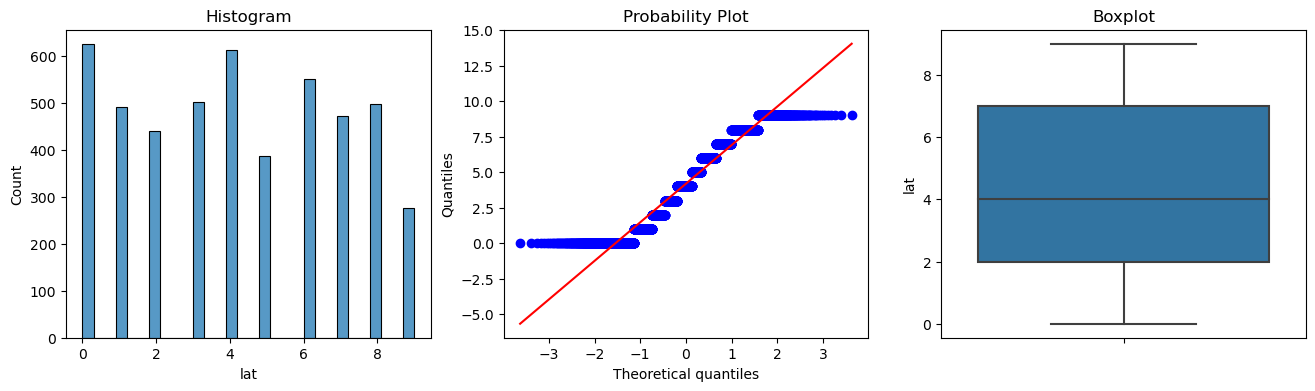

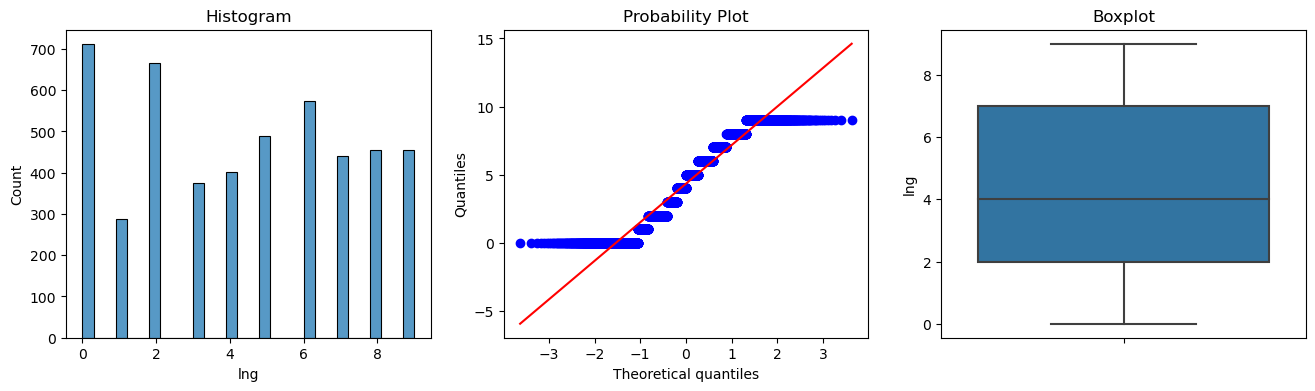

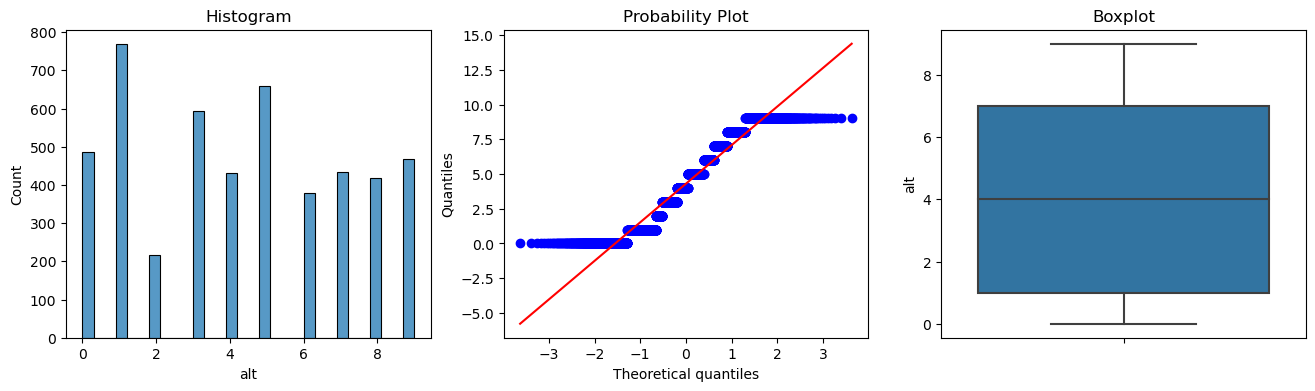

In [112]:
for n in num_cols:
    diagnostic_plots(X_train_d, n)

[Go to Report](#part5)
>### 3.11 Feature Scaling <a id="part3.11"></a>

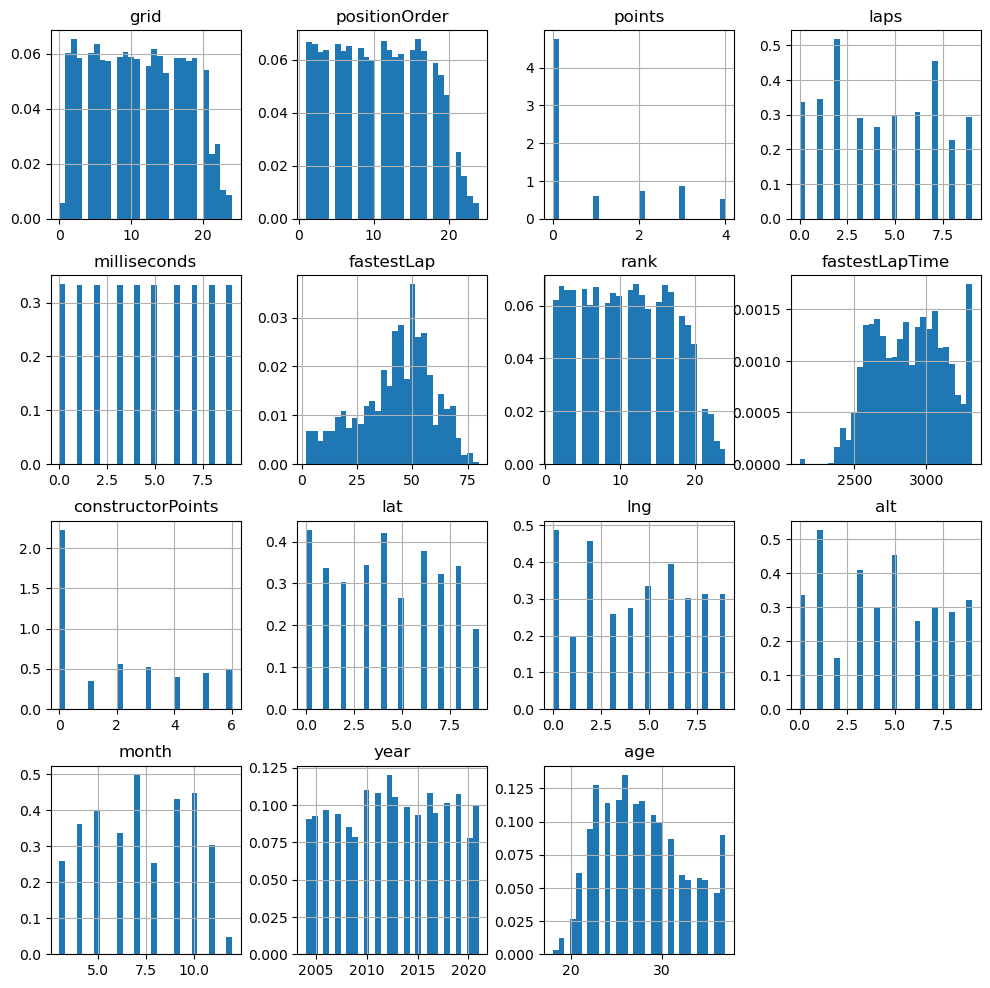

In [113]:
# Check variable distribution
num_cols = [c for c in X_train.columns if X_train[c].dtypes!='O']

X_train_d[num_cols].hist(bins=30, figsize=(12,12), density=True)
plt.show()

In [114]:
# Feature Scaling
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
x = ['points', 'constructorPoints','fastestLapTime', 'fastestLap']
scaler.fit(X_train_d[x])

# transform train and test sets

X_train_scaled = X_train_d.copy()
X_train_scaled[x] =  scaler.transform(X_train_d[x])
X_test_scaled = X_test_d.copy()
X_test_scaled[x] =  scaler.transform(X_test_d[x])

[Go to Report](#part5)
>### 3.12 Feature Engineering <a id="part3.12"></a>

In [115]:
#Polynomial expansion

X_train_d = X_train_d.reset_index(drop=True)
X_test_d = X_test_d.reset_index(drop=True)

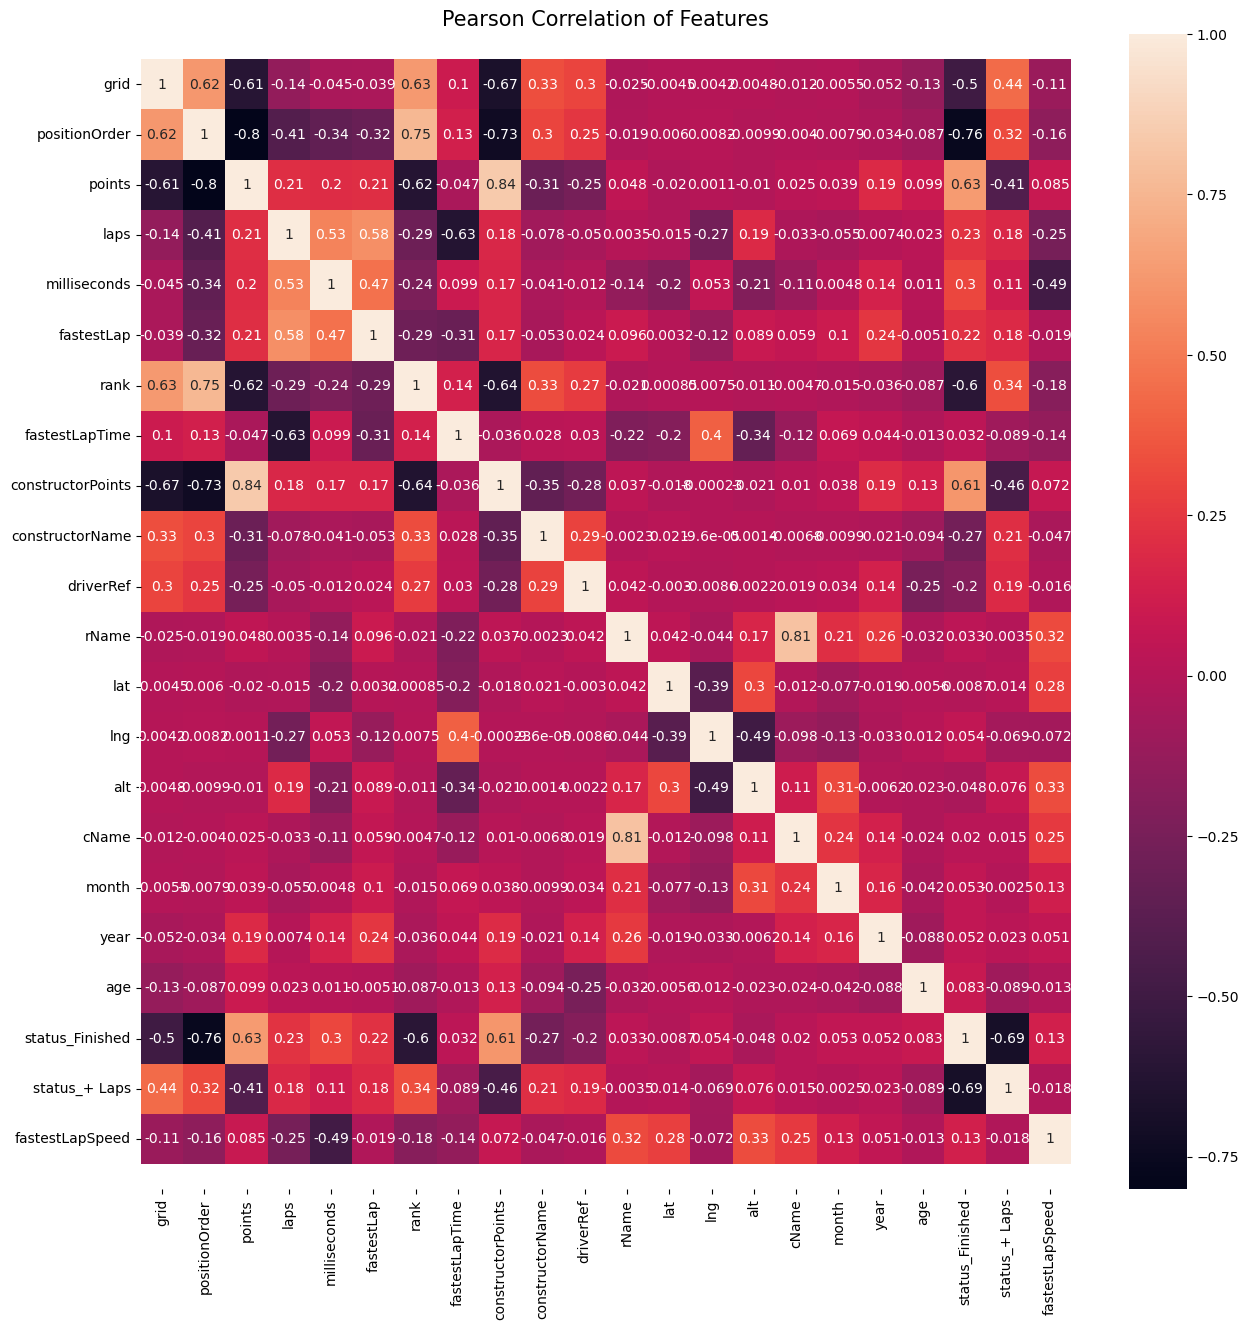

In [116]:
# Check correlations of variables with target variable
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', size=15)

ax = sns.heatmap(pd.concat([X_train_d, pd.DataFrame(y_train, columns = ['fastestLapSpeed'])],axis=1).corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

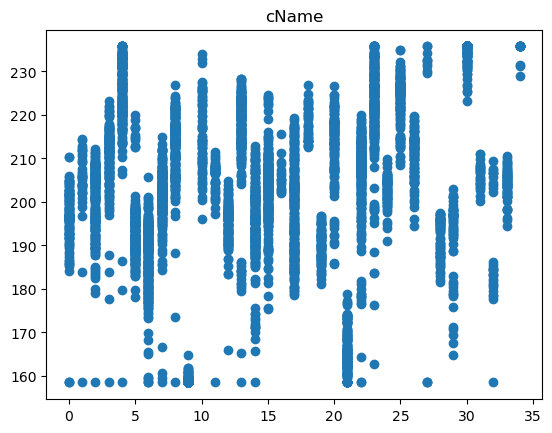

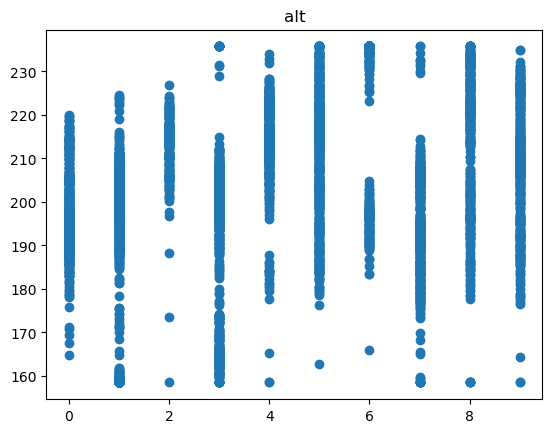

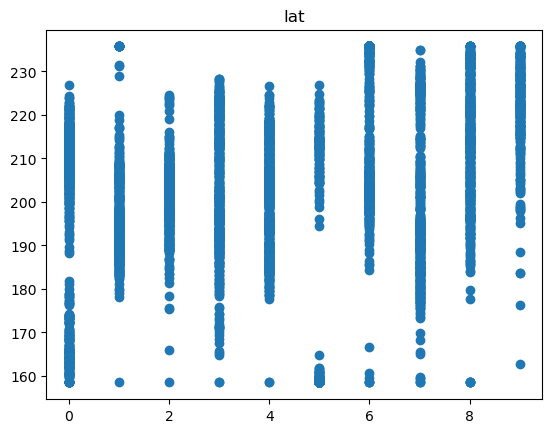

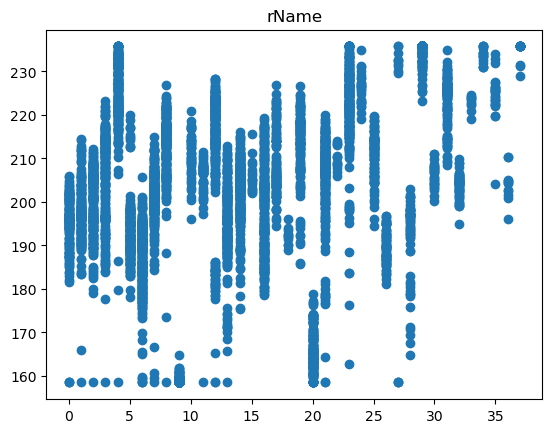

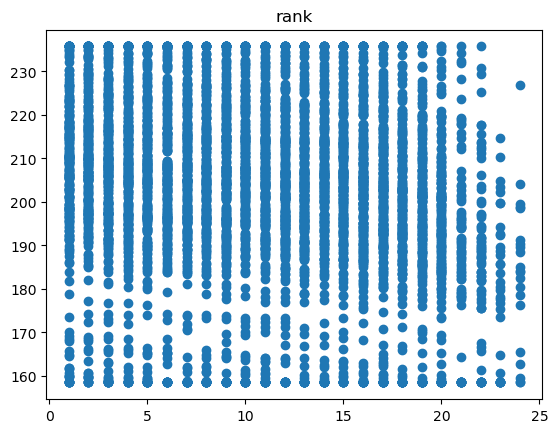

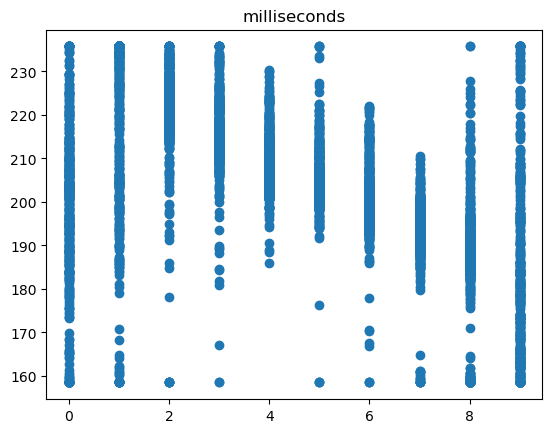

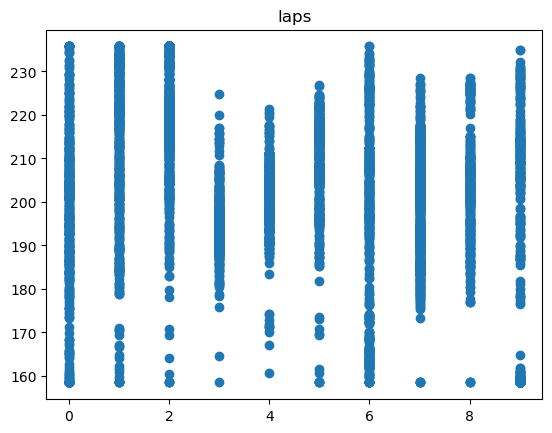

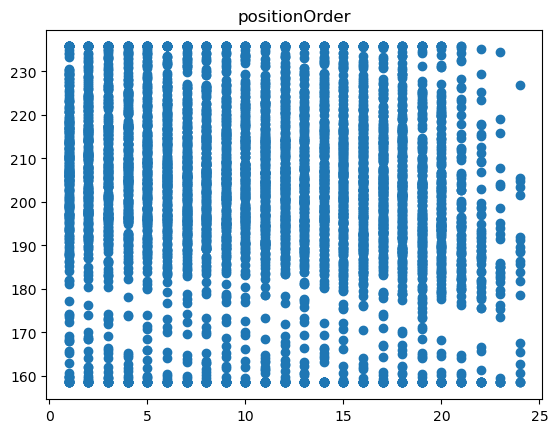

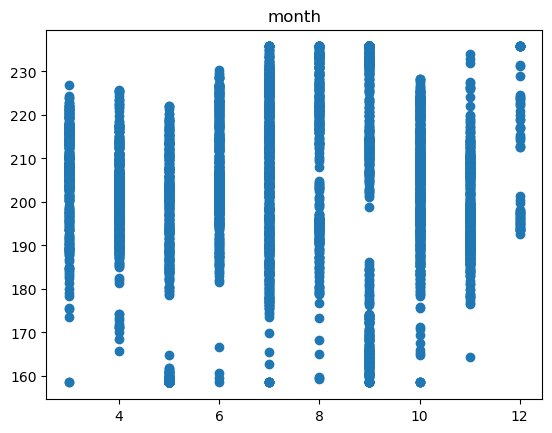

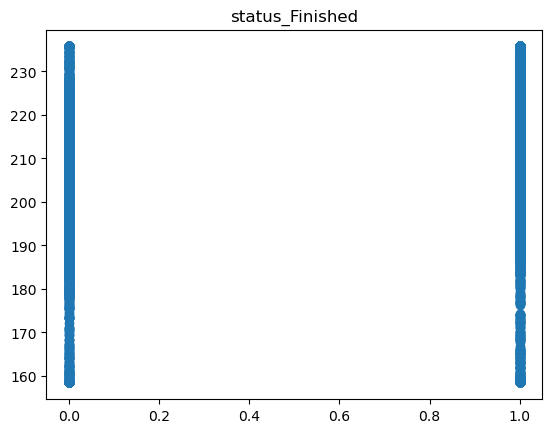

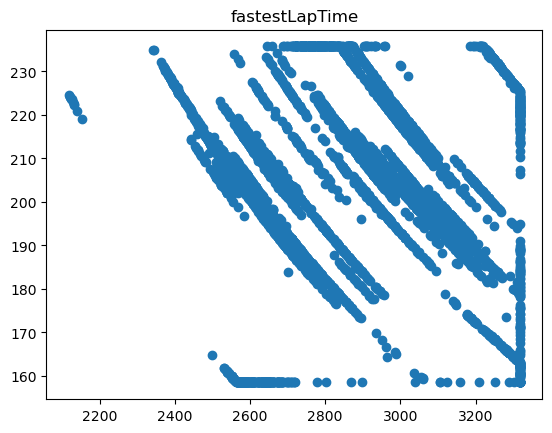

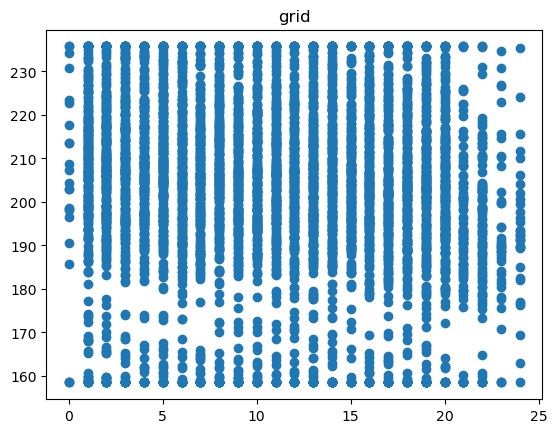

In [117]:
# plot relation of features of interest with the target
for f in ['cName', 'alt', 'lat', 'rName', 'rank', 'milliseconds', 'laps','positionOrder', 'month', 'status_Finished', 'fastestLapTime', 'grid']:
    plt.scatter(X_train_d[f], y_train)
    plt.title(f)
    plt.show()

In [118]:
# set up the polynomial expansion transformer

poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

# train the polynomial expansion transformer

poly.fit(X_train_d[['cName', 'alt', 'lat', 'rName', 'rank', 'milliseconds', 'laps','positionOrder', 'month', 'status_Finished', 'fastestLapTime', 'grid']])

# create the new features

train_t = poly.transform(X_train_d[['cName', 'alt', 'lat', 'rName', 'rank', 'milliseconds', 'laps','positionOrder', 'month', 'status_Finished', 'fastestLapTime', 'grid']])
test_t = poly.transform(X_test_d[['cName', 'alt', 'lat', 'rName', 'rank', 'milliseconds', 'laps','positionOrder', 'month', 'status_Finished', 'fastestLapTime', 'grid']])

poly.get_feature_names_out(['cName', 'alt', 'lat', 'rName', 'rank', 'milliseconds', 'laps','positionOrder', 'month', 'status_Finished', 'fastestLapTime', 'grid'])

array(['cName', 'alt', 'lat', 'rName', 'rank', 'milliseconds', 'laps',
       'positionOrder', 'month', 'status_Finished', 'fastestLapTime',
       'grid', 'cName^2', 'cName alt', 'cName lat', 'cName rName',
       'cName rank', 'cName milliseconds', 'cName laps',
       'cName positionOrder', 'cName month', 'cName status_Finished',
       'cName fastestLapTime', 'cName grid', 'alt^2', 'alt lat',
       'alt rName', 'alt rank', 'alt milliseconds', 'alt laps',
       'alt positionOrder', 'alt month', 'alt status_Finished',
       'alt fastestLapTime', 'alt grid', 'lat^2', 'lat rName', 'lat rank',
       'lat milliseconds', 'lat laps', 'lat positionOrder', 'lat month',
       'lat status_Finished', 'lat fastestLapTime', 'lat grid', 'rName^2',
       'rName rank', 'rName milliseconds', 'rName laps',
       'rName positionOrder', 'rName month', 'rName status_Finished',
       'rName fastestLapTime', 'rName grid', 'rank^2',
       'rank milliseconds', 'rank laps', 'rank positionOrder',
    

In [119]:
# capture the returned features in a dataframe
train_t = pd.DataFrame(train_t)
test_t = pd.DataFrame(test_t)

# add column names of created features
train_t.columns = poly.get_feature_names_out(['cName', 'alt', 'lat', 'rName', 'rank', 'milliseconds', 'laps','positionOrder', 'month', 'status_Finished', 'fastestLapTime', 'grid'])
test_t.columns = poly.get_feature_names_out(['cName', 'alt', 'lat', 'rName', 'rank', 'milliseconds', 'laps','positionOrder', 'month', 'status_Finished', 'fastestLapTime', 'grid'])

train_t.head()

cName  alt  lat  rName  rank  milliseconds  laps  positionOrder  month  status_Finished  fastestLapTime  grid  cName^2  cName alt  cName lat  cName rName  cName rank  cName milliseconds  cName laps  cName positionOrder  cName month  cName status_Finished  cName fastestLapTime  cName grid  alt^2  alt lat  alt rName  alt rank  alt milliseconds  alt laps  alt positionOrder  alt month  alt status_Finished  alt fastestLapTime  alt grid  lat^2  lat rName  lat rank  lat milliseconds  lat laps  lat positionOrder  lat month  lat status_Finished  lat fastestLapTime  lat grid  rName^2  rName rank  rName milliseconds  rName laps  rName positionOrder  rName month  rName status_Finished  rName fastestLapTime  rName grid  rank^2  rank milliseconds  rank laps  rank positionOrder  rank month  rank status_Finished  rank fastestLapTime  rank grid  milliseconds^2  milliseconds laps  milliseconds positionOrder  milliseconds month  milliseconds status_Finished  milliseconds fastestLapTime  \
0    0.0  8.0  8.0    0.0   6.0           5.0   6.0            5.0    5.0              1.0     2905.062439  10.0      0.0        0.0        0.0          0.0         0.0                 0.0         0.0                  0.0          0.0                    0.0              0.000000         0.0   64.0     64.0        0.0      48.0              40.0      48.0               40.0       40.0                  8.0        23240.499515      80.0   64.0        0.0      48.0              40.0      48.0               40.0       40.0                  8.0        23240.499515      80.0      0.0         0.0                 0.0         0.0                  0.0          0.0                    0.0              0.000000         0.0    36.0               30.0       36.0                30.0        30.0                   6.0         17430.374636       60.0            25.0               30.0                        25.0                25.0                           5.0                 14525.312197   
1    1.0  7.0  4.0    1.0   1.0           6.0   9.0            1.0    7.0              1.0     2494.591117   1.0      1.0        7.0        4.0          1.0         1.0                 6.0         9.0                  1.0          7.0                    1.0           2494.591117         1.0   49.0     28.0        7.0       7.0              42.0      63.0                7.0       49.0                  7.0        17462.137818       7.0   16.0        4.0       4.0              24.0      36.0                4.0       28.0                  4.0         9978.364468       4.0      1.0         1.0                 6.0         9.0                  1.0          7.0                    1.0           2494.591117         1.0     1.0                6.0        9.0                 1.0         7.0                   1.0          2494.591117        1.0            36.0               54.0                         6.0                42.0                           6.0                 14967.546702   
2    2.0  3.0  1.0    2.0   6.0           4.0   4.0            2.0    3.0              1.0     2996.845333   4.0      4.0        6.0        2.0          4.0        12.0                 8.0         8.0                  4.0          6.0                    2.0           5993.690666         8.0    9.0      3.0        6.0      18.0              12.0      12.0                6.0        9.0                  3.0         8990.535999      12.0    1.0        2.0       6.0               4.0       4.0                2.0        3.0                  1.0         2996.845333       4.0      4.0        12.0                 8.0         8.0                  4.0          6.0                    2.0           5993.690666         8.0    36.0               24.0       24.0                12.0        18.0                   6.0         17981.071998       24.0            16.0               16.0                         8.0                12.0                           4.0                 11987.381332   
3    3.0  4.0  8.0    3.0   6.0           5.0   7.0

In [120]:
# add new features to dataframe
X_train_p = pd.concat([X_train_d, train_t], axis=1)
X_test_p = pd.concat([X_test_d, test_t], axis=1)

In [121]:
X_train_d.shape, X_test_d.shape

((4851, 21), (2079, 21))

In [122]:
X_train_p.shape, X_test_p.shape

((4851, 475), (2079, 475))

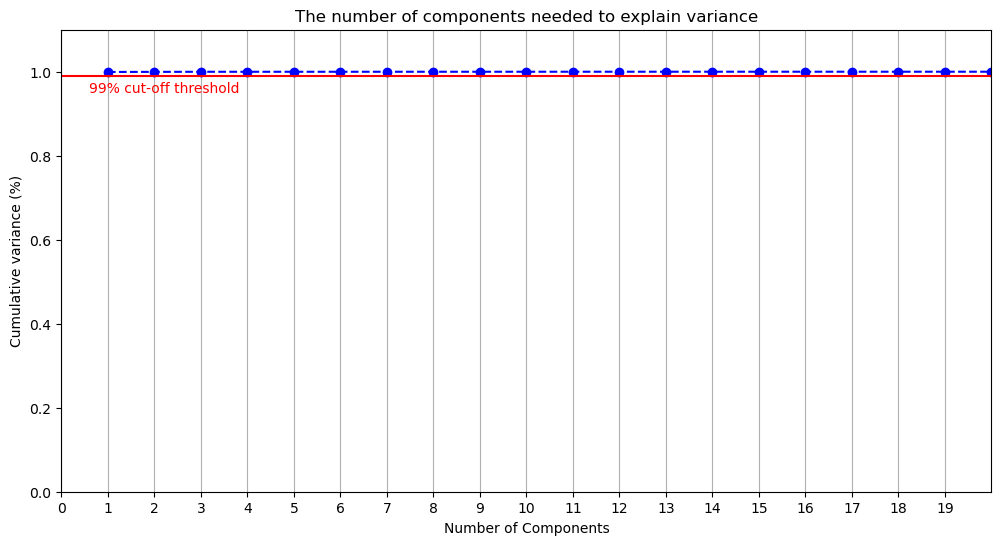

In [123]:
# Find optimal number of components for PCA 
pca = PCA().fit(X_train_p)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 476, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.xlim(0,20)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 20, step=1)) #set x-axis limit to be able to read graph better as hard to read if too many points
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.6, 0.95, '99% cut-off threshold', color = 'red', fontsize=10)

ax.grid(axis='x')
plt.show()

Text(0, 0.5, 'Percentage of Variance Explained')

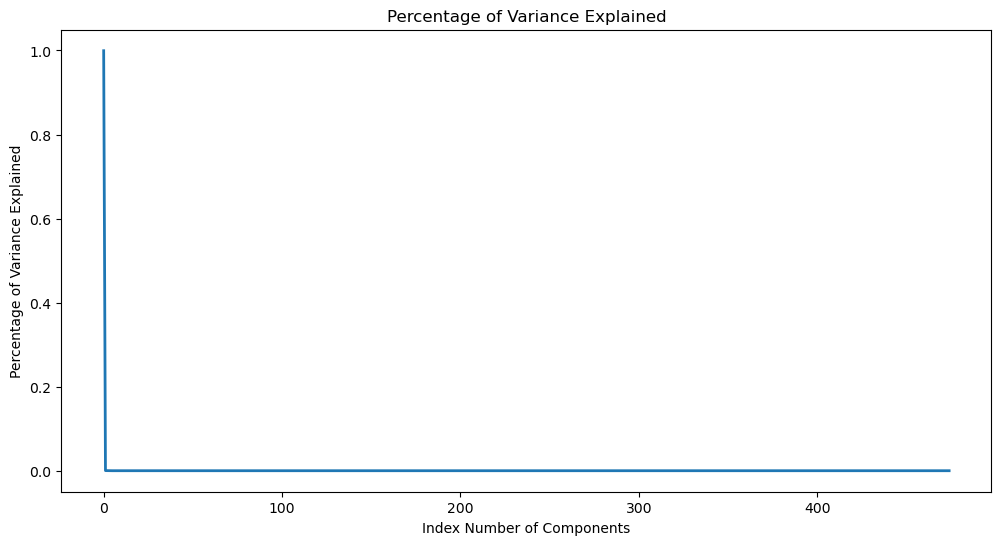

In [124]:
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.title('Percentage of Variance Explained')
plt.xlabel('Index Number of Components')
plt.ylabel('Percentage of Variance Explained')

In [125]:
# Perform PCA with optimal number of components
pca = PCA(n_components=20)
pca.fit(X_train_p)

X_train_pca = pca.transform(X_train_p)
X_test_pca = pca.transform(X_test_p)

X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

## 4 Machine Learning Modelling <a id="part4"></a>
[Go to Report](#part5)
>### 4.1 Naive Baseline Model <a id="part4.1"></a>

In [126]:
X_train_p.shape, X_test_p.shape

((4851, 475), (2079, 475))

In [127]:
import numpy as np
from scipy import stats

# pick the mean target value from all of train data
print(y_train.mean())

mean_target_value = y_train.mean()

print(f"The train mean target value is {mean_target_value:.2f}.")

202.97686899608328
The train mean target value is 202.98.


In [128]:
y_train_preds_naive = [round(mean_target_value,2) for row in X_train_p.iloc[:,0]]
y_train_preds_naive[0:5]

[202.98, 202.98, 202.98, 202.98, 202.98]

In [129]:
y_test_preds_naive = [round(mean_target_value,2) for row in X_test_p.iloc[:,0]]
y_test_preds_naive[0:5]

[202.98, 202.98, 202.98, 202.98, 202.98]

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")


The Naive Baseline Model's MSE on train data is 379.52.
The Naive Baseline Model's MSE on test data is 376.29.

The Naive Baseline Model's RMSE on train data is 19.48.
The Naive Baseline Model's RMSE on test data is 19.40.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


[Go to Report](#part5)
>### 4.2 Linear Regression Model <a id="part4.2"></a>

In [131]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train_p, y_train)

In [132]:
y_train_preds_linreg = linreg.predict(X_train_p)
y_test_preds_linreg = linreg.predict(X_test_p)

In [133]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_linreg

train_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on train data is {train_mse_linreg:.4f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_linreg

test_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on test data is {test_mse_linreg:.4f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_linreg

train_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on train data is {train_rmse_linreg:.4f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_linreg

test_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on test data is {test_rmse_linreg:.4f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_linreg

train_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on train data is {train_r2_linreg:.4f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_linreg

test_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on test data is {test_r2_linreg:.4f}.")


The LinReg Model's MSE on train data is 10.8379.
The LinReg Model's MSE on test data is 19.5615.

The LinReg Model's RMSE on train data is 3.2921.
The LinReg Model's RMSE on test data is 4.4228.

The LinReg Model's R2 on train data is 0.9714.
The LinReg Model's R2 on test data is 0.9480.


## 5 Report <a id="part5"></a>

>### Introduction with Value Problem Statement
>>Formula 1 (F1) is a premier international motorsport which encapsulates the essence of speed, innovation, and precision engineering. Founded in 1950, F1 has evolved into an exciting spectacle that combines cutting-edge technology, strategic team dynamics, and the exceptional skill of top racing drivers. F1 captivates a global audience, showcasing human creativity, fierce rivalry, and an unwavering desire for victory.
>>
>>A F1 season consists of a series of races, known as Grands Prix. Grands Prix are held on closed public roads or on purpose-built racing tracks across many countries. A season usually contains around 21 races. Before each race, practice and qualifying sessions are held. Qualifying sessions are held to determine the starting position of each driver in a race, where the driver with the fastest single lap will get the first place on the grid. The results of each race are then combined to determine two annual Championships, one for drivers and one for constructors.
>>
>>F1 has a large audience, and this brings in revenue and opportunities. Firstly, a larger audience would attract more sponsors seeking to promote their products or services, such as Heineken for their alcoholic beverages. Sponsors are willing to invest in F1 to display their brand logo on banners, cars and track suits. This generates revenue for the teams and the sport. Secondly, F1 races attract crowds to circuits around the world, which suggests more ticket sales. Higher ticket sales generates more revenue for the sport. Furthermore, F1 has a profitable market for merchandise such as apparel. A large audience would mean larger potential customers for F1 merchandise. As a result, sales from selling of merchandise contributes to the revenue. Hence, increasing global audience is important to increase revenues and profits for F1.

>### Problem Formulation

>>To continue increasing the global audience, the problem I have formulated is to **predict the fastest lap speed of a race**. Knowing the fastest lap speed helps F1 in several ways. Firstly, this statistic resonates with fans and adds excitement to the race, thus increasing fan engagement and entertainment. Sharing the fastest lap speed enhances the the entertainment value, thus keeping fans innvested in the sport and ultimately driving viewership. Besides that, the fastest lap speed reflects the performance and skills of a driver. It serves as a showcase of innovation and excellence, which aligns with the branding strategies of sponsors. Hence, sponsors invest in F1 to enhance brand image by associating their products or services with the high performance values represented by F1. This increases revenue for the teams and F1.
>>
>>These were the given datasets:

Table | Description
---|---
circuits             |   Information about circuit (e.g. location, country, name)
constructorResults   |   Information about points won by constructors in a race
constructorStandings |   Information about constructors' standings (e.g. no. of seasons won, total points for a season)
constructors         |   Information about constructors (e.g. name, nationality)
driverStandings      |   Information about drivers' standings (e.g. no. of seasons won, total points for a season)
drivers              |   Information about drivers (e.g. name, dob, nationality)
lapTimes             |   Information about lap times of a driver in a race
pitStops             |   Information about pit stops (e.g. duration, lap)
qualifying           |   Information about qualifying sessions (e.g. lap time of Q1, Q2 and Q3)
races                |   Information about race (e.g. date, name)
results              |   Informaton about race results (e.g. fastest lap time and speed, position of driver)
seasons              |   Information about season (e.g. year)
status               |   Information about status (e.g. Finished, Retired)

>>From the above table, I decided to use these [tables](#part1.1):
>>- circuits
>>- constructorResults
>>- constructors
>>- drivers
>>- lapTimes
>>- races
>>- results
>>- status
>>
>>I performed [EDA](#part1.2) on each of the chosen tables to observe the values.
>>
>>##### Results
This table will be the main dataset as it contains my target variable, fastestLapSpeed. Other columns such as milliseconds and points tells me about the drivers' performance during the race. Higher points would mean the driver finished the race faster, which affects lap speed.
>>
>>##### Circuits
I decided to use the circuits table as columns such as alt, lng and lat can help to show the climate conditions of the circuit. Higher altitudes suggests lower temperatures and lower air pressure. The track temperature affects the performance of the tires, which affects speed.
>>
>>##### Constructor Results
I decided to use the constructorResults table as constructor points shows the performance of a constructor. For instance, higher points would mean the constructor has designed better parts for the cars. The quality of the parts can affect the lap speed of a car.
>>
>>##### Constructors
I decided to use the constructors table as name can help me uniquely identify the constructor. I used name instead of constructorId as the model may intepret it inaccurately. For instance, 20 is a bigger number than 1, thus the model may intepret it as contructor with constructorId 20 is better than contructor with constructorId 1.
>>
>>##### Drivers
I decided to use the drivers table as columns such as name can help me uniquely identify the driver and dob can help me calculate the age of the driver during a race. The age of the driver may affect the driver's performance, which in turn affects the lap speed. For instance, a younger driver has faster reflexes and stamina.
>>
>>##### Lap Times
I decided to use the lapTimes table as columns such as milliseconds and lap tells me the duration for a lap of a race. Since there are null values in the milliseconds column in the results table, I will use the lap times table to calculate the duration of a race for a driver to replace the null values.
>>
>>##### Races
I decided to use the races table as columns such as name helps me uniquely identify the race and date can help me calculate the age of the driver as of the year of a race.
>>
>>##### Status
I decided to use the status table as status helps me identify the status of the driver during the race. Accidents and faulty car parts may affect the fastest lap speed.

>### Data Wrangling on Multiple Tables
[Go to Section](#part2)

>>##### [Merging tables](#part2.1)
After performing EDA, I merged the tables using left join as I want to retain all the rows in the results table. I updated the dataframe of each table by only keeping columns that I want to use. For instance, for constructorResults, I only kept raceId, constructorId and points. I needed to keep raceId and constructorId so that I could merge the constructorResults table with the results table. 
>>
>>These are the columns I kept for each table that I merged to results table:
>>- constructorResults: raceId, constructorId, name
>>- constructors: constructorId, name
>>- drivers: driverId, driverRef, dob
>>- races: raceId, circuitId, date, url, name
>>- circuits: circuitId, lat, lng, alt, name
>>- status: statusId, status
>>
>>I only merged lapTimes at a later part as I will be grouping the rows by raceId and driverId and adding the milliseconds together after grouping to find out the duration of a race for each driver.
>>
>>After merging, my dataframe contains 25399 rows and 31 columns.
>>
>>##### [Check Values](#part2.2)
After merging the tables, I checked the values of the columns. In some of the columns, there are '\\N' values, such as the alt column. I replaced all the '\\N' values with null. After replacing the values, the columns which contain null values are position, time, milliseconds, fastestLap, rank, fastestLapTime, fastestLapSpeed, constructorPoints, date, and alt. Since my target variable is fastestLapSpeed, I dropped all the rows where fastestLapSpeed is null. This reduced the number of rows to 6953. 
>>
>>To observe the date column data, I split them into day, month and year. After splitting, I observed the unique values for year, and found out that there are irregular values such as '12011'. I replaced the rows with irregular values by creating a dictionary where irregular values are the keys and the values are the years in the correct format. 
>>
>>After replacing the irregular values, I located the rows where date is null and added the indexes of the rows to a list. I used beautifulsoup to extract the dates of the race from the urls in the url column, and replaced the null values with the extracted dates. I checked the date values afterwards, and corrected the format for some of the rows. Once the null values have been replaced by dates in the desired format, I split the date column into year, month and day again. Some of the months had '0' in front of the value, thus I created a dictionary to replace the values. For instance, I used the dictionary to replace '09' with '9'.
>>
>>Next, I checked the values for fastestLapTime. There was a row which was formatted in seconds, thus I changed the format of the value to minutes:seconds.tenthofseconds, to match the format of values of other rows. To change fastestLapTime to milliseconds format, I split the fastestLapTime into three columns - time1 contains the minute, time2 contains the seconds, and time3 contains the tenth of the second. I calculated the fastestLapTime in milliseconds using this formula: (df['time1'] * 60000) + (df['time2'] * 1000) + (df['time3'] * 100)
>>
>>Afterwards, I replaced the null values in milliseconds using lap_times_df where I grouped the rows by raceId and driverId, and added the milliseconds together. 
>>
>>Moving on, I checked the values for points and realised that there were points up to 50. To my knowledge, the maximum points a driver can win is 25 for first place. Thus, I located the row where points is 50 and checked the url. From the Wikipedia page, I found out that double points were awarded for that race. However, the point system would revert back to 25-18-15-12-10-8-6-4-2-1 for subsequent races, which meant that the 2014 Abu Dhabi Grand Prix was the only race where the double point system was used. Thus, I located the rows where raceId is 918 (raceId for 2014 Abu Dhabi Grand Prix), and replaced the values with the usual point system. I also did the same for constructorPoints.

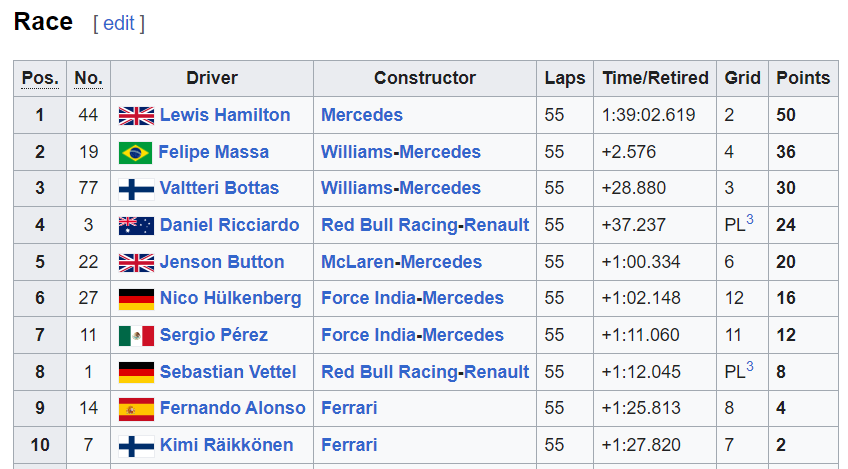

>>Next, I checked the values of positionOrder. There were rows with value '99' and after research, positions do not go up to 99. Thus, I located rows where positionOrder is 99 and checked the URLs. I discovered that position 99 is the same as position 1 when I compared the names of the drivers to the first place winners of the races. Hence, I replaced rows with 99 as the positionOrder value to 1.

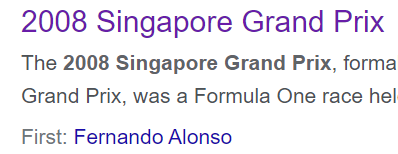

>>##### [Feature Creation](#part2.3)
>>After checking the values, I created a new column called 'age'. I converted both date and dob to datetime and subtracted the year of dob from the year of the race.
>>
>>##### [Data Overview](#part2.4)
>>I renamed columns and dropped columns that will not be used. These are the reasons for dropping the columns:
>>- resultId : There are too many unique values.
>>- driverId, constructorId, raceId, circuitId, statusId : Using name to replace the Id.
>>- number, day : They are not relevant.
>>- time : Not needed as I already have the duration in milliseconds, which is easier to read.
>>- time1, time2, time3, milliseconds_y : Not needed anymore as they were only used to calculate milliseconds.
>>- positionText, position : They are similar to positionOrder.
>>- date : Not needed anymore as I have split the columns into year, month and day.
>>- dob : Not needed anymore as I have already calculated age.
>>
>>I also changed the data types of columns to float and integer. After dropping rows and columns, the dataframe has 6953 rows and 21 columns.
>>
>>##### [Exploratory Data Analysis](#part2.5)
>>After merging and cleaning, I conducted EDA on the data. I first conducted univariate analysis to observe the spread of the target variable. It is right-skewed and there are outliers, which will be handled later on. I also conducted bivariate analysis for categorical variables against target and correlation of numerical variables with the target. Bivariate analysis of categorical variables helps me observe the spread of target for each category of the variable. The correlation chart between numerical variables and the target helps me observe which variables have a stronger relationship with the target. For instance, from the correlation chart, we can see that positionOrder has the strongest negative correlation with the target.

>### Data Cleansing and Transformation
[Go to Section](#part3)

>>##### [Quantifying Missing Data](#part3.1)
>>I plotted out a bar graph and printed out the count of nulls for each variable to observe the columns with missing values. From the graph, there are only two columns with missing values which are milliseconds and alt. Since they only make up a very small percentage, I dropped rows where there are null values as it would not affect the data much.
>>
>>##### [Determining Cardinality](#part3.2)
>>Cardinality refers to the number of unique values in a variable. To find out how many unique values exist for the categorical variables, I printed out the cardinality for each variable using .nunique function. There are two columns with very high cardinality, which are driverRef and status. I paid more attention to these two variables for the next section.
>>
>>##### [Identifying Rare Categories](#part3.3)
>>Rare categories are categories in a variable that have a low frequency. Since the cardinality of the variables are high, we consider categories below the 0.5% frequency limit as rare. I displayed a bar plot for each categorical variable. I will not be regrouping rare categories for constructorName, cName and rName as the cardinality is lower as compared to the other two  variables, and there are not as many rare categories. I regrouped status such that there are only three categories: Finished, + Laps, and Others. For driverRef, I will regroup it using the RareLabelEncoder when I encode categorical variables later on.
>>
>>##### [Check Variable Distribution](#part3.4)
>>Afterwards, I checked the distribution of the numerical variables to see what kind of distribution the variables follow. Most of the variables are skewed to the right or left. I will handle these variables by transforming and discretising them later on.
>>
>>##### [Check for Outliers](#part3.5)
>>I plotted out boxplots for the numerical variables to check if there are outliers. Most of the variables have outliers, including the target variable. These variables will be used for outlier handling later on. Handling outliers before splitting the dataset into train and test may still result in the presence of outliers in the train and test sets.
>>
>>##### [Train Test Split](#part3.6)
>>Before encoding and transforming the variables, I split the dataset into train and test, by a ratio of 7:3. My train dataframe consists of 4851 rows while my test dataframe consists of 2079 rows.
>>
>>##### [Handling Outliers](#part3.7)
>>Winsorization involves capping outliers at a specified percentile without having to remove the outliers. It preserves the overall shape and characteristics without changing the distribution of the rest of the data. By capping the extreme values at a specific percentile, it reduces the influence of extreme observations on modeling, thus producing more reliable results. I capped the values at 95th percentile so that I can still preserve most of the original data. I did not use outlier trimming as it involves removing extreme observations. This can result in loss of information and affect the distribution of the data. It reduces the sample size, which can lead to less reliable results.
>>
>>To handle outliers, I performed winsorization on the numerical variables. Since different variables are skewed to different sides, I winsorized them separately.
>>- Winsorization where 'tail' = 'right' : points, milliseconds, constructorPoints, fastestLapTime, alt, age
>>- Winsorization where 'tail' = 'left' : laps, lat
>>- Winsorization where 'tail' = 'both' : lng
>>
>>After performing winsorization, there are still outliers in the variables, but not as many as compared to before.
>>
>>##### [Encoding Categorical Variables](#part3.8)
>>Encoding converts categorical variables into numerical representations that can be processed by machine learning algorithms and statistical models. I will be using different types of encoding methods for the variables. As mentioned earlier, I will be performing rare label encoding on driverRef to regroup rare categories.
>>
>>- One-Hot Encoding : status
>>- Rare Label Encoding : driverRef
>>- Ordinal Encoding : driverRef, constructorName, cName, rName
>>
>>Since status only has three categories, I used one-hot encoding so that there will not be too many new columns. I used ordinal encoding for the other categorical variables due to the high cardinality. If I used one-hot encoding for them, there will be a lot of new columns generated. I did not use frequency encoding as some categories may have the same count, thus I am unable to uniquely identify them. I did not perform ordinal encoding on driverRef directly as null values were introduced during the encoding. This is due to the presence of rare categories in the test set which is not present in the train set. Thus, I performed rare label encoding first before performing ordinal encoding on driverRef.

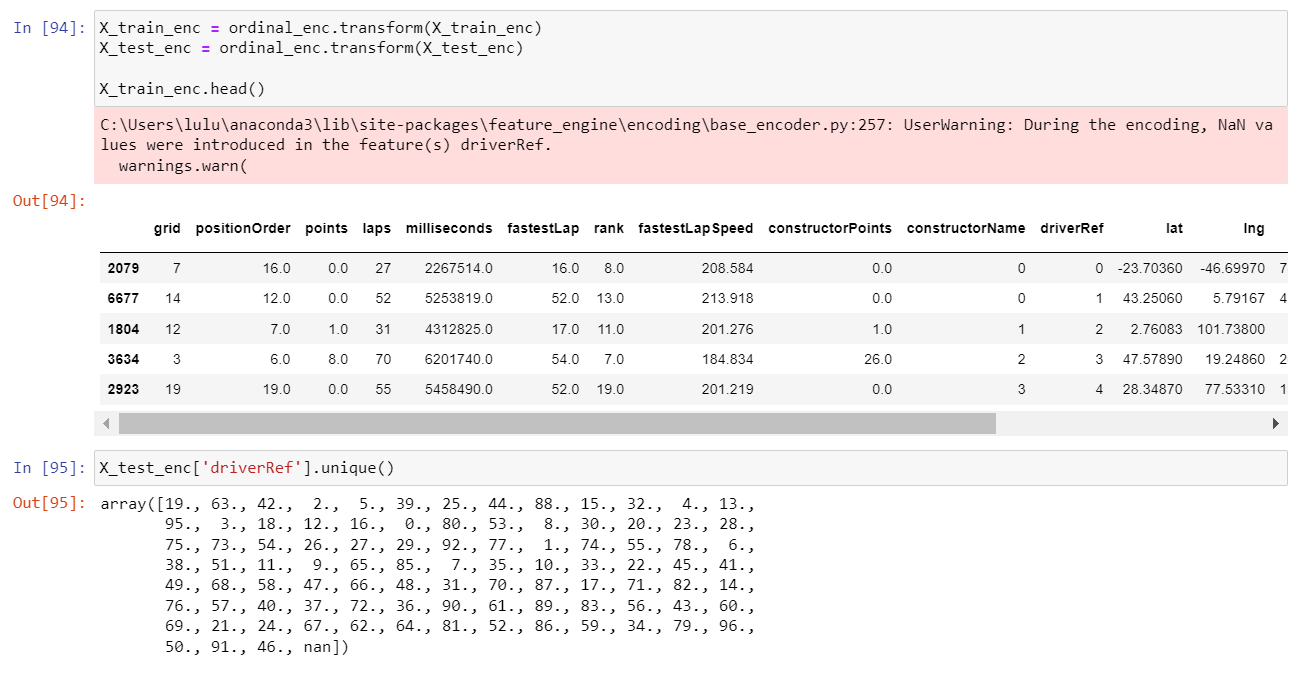

>>##### [Transforming Numerical Variables](#part3.9)
>>Yeo-Johnson Transformation is a mathematical technique used for data transformation, particularly for dealing with skewed distributions and making the data more suitable for statistical modeling. Yeo-Johnson is able to deal with both positive and negative values, which are present in the train and test datasets. I decided to perform Yeo-Johnson on points, laps, milliseconds, constructorPoints, fastestLapTime, lat, lng, and alt to adjust the skewness of those variables.
>>
>>I have tried performing Logarithm Transformation but it was unsuccessful due to presence of zero and negative values. This was the output:

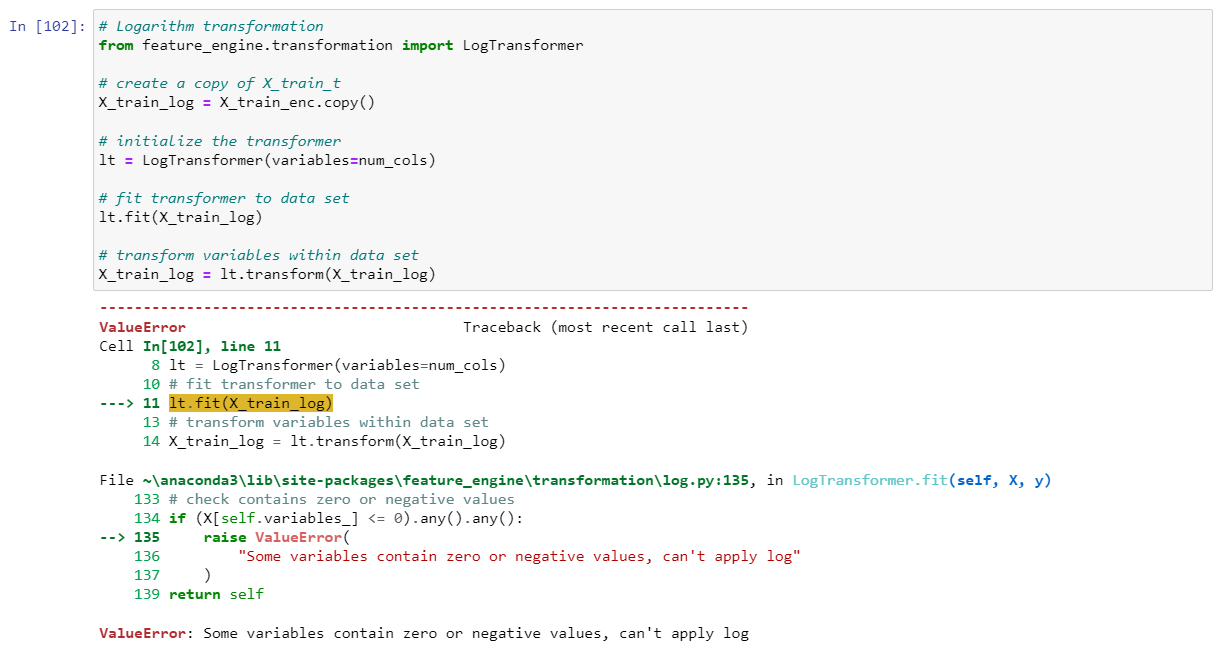

>>I also tried performing reciprocal transformation, but it generated an error due to the presence of zero values. This was the output:

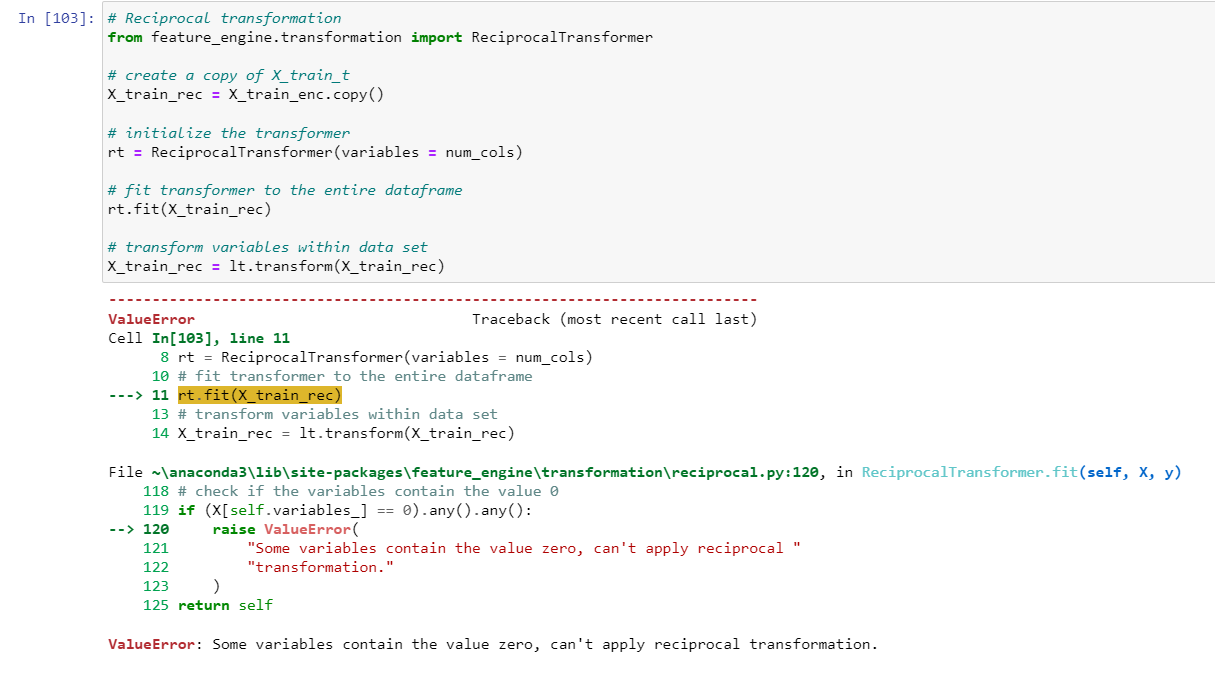

>>##### [Variable Discretization](#part3.10)
>>After transforming the numerical variables, I proceeded to discretize the variables using equal frequency descretization to increase the linearity and get rid of gaps in between values such as for columns alt and lat. I discretized all the columns I had transformed except for fastestLapTime, as fastestLapTime already showed a linear relationship.
>>
>>Equal frequency discretization divides the values of a variable into intervals that carry the same proportion of observations. The interval width is determined by quantiles, and thus different intervals may have different widths.
>>
>>##### [Feature Scaling](#part3.11)
>>Feature scaling is a preprocessing technique used in data analysis and machine learning to ensure that all variables in a dataset have similar scales. For feature scaling, I decided to use standardisation. Standardisation retains the information in the original distribution by transforming the data based on the mean and standard deviation. Techniques like min-max scaling compresses the data to fit a specific range, which may lose some of the original distribution's information. Standardization is also less influenced by outliers compared to min-max scaling.
>>
>>I have tried different combinations of variables for standardisation. However, there was no effect on my model score. Thus, I did not do feature scaling.
>>
>>Before standardisation: 

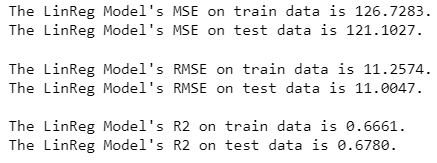

>>After standardisation:

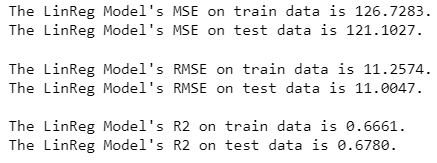

>>##### [Feature Adding](#part3.12)
>>Feature adding is a process where new variables are generated and added to a dataset to enhance the information available to models. This process involves using existing data to create additional attributes that might capture valuable patterns or relationships not present in the original dataset. For feature adding, I decided to use Polynomial Expansion. Polynomial expansion creates new features by raising features to various powers. By introducing the polynomial terms, the feature space becomes more flexible, and this allows machine learning models to capture complex patterns and improve their predictive power. I used Polynomial Expansion instead of combining multiple features with statistical operations as it enables the model to capture relationships beyond simple addition or multiplication.
>>
>>Referring to the correlation chart, I performed polynomial expansion on variables with the higher correlations to the target, be it negative or positive. Highly correlated variables contain more information about the target variable. By expanding them with polynomial terms, the model can extract and use more relevant information. These are the variables I used:
>>- cName
>>- alt
>>- lat 
>>- rName
>>- rank
>>- milliseconds
>>- laps
>>- positionOrder
>>- month
>>- status_Finished
>>- fastestLapTime
>>- grid
>>
>>After performing polynomial expansion, the number of columns in my train and test set increased from 21 to 475.
>>
>>Afterwards, I performed PCA to reduce the dimensionality of my datasets. To find out the optimal number of components, I first plotted out the cumulative variance. However, the graph showed me that my data was already at a 100% cumulative variance. This means that the PCA has retained all the information from the original variables, and no variance has been lost in the process of dimensionality reduction. Thus, I did not specify the number of components. As a result, it did not have any effect on my score. I also tried inputting random number of components, which ended up reducing my score. For instance, when I set n_components as 20, my R2 score had reduced by about 0.4.
>>
>>Before specifying components:

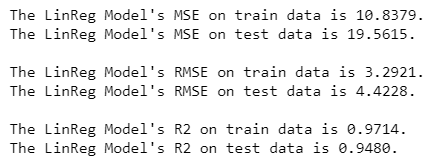

>>After specifying components:

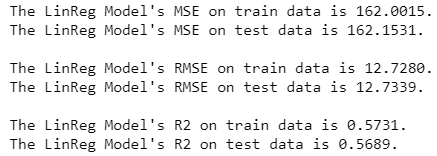

>>Thus, I decided not to perform PCA.

>### Machine Learning Modelling
[Go to Section](#part4)

>>After data transformation and feature engineering, my final X_train contains 4851 rows and 475columns. My X_test contains 2079 rows and 475 columns. Next, I will evaluate the model using the Naive Baseline Model and Linear Regression Model. To evaluate the performance of the models, I used mean square error, where a score closer to 0 is better, root mean square error, where a lower score is also better, and R-square, where a score closer to 1 is better.
>>
>>##### [Naive Baseline Model](#part4.1)
>>A naive baseline model is a simple model that makes predictions based on a straightforward assumption without any complex modeling or data analysis. The purpose of a naive baseline model is to establish a minimum level of performance that any meaningful regression model should surpass. For a regression problem, this naive baseline model will predict the mean value regardless of the input features.
>>
>>These are the results obtained by the naive baseline model:

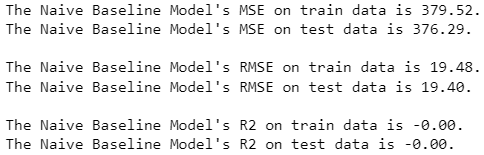

>>##### [Linear Regression Model](#part4.2)
>>Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized.
>>
>>These are the results obtained by the linear regression model:

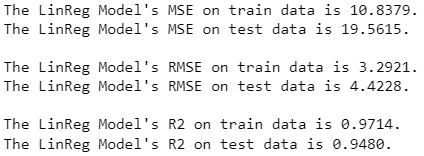

>>Comparing the linear regression model to the naive baseline model, the linear regression model performs significantly better. The difference between MSE, RMSE and R2 scores are very large. A high R2 score suggests that a large portion of the variability in the dependent variable can be attributed to the linear relationship with the independent variables. This indicates that the model fits the data well and is successful in capturing the underlying patterns.

>### Summary
>To summarise the process, these are the steps that I have taken to answer the problem statement that I have created which is to predict the fastest lap speed of a race:
>
>- Firstly, I loaded datasets and explored each of them to observe suitable variables and categories to be used to create a dataframe for my problem statement.
>- Secondly, I merged the tables, checked the values and created an 'age' column. At this point, my dataframe had 6953 rows and 21 columns. I performed exploration data analysis on the merged dataset.
>- Thirdly, I cleaned the data by removing null values and handling outliers using Winsorisation. 
>- Fourthly, I encoded categorical variables using One-Hot Encoding, Rare Label Encoding, and Ordinal Encoding. I transformed numerical variables using Yeo-Johnson Transformation and discretized them using Equal Frequency Discretization.
>- Afterwards, I performed standardisation which I ended up not using as it did not have an effect on my model score. I performed polynomial expansion for feature adding which created about 450 new columns. I also performed PCA which I ended up not using as it did not affect my score.
>- Lastly, I built and evaluated the Naive Baseline Model and Linear Regression Model, and obtained these results:
>
>>- The Naive Baseline Model's MSE on train data is 379.52.
>>- The Naive Baseline Model's MSE on test data is 376.29.
>>- The Naive Baseline Model's RMSE on train data is 19.48.
>>- The Naive Baseline Model's RMSE on test data is 19.40.
>>- The Naive Baseline Model's R2 on train data is -0.00.
>>- The Naive Baseline Model's R2 on test data is -0.00.
> 
>>- The LinReg Model's MSE on train data is 10.8379.
>>- The LinReg Model's MSE on test data is 19.5615.
>>- The LinReg Model's RMSE on train data is 3.2921.
>>- The LinReg Model's RMSE on test data is 4.4228.
>>- The LinReg Model's R2 on train data is 0.9714.
>>- The LinReg Model's R2 on test data is 0.9480.
>
>### Further Improvements
To understand the data better, I could have explored more relationships between the different variables in the merged dataset, excluding the target. I could have also tried to explore all the techniques instead of comparing between 2 techniques so that I can ensure that I have chosen the best technique for encoding, transformation, and feature engineering. Furthermore, I could have read up more about the different techniques. By doing so, I could have approached each step better. Besides that, expanding my knowledge about F1 could have also helped me in understanding the datasets better. I could have formulated better problem statements and created more features in the first part after merging tables.

[Back to top](#top)